In [1]:
import sys
sys.path.append("..")
import multi_axis as ma
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
from skimage.data import binary_blobs


Bad key "text.kerning_factor" on line 4 in
C:\Users\Sauron\anaconda3\envs\grl31-1\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def plot_topfrontside(P,noise=False,title=True):
    font = {'family':'sans-serif','sans-serif':'Arial',
            'size'   : 13}
    matplotlib.rc('font', **font)
    
    p1 =np.mean(P,axis=2)
    p2=np.mean(np.transpose(P,(2,1,0)),axis=2)[::-1]
    p3 = np.flipud(np.mean(P,axis=1).T)
    
    if noise == True:
        p1 = ma.noisy(p1,noise_typ='poisson',val_pois=100)
        p2 = ma.noisy(p2,noise_typ='poisson',val_pois=100)
        p3 = ma.noisy(p3,noise_typ='poisson',val_pois=100)

    f,axs = plt.subplots(ncols=3)
    axs[0].imshow(p1,cmap='Greys_r')
    axs[0].axis('off')
    if title==True:
        axs[0].set_title('Top')

    axs[1].imshow(p2,cmap='Greys_r')
    axs[1].axis('off')
    if title==True:
        axs[1].set_title('Front')

    axs[2].imshow(p3,cmap='Greys_r')
    axs[2].axis('off')
    if title==True:
        axs[2].set_title('Side')
    
# def generate_angles(mode='x',n_tilt = 40, alpha=70,beta=40,gamma=180,dist_n2=None,tilt2='gamma'):
#     """ Return a list of [ax,ay,az] lists, each corresponding to axial
#     rotations applied to [0,0,1] to get a new projection direction.
    
#     Modes = x, y, dual, quad, sync, dist, rand
    
#     Specify the +- tilt range of alpha/beta/gamma
    
#     Say total number of tilts n_tilt
    
#     For dist, each alpha has 'dist_n2' 'tilt2' projections
    
#     Specify if the 2nd tilt axis is beta or gamma """
    
#     angles = []
#     ax,ay,az = 0,0,0
    
#     oddeven = int(n_tilt%2)
    
#     if dist_n2 == None:
#         dist_n2=int(n_tilt**.4)
    
#     # x series
#     if mode=='x':
#         for ax in np.linspace(-alpha,alpha,n_tilt):
#             angles.append([ax,ay,az])
            
#     if mode=='dual':
#         for ax in np.linspace(-alpha,alpha,int(n_tilt/2)):
#             angles.append([ax,ay,az])
            
#         ax,ay,az = 0,0,0
#         if tilt2 == 'gamma':

#             az = 90
#             for ax in np.linspace(-alpha,alpha,int(n_tilt/2)):
#                 angles.append([ax,ay,az])
    
#     if mode=='quad':
#         for ax in np.linspace(-alpha,alpha,int(n_tilt/4)):
#             angles.append([ax,ay,az])
#         az = 90
#         for ax in np.linspace(-alpha,alpha,int(n_tilt/4)):
#             angles.append([ax,ay,az])
#         az = 45
#         for ax in np.linspace(-alpha,alpha,int(n_tilt/4)):
#             angles.append([ax,ay,az])
#         az = -45
#         for ax in np.linspace(-alpha,alpha,int(n_tilt/4)):
#                 angles.append([ax,ay,az])           

#     # random series # g or b
#     if mode=='rand':
#         for i in range(n_tilt):
#             ax_rand = np.random.rand()*alpha*2 - alpha
#             az_rand = np.random.rand()*gamma*2 - gamma
#             angles.append([ax_rand,0,az_rand])
            
#     # alpha propto beta series # g or b
#     if mode=='sync-b':

#         ax = np.linspace(-alpha,alpha,int(n_tilt/2))
#         ay = np.linspace(-beta,beta,int(n_tilt/2))

#         for i,a in enumerate(ax):
#             angles.append([a,ay[i],0])

#         for i,a in enumerate(ax):
#             angles.append([a,-ay[i],0])
                
#     if mode=='sync-g':

#         ax = np.linspace(-alpha,alpha,int(n_tilt/2))
#         az = np.linspace(-gamma,gamma,int(n_tilt/2))

#         for i,a in enumerate(ax):
#             angles.append([a,0,az[i]])

#         for i,a in enumerate(ax):
#             angles.append([a,0,-az[i]])
            
#     if mode=='sync-g2':

#         ax = np.linspace(-alpha,alpha,int(n_tilt/2))
#         az = np.linspace(-gamma,0,int(n_tilt/4))
            
#         if oddeven == 1:
#             az = np.concatenate((az,[0],az[::-1]))
#         else:
#             az = np.concatenate((az,az[::-1]))

#         for i,a in enumerate(ax):
#             angles.append([a,0,az[i]])

#         for i,a in enumerate(ax):
#             angles.append([a,0,-az[i]])
                
#         # alpha propto beta series # g or b
#     if mode=='sx-b':

#             ax = np.linspace(-alpha,alpha,int(n_tilt))
#             ay = np.linspace(-beta,beta,int(n_tilt))

#             for i,a in enumerate(ax):
#                 angles.append([a,ay[i],0])
                
#     if mode=='sx-g':

#             ax = np.linspace(-alpha,alpha,int(n_tilt))
#             az = np.linspace(-gamma,gamma,int(n_tilt))

#             for i,a in enumerate(ax):
#                 angles.append([a,0,az[i]])
        
#     if mode=='sx-g2':

#             ax = np.linspace(-alpha,alpha,int(n_tilt))
#             az = np.linspace(-gamma,0,int(n_tilt/2))
            
#             if oddeven == 1:
#                 az = np.concatenate((az,[0],az[::-1]))
#             else:
#                 az = np.concatenate((az,az[::-1]))
            

#             for i,a in enumerate(ax):
#                 angles.append([a,0,az[i]])

#             # for i,a in enumerate(ax):
#             #     angles.append([a,0,-az[i]])
            
#     # even spacing # g or b
#     if mode=='conical-b':
#         ax = np.linspace(-alpha,alpha,int(n_tilt/dist_n2))


#         ay = np.linspace(-beta,beta,dist_n2)
#         for x in ax:
#             for y in ay:
#                 angles.append([x,y,0])
                    
#     if mode=='conical-g':
#         ax = np.linspace(-alpha,alpha,int(n_tilt/dist_n2))


#         az = np.linspace(-90,90,dist_n2+1)
#         for x in ax:
#             for z in az[:-1]:
#                 angles.append([x,0,z])
    
#     return angles


def create_nanoring(n=100, r1=30, r2=10, e=1):
    """ 
    Creates 3D scalar ring phantom.
    n is pixel space size
    r1 is centre to mid-tube
    r2 is mid-tube to outer-tube
    e is not quite eccentricity: 1 = normal, <1 = thick
    """
    
    xs = np.linspace(-n/2,n/2,int(n))
    ys = np.linspace(-n/2,n/2,int(n))
    zs = np.linspace(-n/2,n/2,int(n))
    
    data = []
    for x in xs:
        for y in ys:
            for z in zs:
                if ((x**2+y**2)**0.5 - r1)**2 + e*z**2 < r2**2:
                    data.append(1)
                else:
                    data.append(0)
                    
    P = np.array(data)              
    P = P.reshape(len(xs),len(ys),len(zs))
    
    return P

def create_overgrowth(n=100, l=50,f=0.3):
    """ 
    Creates 3D scalar ring phantom.
    n is pixel space size
    r1 is centre to mid-tube
    r2 is mid-tube to outer-tube
    e is not quite eccentricity: 1 = normal, <1 = thick
    """
    
    xs = np.linspace(-n/2,n/2,int(n))
    ys = np.linspace(-n/2,n/2,int(n))
    zs = np.linspace(-n/2,n/2,int(n))
    
    data = []
    for x in xs:
        for y in ys:
            for z in zs:
                # cube
                if abs(x)<l/2 and abs(y)<l/2 and abs(z)<l/2:
                    #top wedge
                    if z>=0:
                        if y < x + f*l and y > x - f*l:
                            data.append(1)
                        else:
                            data.append(0)
                    else:
                        if y < -x + f*l and y > -x - f*l:
                            data.append(1)
                        else:
                            data.append(0)
                else:
                    data.append(0)
                    
    P = np.array(data)              
    P = P.reshape(len(xs),len(ys),len(zs))
    
    return P

def generate_angles(mode='x',n_tilt = 40, alpha=70,beta=40,gamma=180,dist_n2=None,tilt2='gamma'):
    """ Return a list of [ax,ay,az] lists, each corresponding to axial
    rotations applied to [0,0,1] to get a new projection direction.
    
    Modes = x, y, dual, quad, sync, dist, rand
    
    Specify the +- tilt range of alpha/beta/gamma
    
    Say total number of tilts n_tilt
    
    For dist, each alpha has 'dist_n2' 'tilt2' projections
    
    Specify if the 2nd tilt axis is beta or gamma """
    
    angles = []
    ax,ay,az = 0,0,0
    
    oddeven = int(n_tilt%2)
    
    if dist_n2 == None:
        dist_n2=int(n_tilt**.4)
    
    # x series
    if mode=='x':
        for ax in np.linspace(-alpha,alpha,n_tilt):
            angles.append([ax,ay,az])
            
    if mode=='dual':
        for ax in np.linspace(-alpha,alpha,int(n_tilt/2)):
            angles.append([ax,ay,az])
            
        ax,ay,az = 0,0,0
        if tilt2 == 'gamma':

            az = 90
            for ax in np.linspace(-alpha,alpha,int(n_tilt/2)):
                angles.append([ax,ay,az])
    
    if mode=='quad':
        for ax in np.linspace(-alpha,alpha,int(n_tilt/4)):
            angles.append([ax,ay,az])
        az = 90
        for ax in np.linspace(-alpha,alpha,int(n_tilt/4)):
            angles.append([ax,ay,az])
        az = 45
        for ax in np.linspace(-alpha,alpha,int(n_tilt/4)):
            angles.append([ax,ay,az])
        az = -45
        for ax in np.linspace(-alpha,alpha,int(n_tilt/4)):
                angles.append([ax,ay,az])           

    # random series # g or b
    if mode=='rand':
        for i in range(n_tilt):
            ax_rand = np.random.rand()*alpha*2 - alpha
            az_rand = np.random.rand()*gamma*2 - gamma
            angles.append([ax_rand,0,az_rand])
            
    if mode=='uniform-rand':
        for i in range(n_tilt):
            CS = np.cos((alpha)*np.pi/180)
            neg = np.random.randint(0,2) # to make half of them negative
            if neg == 0:
                neg = -1
                
            # theta value should be uniform in its arccos to sample sphere evenly
            ax_rand = np.arccos(1-np.random.rand()*(1-CS))*180/np.pi*neg
            az_rand = np.random.rand()*gamma*2 - gamma
            angles.append([ax_rand,0,az_rand])
            
    # alpha propto beta series # g or b
    if mode=='sync-b':

        ax = np.linspace(-alpha,alpha,int(n_tilt/2))
        ay = np.linspace(-beta,beta,int(n_tilt/2))

        for i,a in enumerate(ax):
            angles.append([a,ay[i],0])

        for i,a in enumerate(ax):
            angles.append([a,-ay[i],0])
                
    if mode=='sync-g':

        ax = np.linspace(-alpha,alpha,int(n_tilt/2))
        az = np.linspace(-gamma,gamma,int(n_tilt/2))

        for i,a in enumerate(ax):
            angles.append([a,0,az[i]])

        for i,a in enumerate(ax):
            angles.append([a,0,-az[i]])
            
    if mode=='sync-g2':

        ax = np.linspace(-alpha,alpha,int(n_tilt/2))
        az = np.linspace(-gamma,0,int(n_tilt/4))
            
        if oddeven == 1:
            az = np.concatenate((az,[0],az[::-1]))
        else:
            az = np.concatenate((az,az[::-1]))

        for i,a in enumerate(ax):
            angles.append([a,0,az[i]])

        for i,a in enumerate(ax):
            angles.append([a,0,-az[i]])
                
        # alpha propto beta series # g or b
    if mode=='sx-b':

            ax = np.linspace(-alpha,alpha,int(n_tilt))
            ay = np.linspace(-beta,beta,int(n_tilt))

            for i,a in enumerate(ax):
                angles.append([a,ay[i],0])
                
    if mode=='sxb-dual':

            ax = np.linspace(-alpha,alpha,int(n_tilt/2))
            ay = np.linspace(-beta,beta,int(n_tilt/2))

            for i,a in enumerate(ax):
                angles.append([a,ay[i],0])
            for i,a in enumerate(ax):
                angles.append([a,ay[i],90])
                
            
    # even spacing # g or b
    if mode=='conical-b':
        ax = np.linspace(-alpha,alpha,int(n_tilt/dist_n2))


        ay = np.linspace(-beta,beta,dist_n2)
        for x in ax:
            for y in ay:
                angles.append([x,y,0])
                    
    if mode=='conical-g':
        ax = np.linspace(-alpha,alpha,int(n_tilt/dist_n2))


        az = np.linspace(-90,90,dist_n2+1)
        for x in ax:
            for z in az[:-1]:
                angles.append([x,0,z])
                
    if mode=='sx-g':

        ax = np.linspace(-alpha,alpha,int(n_tilt))
        az = np.linspace(-gamma,gamma,int(n_tilt))

        for i,a in enumerate(ax):
            angles.append([a,0,az[i]])
        
    if mode=='sx-g2':

            ax = np.linspace(-alpha,alpha,int(n_tilt))
            az = np.linspace(-gamma/2,gamma/2,int(n_tilt/2))

            if oddeven == 1:
                az = np.concatenate((az,[0],az[::-1]))
            else:
                az = np.concatenate((az,az[::-1]))
            

            for i,a in enumerate(ax):
                angles.append([a,0,az[i]])
                
    if mode=='sx-g3':

            ax = np.linspace(-alpha,alpha,int(n_tilt))
            ay = np.linspace(-beta,beta,int(n_tilt))
            az = 90-np.arctan2(np.cos(ax*np.pi/180),np.cos(ay*np.pi/180))*180/np.pi

            for i,a in enumerate(ax):
                angles.append([a,0,az[i]])
            
    if mode=='sx-g4':

            ax = np.linspace(-alpha,alpha,int(n_tilt))
            ay = np.linspace(-beta,beta,int(n_tilt))
            az = 1/0.0053468*np.log(np.cos(ax*np.pi/180))

            for i,a in enumerate(ax):
                angles.append([a,0,az[i]])
                
    if mode=='sx-g5':

            ax = np.linspace(-alpha,alpha,int(n_tilt))
            ay = np.linspace(-beta,beta,int(n_tilt))
            az = 1/(np.cos(ax*np.pi/180))**2

            for i,a in enumerate(ax):
                angles.append([a,0,az[i]])
                
    if mode=='sx-g6':
                
    # Mode 6 - (Fermat spiral)
            ax = np.linspace(-alpha,alpha,int(n_tilt))
            ay = np.linspace(-beta,beta,int(n_tilt))
            a=.085
            az = (np.cos(ax*np.pi/180))**2 / a**2
            
            for i,a in enumerate(ax):
                angles.append([a,0,az[i]])
    
    if mode == 'sx-g7':

        # Mode 7 - (Archimediean spiral)
        ax = np.linspace(-alpha,alpha,int(n_tilt))
        ay = np.linspace(-beta,beta,int(n_tilt))
        a=0 # centre position
        b=0.008 # loop tightness
        az = (np.cos(ax*np.pi/180)-a) / b
        
        for i,a in enumerate(ax):
            angles.append([a,0,az[i]])
            
    if mode == 'sx2-dual':

        ax = np.linspace(-alpha,alpha,int(n_tilt/2))
        az = np.linspace(-gamma/2,gamma/2,int(n_tilt/4))

        if oddeven == 1:
            az = np.concatenate((az,[0],az[::-1]))
        else:
            az = np.concatenate((az,az[::-1]))


        for i,a in enumerate(ax):
            angles.append([a,0,az[i]])
            
        for i,a in enumerate(ax):
            angles.append([a,0,az[i]+90])

    return angles

from scipy import ndimage

def generate_proj_data_2(P,angles,normalise=True):
    """ Returns projection dataset given phantom P
    and 3D projection angles list.
    
    Output is normalised and reshaped such that the
    projection slice dimension is in the middle, so as
    to be compatible with astra."""
    P_projs = []
    
    for i in range(len(angles)):
        ax,ay,az = angles[i]
        P_rot = rotate_bulk_2(P,ax,ay,az) 
        P_rot_proj =np.flipud(np.sum(P_rot,axis=2).T) #flip/T match data shape to expectations
        P_projs.append(P_rot_proj) 
        
    # Prepare projections for reconstruction
    raw_data = np.array(P_projs)
    if normalise == True:
        raw_data = raw_data -  raw_data.min()
        raw_data = raw_data/raw_data.max()
    raw_data = np.transpose(raw_data,axes=[1,0,2]) # reshape so proj is middle column
        
    return raw_data

def rotate_bulk_2(P,ax,ay,az,mode='ndimage'):
    """ 
    Rotate magnetisation locations from rotation angles ax,ay,az 
    about the x,y,z axes (given in degrees) 
    
    Can use PIL or ndimage. ndimage def works but PIL faster (should work! currently doesn't handle -ve)
    
    NOTE: This implementation of scipy rotations is EXTRINSIC
    Therefore, to make it compatible with our intrinsic vector
    rotation, we swap the order of rotations (i.e. x then y then z)
    """
    # Due to indexing, ay needs reversing for desired behaviour
    if mode == 'PIL':
        nx,ny,nz = np.shape(P)
        Prot = np.zeros_like(P)
        ax,ay,az=ax,-ay,az
        scale = 256/np.max(P)
        for i in range(nx):
            im = Image.fromarray(P[i,:,:]*scale).convert('L')
            im = im.rotate(ax,resample = Image.BILINEAR)
            Prot[i,:,:] = np.array(im)/scale
        for j in range(ny):
            im = Image.fromarray(Prot[:,j,:]*scale).convert('L')
            im = im.rotate(ay,resample = Image.BILINEAR)
            Prot[:,j,:] = np.array(im)/scale
        for k in range(nz):
            im = Image.fromarray(Prot[:,:,k]*scale).convert('L')
            im = im.rotate(az,resample = Image.BILINEAR)
            Prot[:,:,k] = np.array(im)/scale
            
        return Prot
    
    else:
        ay = -ay
        
        P = ndimage.rotate(P,az,reshape=False,axes=(0,1),order=1)
        
        P = ndimage.rotate(P,ay,reshape=False,axes=(2,0),order=1)
        
        P = ndimage.rotate(P,ax,reshape=False,axes=(1,2),order=1)
        

        return P
    
def generate_vectors_2(angles):
    """ Converts list of 3D projection angles into
    list of astra-compatible projection vectors,
    with [r,d,u,v] vectors on each row. """
    vectors = []
    for [ax,ay,az] in angles:
        vector = get_astravec_2(ax,ay,az)
        vectors.append(vector)
    
    return vectors

def get_astravec_2(ax,ay,az):
    """ Given angles in degrees, return r,d,u,v as a concatenation
    of four 3-component vectors"""
    # Since we us flipud on y axis, ay needs reversing for desired behaviour
    ay = -ay 
    
    # centre of detector
    d = [0,0,0]
    
    # 3D rotation matrix - EXTRINSIC!
    mrot = np.array(ma.rotation_matrix(ax,ay,az,intrinsic=True))
    
    # ray direction r
    r = mrot.dot([0,0,1])*-1 # -1 to match astra definitions
    # u (det +x)
    u = mrot.dot([1,0,0])
    # v (det +y)
    v = mrot.dot([0,1,0])

    return np.concatenate((r,d,u,v))

In [1705]:
np.cos((70)*np.pi/180)

0.3420201433256688

## Scalar Phantoms

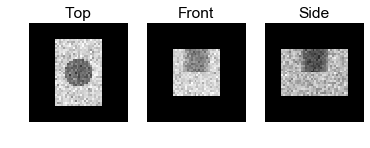

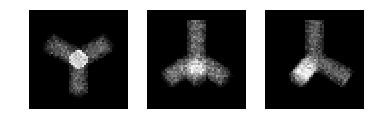

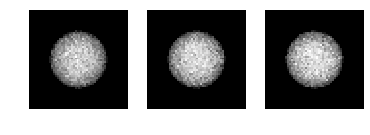

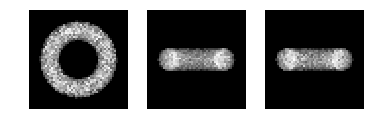

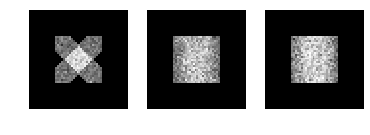

In [3]:
Ps = []
f=.5
X,Y,Z,P = ma.generate_pillar_cavities(n=100*f,x_len=70*f,y_len=50*f,z_len=50*f,r_cyl=15*f,depth=25*f)
plot_topfrontside(P,noise=True)
Ps.append(P)

plt.show()

X,Y,Z,P = ma.generate_tetrapod(n=100*f,r_tet=40*f,r_cyl=10*f)
plot_topfrontside(P,noise=True,title=False)
Ps.append(P)

plt.show
X,Y,Z,P = ma.generate_sphere(n=100*f,r=30*f)
plot_topfrontside(P,noise=True,title=False)
Ps.append(P)

plt.show()
P = create_nanoring(n=100*f,r1=30*f,r2=10*f,e=.7)
plot_topfrontside(P,noise=True,title=False)
Ps.append(P)

plt.show()
P = create_overgrowth(n=100*f,l=50*f)
plot_topfrontside(P,noise=True,title=False)
Ps.append(P)

In [7]:
snrs = []
for P in Ps:
    p1 =np.mean(P,axis=2)
    p1n = ma.noisy(p1,noise_typ='poisson',val_pois=100)
    noise = p1n-p1
    SNR = np.var(p1)/np.var(noise)
    #print('SNR: ',SNR)
    snrs.append(SNR)
    
np.mean(snrs),np.std(snrs)

(25.9212906254249, 6.94095529163961)

In [17]:
angles

[]

In [23]:
angles = generate_angles(mode='sx-g2',alpha=70,n_tilt=20,beta=0,dist_n2=1,gamma=180)
#angles = generate_angles(mode='x',alpha=70,n_tilt=20,beta=0,dist_n2=1,gamma=180)
            

vectors = generate_vectors_2(angles)
raw_data = generate_proj_data_2(Ps[0],angles,normalise=False)
#raw_data = ma.generate_proj_data(Ps[0],angles,normalise=False)

ma.plot_phases_interactive(raw_data)

interactive(children=(IntSlider(value=9, description='i', max=19), Output()), _dom_classes=('widget-interact',…

## Main acquisition schemes

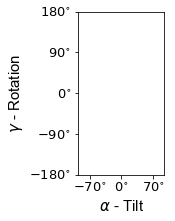

x 64


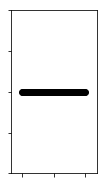

dual 64


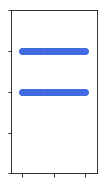

quad 64


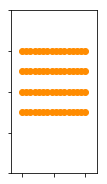

conical-g 63


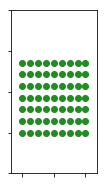

sx-g2 64


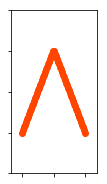

sx2-dual 64


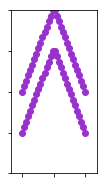

uniform-rand 64


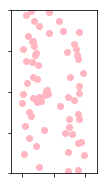

In [360]:
font = {'family':'sans-serif','sans-serif':'Arial',
            'size'   : 13}
matplotlib.rc('font', **font)

modes = ['x','dual','quad','conical-g','sx-g2','sx2-dual','uniform-rand']
colors = ['k','royalblue','darkorange','forestgreen','orangered','darkorchid','lightpink']

n_tilt,dist = 64,7

plt.figure(figsize=(3,3))
plt.xlim([-95,95])
plt.ylim([-180,180])

plt.xticks([-70,0,70],['$-70^{\circ}$','$0^{\circ}$','$70^{\circ}$'])
plt.yticks([-180,-90,0,90,180],['$-180^{\circ}$','$-90^{\circ}$','$0^{\circ}$','$90^{\circ}$','$180^{\circ}$'])
ax=plt.gca()
ax.set_aspect('equal')


plt.xlabel(r'$\alpha$ - Tilt',fontsize=15)
plt.ylabel(r'$\gamma$ - Rotation',fontsize=15)
plt.show()

for i,m in enumerate(modes):
    
    c=colors[i]
    ang = np.array(generate_angles(m,n_tilt=n_tilt,dist_n2=dist))
    print(m,len(ang))
    axs = ang[:,0]
    azs = ang[:,2]
    
    plt.figure(figsize=(3,3))
    
    for a in ang:
        mrot = ma.rotation_matrix(a[0],a[1],a[2],intrinsic=True)
        b = np.dot(mrot,[0,0,1])
        plt.scatter(a[0],a[2],color=c)
    
    plt.xlim([-95,95])
    plt.ylim([-180,180])
    
    plt.xticks([-70,0,70],[])
    plt.yticks([-180,-90,0,90,180],[])
    
    ax=plt.gca()
    ax.set_aspect('equal')
    plt.show()
    

x 64


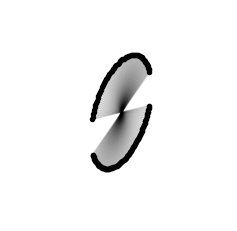

dual 64


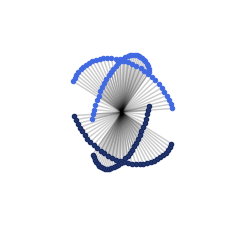

quad 64


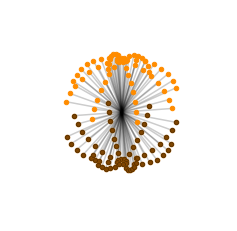

conical-g 63


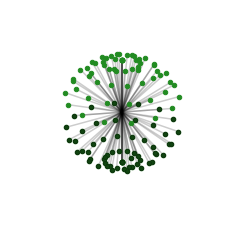

sx-g2 64


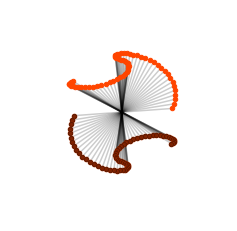

sx2-dual 64


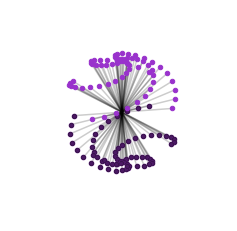

uniform-rand 64


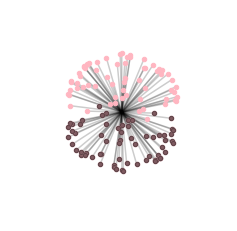

In [361]:
modes = ['x','dual','quad','conical-g','sx-g2','sx2-dual','uniform-rand']
#n_tilt, dist_n2 = 20, 5
n_tilt, dist_n2 = 64, 7

#set distn2=7 for n=64, for high
# set distn2=5, n = 20 for low

for j,val in enumerate(modes):
    c = colors[j]

    angles = generate_angles(mode=val,n_tilt=n_tilt,alpha=70,beta=90,gamma=180,dist_n2=dist_n2)

    # plot a collection scheme
    %matplotlib inline
    fig = plt.figure(figsize=(4,4))
    ax1 = fig.gca(projection='3d')

    bs = []
    for i,a in enumerate(angles):
        mrot = ma.rotation_matrix(a[0],a[1],a[2],intrinsic=True)
        b = np.dot(mrot,[0,0,1])
        bs.append(b)
        plt.plot([-b[0],b[0]],[-b[1],b[1]],[-b[2],b[2]],'-',color='k',alpha=.2)
        #ax1.scatter([-b[0],b[0]],[-b[1],b[1]],[-b[2],b[2]],c=[-b[2],b[2]],s=20,cmap='coolwarm',alpha=1)
        ax1.scatter([b[0]],[b[1]],[b[2]],c=c,s=20,cmap='coolwarm',alpha=1)
        ax1.scatter([-b[0]],[-b[1]],[-b[2]],c=c,s=20,cmap='coolwarm',alpha=1)
        ax1.scatter([-b[0]],[-b[1]],[-b[2]],c='k',s=20,cmap='coolwarm',alpha=.5)

    ax1.set_yticklabels([])
    ax1.set_xticklabels([])
    ax1.set_zticklabels([])
    plt.xlabel('x',fontsize='20')
    plt.ylabel('y',fontsize='20')
    ax1.set_zlabel('z',fontsize='20')
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    ax1.set_zlim([-1,1])
    plt.axis('off')

    f = plt.gcf()
    f.patch.set_facecolor('white')
    print(val, len(angles))
    plt.show()

## Main simulated scalar results

In [1895]:
Ps = []
pnames=['pil','tet','sph','ring','over']

f=.5
X,Y,Z,P = ma.generate_pillar_cavities(n=100*f,x_len=70*f,y_len=50*f,z_len=50*f,r_cyl=15*f,depth=25*f)
Ps.append(P)

X,Y,Z,P = ma.generate_tetrapod(n=100*f,r_tet=40*f,r_cyl=10*f)
Ps.append(P)

X,Y,Z,P = ma.generate_sphere(n=100*f,r=30*f)
Ps.append(P)

P = create_nanoring(n=100*f,r1=30*f,r2=10*f,e=.7)
Ps.append(P)

P = create_overgrowth(n=100*f,l=50*f)
Ps.append(P)

In [1896]:
def test_series(P,fname='test',ntest=30,alg='TV1',niter=20,weight=0.1,alpha = 45,n_tilt=30,beta=30,gamma=180,dist_n2=7):
    modes = ['x','dual','quad','conical-g','sx-g2','sx2-dual','uniform-rand']

    all_res = []
    for i in range(ntest):
        ax,ay,az=np.random.rand(3)*360
        Pr = ma.rotate_bulk(P,ax,ay,az)
        res = []
        for val in modes:
            angles = generate_angles(mode=val,alpha=alpha,n_tilt=n_tilt,beta=beta,dist_n2=dist_n2,gamma=gamma)
            
            if val in ['sx-g2','sx2-dual','uniform-rand'] :
                vectors = generate_vectors_2(angles)
                raw_data = generate_proj_data_2(Pr,angles,normalise=False)
            else:
                vectors = ma.generate_vectors(angles)
                raw_data = ma.generate_proj_data(Pr,angles)
                
            raw_data = ma.noisy(raw_data,noise_typ='poisson',val_pois=100)
            r = ma.generate_reconstruction(raw_data,vectors,algorithm=alg,niter=niter,weight=weight)
            r = ma.reorient_reconstruction(r)
            cod = ma.COD(Pr,r)
            res.append(cod)
        print(res)
        all_res.append(res)
    np.save('Data/%s.npy'%fname,all_res)
    return all_res

# case 1 hight tilt, high N
alpha = 70
beta = 90
n_tilt,dist_n2 = 64,7
for i,P in enumerate(Ps):
    _=test_series(P,fname=r'c1-%s_main3'%pnames[i],alpha=alpha,n_tilt=n_tilt,gamma=180,beta=90,dist_n2=dist_n2)

# # case 2 - high tilt low N)
alpha = 70
beta = 90
n_tilt,dist_n2 = 20,5
for i,P in enumerate(Ps):
    _=test_series(P,fname=r'c2-%s_main3'%pnames[i],alpha=alpha,n_tilt=n_tilt,gamma=180,beta=90,dist_n2=dist_n2)

# # case 3 - low tilt high N
alpha = 40
n_tilt,dist_n2 = 64,7
for i,P in enumerate(Ps):
    _=test_series(P,fname=r'c3-%s_main3'%pnames[i],alpha=alpha,n_tilt=n_tilt,gamma=180,beta=90,dist_n2=dist_n2)
    
# # case 4 - low tilt low N
alpha = 40
beta = 30
n_tilt,dist_n2 = 20,5
for i,P in enumerate(Ps):
    _=test_series(P,fname=r'c4-%s_main3'%pnames[i],alpha=alpha,n_tilt=n_tilt,gamma=180,beta=90,dist_n2=dist_n2)

[0.9119326318465483, 0.9169613700055865, 0.9316179598240889, 0.9389802364550753, 0.9876642122543251, 0.9921176723991246, 0.9894298959893063]
[0.9556438961331369, 0.9563972536212504, 0.9637839235215784, 0.9713451944181892, 0.9904144967543749, 0.994818211164083, 0.991902798841759]
[0.9416372858906383, 0.9471918373361649, 0.9555425677926871, 0.9600685663984118, 0.9744221432708094, 0.9892804267413371, 0.9911494480849792]
[0.9234790819789425, 0.9278043793605983, 0.9381767855349623, 0.9443724739806564, 0.9891286886772203, 0.9897962530266646, 0.9907016745664854]
[0.9274358654953854, 0.9314210563748763, 0.9421804551999697, 0.9523495745246032, 0.9888832729949845, 0.9910899568450918, 0.9917088233482443]
[0.9257369166131385, 0.9324746108763523, 0.948179287274105, 0.9607427739821618, 0.9669588933113142, 0.9817816190265726, 0.9777589481826034]
[0.9101126653072874, 0.9172106130018672, 0.9325086939271451, 0.9423257646901733, 0.9774350155987642, 0.9796817540441639, 0.9743456440410785]
[0.9267070744877

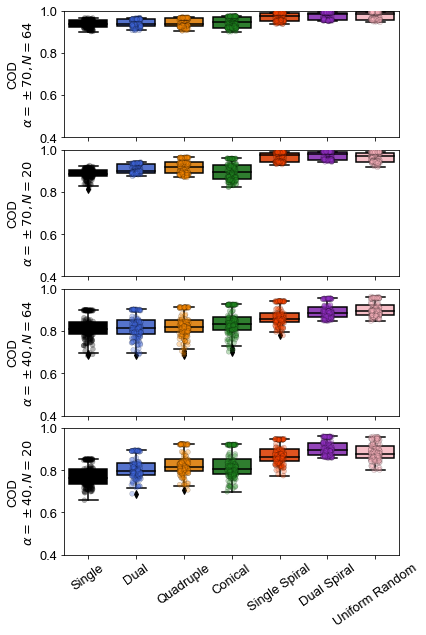

Fractional change in COD compared to single result
Dual :	 1.021 ± 0.002
Quadruple :	 1.034 ± 0.003
Conical :	 1.028 ± 0.003
Single Spiral :	 1.083 ± 0.005
Dual Spiral :	 1.103 ± 0.005
Uniform Random :	 1.097 ± 0.005


In [1900]:
font = {'family':'sans-serif','sans-serif':'Arial',
        'size'   : 13}
matplotlib.rc('font', **font)
bigdf=pd.DataFrame()
import seaborn as sn
f,axs = plt.subplots(nrows=4,figsize=(6,10),sharex=True)
modes = ['x','dual','quad','conical-g','sx-g2','sx2-dual','rand']
nicemodes = ['Single', 'Dual', 'Quadruple', 'Conical', 'Single Spiral', 'Dual Spiral', 'Uniform Random']

colors = ['k','royalblue','darkorange','forestgreen','orangered','darkorchid','lightpink']
my_pal = {}
for i,c in enumerate(colors):
    my_pal[nicemodes[i]]=c

for i,c in enumerate(range(1,4+1)):
    all_rs = []
    for nam in pnames:
        r = np.load('Data/c%s-%s_main3.npy'%(c,nam))
        all_rs.append(r)
    
    data = []
    for j in range(7):
        d=np.take(all_rs,j,-1).flatten()
        data.append(d)
        
    df = pd.DataFrame(data)
    df = df.T
    df.columns=nicemodes
    
    sn.boxplot(data=df,orient='v',dodge=True,ax=axs[i],palette=my_pal)
    sn.stripplot(data=df,jitter=True,alpha=.3,ax=axs[i],palette=my_pal,edgecolor='k',linewidth=.4)
    #sn.stripplot(data=df,jitter=True,alpha=.1,ax=axs[i],color='gray')
    
    for m in nicemodes[1:]:
        df[m]=df[m]/df['Single']

    bigdf=bigdf.append(df)

    
plt.xticks(rotation=35)

for ax in axs:
    ax.set_ylim([.4,1])

axs[0].set_ylabel('COD\n'+r'$\alpha=\pm70, N=64$')
axs[1].set_ylabel('COD\n'+r'$\alpha=\pm70, N=20$')
axs[2].set_ylabel('COD\n'+r'$\alpha=\pm40, N=64$')
axs[3].set_ylabel('COD\n'+r'$\alpha=\pm40, N=20$')

f.subplots_adjust(hspace=.1)
plt.show()

for m in nicemodes[1:]:
    df[m]=df[m]/df['Single']
    

print('Fractional change in COD compared to single result')
for i in range(1,7):
    print(nicemodes[i],':\t %.3f'%np.mean(bigdf,axis=0)[i],'±','%.3f'%(np.std(bigdf,axis=0)[i]/(5*30)**0.5))

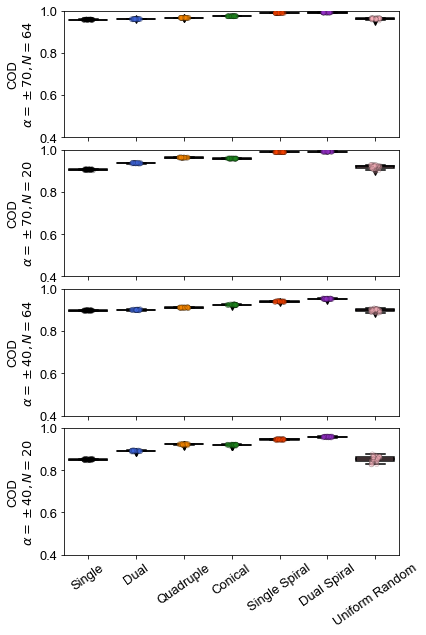

Fractional change in COD compared to single result
Dual :	 1.048 ± 0.002
Quadruple :	 1.084 ± 0.002
Conical :	 1.081 ± 0.002
Single Spiral :	 1.112 ± 0.002
Dual Spiral :	 1.126 ± 0.002
Uniform Random :	 1.003 ± 0.015


In [1713]:
font = {'family':'sans-serif','sans-serif':'Arial',
        'size'   : 13}
matplotlib.rc('font', **font)
import seaborn as sn
f,axs = plt.subplots(nrows=4,figsize=(6,10),sharex=True)
modes = ['x','dual','quad','conical-g','sx-g2','sx2-dual','rand']
nicemodes = ['Single', 'Dual', 'Quadruple', 'Conical', 'Single Spiral', 'Dual Spiral', 'Uniform Random']

colors = ['k','royalblue','darkorange','forestgreen','orangered','darkorchid','lightpink']
my_pal = {}
for i,c in enumerate(colors):
    my_pal[nicemodes[i]]=c

for i,c in enumerate(range(1,4+1)):
    all_rs = []
    for nam in ['sph']:
        r = np.load('Data/c%s-%s_main2.npy'%(c,nam))
        all_rs.append(r)
    
    data = []
    for j in range(7):
        d=np.take(all_rs,j,-1).flatten()
        data.append(d)
        
    df = pd.DataFrame(data)
    df = df.T
    df.columns=nicemodes
    
    sn.boxplot(data=df,orient='v',dodge=True,ax=axs[i],palette=my_pal)
    sn.stripplot(data=df,jitter=True,alpha=.3,ax=axs[i],palette=my_pal,edgecolor='k',linewidth=.4)
    #sn.stripplot(data=df,jitter=True,alpha=.1,ax=axs[i],color='gray')
    
plt.xticks(rotation=35)

for ax in axs:
    ax.set_ylim([.4,1])

axs[0].set_ylabel('COD\n'+r'$\alpha=\pm70, N=64$')
axs[1].set_ylabel('COD\n'+r'$\alpha=\pm70, N=20$')
axs[2].set_ylabel('COD\n'+r'$\alpha=\pm40, N=64$')
axs[3].set_ylabel('COD\n'+r'$\alpha=\pm40, N=20$')

f.subplots_adjust(hspace=.1)
plt.show()

for m in nicemodes[1:]:
    df[m]=df[m]/df['Single']
    

print('Fractional change in COD compared to single result')
for i in range(1,7):
    print(nicemodes[i],':\t %.3f'%np.mean(df,axis=0)[i],'±','%.3f'%np.std(df,axis=0)[i])

### Visualisation

[]

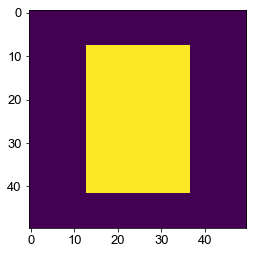

In [8]:

angles

In [74]:
alpha=40#70 
n_tilt=20#64
beta=90
dist_n2=5#7
gamma=180
modes = ['x','dual','quad','conical-g','sx-g2','sx2-dual','uniform-rand']
nicemodes = ['Single', 'Dual', 'Quadruple', 'Conical', 'Single Spiral', 'Dual Spiral', 'Uniform Random']
colors = ['k','royalblue','darkorange','forestgreen','orangered','darkorchid','lightpink']

all_res = []
recons=[]
#ax,ay,az=np.random.rand(3)*5
for i in range(1):

    #Pr = ma.rotate_bulk(P,ax,ay,az)
    Pr=Ps[1]
    res = []
    for val in modes:
        angles = generate_angles(mode=val,alpha=alpha,n_tilt=n_tilt,beta=beta,dist_n2=dist_n2,gamma=gamma)

        if val in ['sx-g2','sx2-dual','uniform-rand'] :
            vectors = generate_vectors_2(angles)
            raw_data = generate_proj_data_2(Pr,angles,normalise=False)
        else:
            vectors = ma.generate_vectors(angles)
            raw_data = ma.generate_proj_data(Pr,angles)

        raw_data = ma.noisy(raw_data,noise_typ='poisson',val_pois=100)
        r = ma.generate_reconstruction(raw_data,vectors,algorithm='TV1',niter=20,weight=.1)
        r = ma.reorient_reconstruction(r)
        recons.append(r)
        cod = ma.COD(Pr,r)
        res.append(cod)
    print(res)
    all_res.append(res)

[0.7708307187598633, 0.7981794333605045, 0.7980317635684581, 0.7721424719608708, 0.8658893405850043, 0.9024499136534229, 0.8881325734563993]


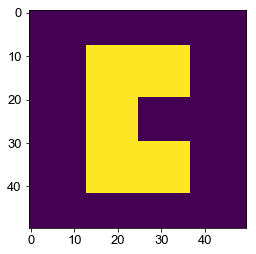

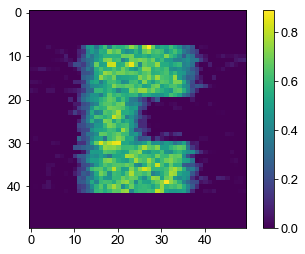

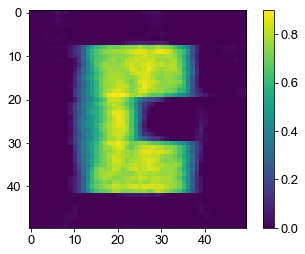

In [39]:
i=30
plt.imshow(Ps[0][:,i])
plt.show()
plt.imshow(recons[0][:,i])
plt.colorbar()

plt.show()
plt.imshow(recons[1][:,i])
plt.colorbar()

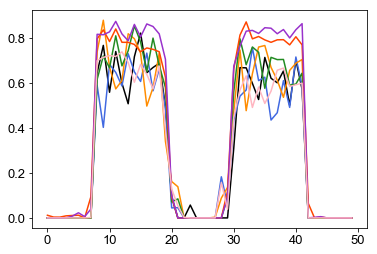

In [44]:
for i,c in enumerate(colors):
    plt.plot(recons[i][:,30,30],c=c)

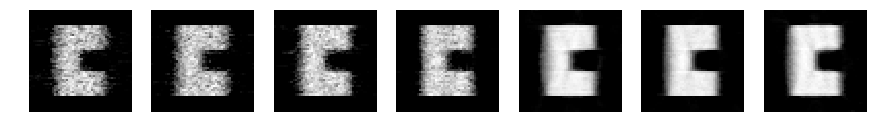

In [69]:
f,axs = plt.subplots(ncols=7,figsize=(15,3))

for i,c in enumerate(colors):
    axs[i].imshow(recons[i][:,30,:],cmap='Greys_r')
    axs[i].axis('off')

In [76]:
from vtk.util import numpy_support
import vtk
import numpy as np

data = recons[4]

# vtkImageData is the vtk image volume type
imdata = vtk.vtkImageData()
# this is where the conversion happens
depthArray = numpy_support.numpy_to_vtk(data.ravel(), deep=True, array_type=vtk.VTK_DOUBLE)

# fill the vtk image data object
imdata.SetDimensions(data.shape)
imdata.SetSpacing([1,1,1])
imdata.SetOrigin([0,0,0])
imdata.GetPointData().SetScalars(depthArray)

# f.ex. save it as mhd file
writer = vtk.vtkMetaImageWriter()
writer.SetFileName("tet_sx.mhd")
writer.SetInputData(imdata)
writer.Write()

In [1727]:
np.shape(Pr)

(50, 50, 50)

In [1885]:
f=.5
_,_,_,Pr =ma.generate_sphere(n=100*f,r=30*f)

In [1744]:
X,Y,Z,Pr = ma.generate_pillar_cavities(n=100*f,x_len=70*f,y_len=50*f,z_len=50*f,r_cyl=15*f,depth=25*f)

In [1752]:
f=.5
P = binary_blobs(length=int(100*f), n_dim=3, volume_fraction=0.13, seed=20,blob_size_fraction=.32)
P = P[:,:,int(10*2*f):int(40*2*f)]
Pr = np.pad(P,((0,0),(0,0),(10,10)))

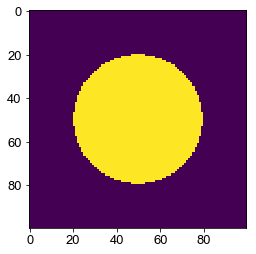

In [1737]:
plt.imshow(Pr[:,:,50])

In [1742]:
angles

[[-4.309412087010129, 0, -107.07559177678912],
 [-56.8105331731919, 0, -86.89172659257568],
 [-39.35067114413754, 0, 147.46950020293076],
 [-46.32529674531783, 0, 24.597498819362045],
 [-57.68393461434832, 0, -49.47700804300936],
 [48.749261933804746, 0, -149.37686356025205],
 [42.06467020829701, 0, -109.93533926704669],
 [68.55642153781777, 0, 120.43714087634805],
 [-39.16241064143297, 0, 171.7672004216792],
 [37.936591393381846, 0, 5.102102743695468],
 [-26.322233732915198, 0, 17.315075961831354],
 [-50.018837297306526, 0, 10.8952789354027],
 [-45.355286125245655, 0, -53.18618927377828],
 [-40.71526689937419, 0, -110.53488120800068],
 [59.89799428629529, 0, 35.57010037187837],
 [-69.56144556857924, 0, -131.22498862867815],
 [-48.12474026165858, 0, 110.26480598511262],
 [-41.08934196597992, 0, 18.927969189127936],
 [-59.62302811487745, 0, -36.80262065307525],
 [-23.998884463650725, 0, -82.9403350172662],
 [-53.221216085060284, 0, -93.18473862535092],
 [55.39061140117428, 0, 125.682912

In [1892]:
# showing randoms power

#Pr = Ps[2]
res = []
alpha=50
beta=70
gamma=180
vals=['x','uniform-rand','uniform-rand','uniform-rand']
alg='TV1'
niter=20
weight=0.1

n_tilt=60

cods = []

n_tilts = [20,64]
for n_tilt in n_tilts:
    for val in vals:
        angles = generate_angles(mode=val,alpha=alpha,n_tilt=n_tilt,beta=beta,dist_n2=dist_n2,gamma=gamma)

        if val in ['sx-g2','sx2-dual'] :
            vectors = generate_vectors_2(angles)
            raw_data = generate_proj_data_2(Pr,angles,normalise=False)
        else:
            vectors = ma.generate_vectors(angles)
            raw_data = ma.generate_proj_data(Pr,angles)

        #raw_data = ma.noisy(raw_data,noise_typ='poisson',val_pois=150)
        r = ma.generate_reconstruction(raw_data,vectors,algorithm=alg,niter=niter,weight=weight)
        r = ma.reorient_reconstruction(r)
        cod = ma.COD(Pr,r)
        res.append(cod)
        print(val,cod)
        cods.append(cod)


x 0.9458600552913474
uniform-rand 0.9237616400908331
uniform-rand 0.9285598890884496
uniform-rand 0.9339491628883699
x 0.9431278074924816
uniform-rand 0.9239091868088071
uniform-rand 0.9278847404989191
uniform-rand 0.9306112171782134


Text(0.5, 0, 'Number of projections')

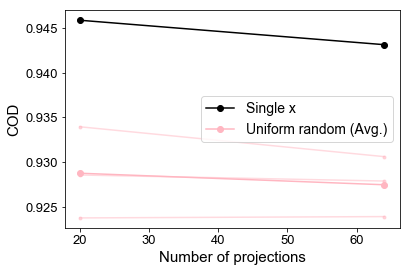

In [1893]:
plt.plot(n_tilts,cods[::4],'o-',label='Single x',color='k')
plt.plot(n_tilts,cods[1::4],'.-',color='lightpink',alpha=.5)
plt.plot(n_tilts,cods[2::4],'.-',color='lightpink',alpha=.5)
plt.plot(n_tilts,cods[3::4],'.-',color='lightpink',alpha=.5)
plt.plot(n_tilts,np.mean([cods[2::4],cods[3::4],cods[1::4]],axis=0),'o-',label='Uniform random (Avg.)',color='lightpink')
plt.legend(fontsize=14)

plt.ylabel('COD',fontsize=15)
plt.xlabel('Number of projections',fontsize=15)

In [323]:
for c in range(1,5):
    
    all_rs = []
    for nam in pnames:
        r = np.load('Data/c%s-%s_main1.npy'%(c,nam))
        all_rs.append(r)

    data = []
    for j in range(7):
        d=np.take(all_rs,j,-1).flatten()
        data.append(d)

    df = pd.DataFrame(data)
    df = df.T
    df.columns=nicemodes
    print(np.mean(df.iloc[:,0]))

0.9415429447281053
0.8874484389349474
0.818697809899629
0.770235599261817


In [259]:
for i,c in enumerate(range(1,4+1)):
    all_rs = []
    for nam in pnames:
        r = np.load('Data/c%s-%s_main1.npy'%(c,nam))
        all_rs.append(r)
    
    data = []
    for j in range(7):
        d=np.take(all_rs,j,-1).flatten()
        data.append(d)
        
    df = pd.DataFrame(data)
    df = df.T
df.columns=nicemodes
    
#df=df.sub(df.iloc[:,0], axis=0)
#df = df/df['Single']
for m in nicemodes[1:]:
    df[m]=df[m]/df['Single']
    

for i in range(1,7):
    print(nicemodes[i],':\t %.3f'%np.mean(df,axis=0)[i],'±','%.3f'%np.std(df,axis=0)[i])

Dual :	 1.049 ± 0.017
Quadruple :	 1.076 ± 0.031
Conical :	 1.061 ± 0.033
Single Spiral :	 1.138 ± 0.071
Dual Spiral :	 1.177 ± 0.062
Random :	 0.970 ± 0.040


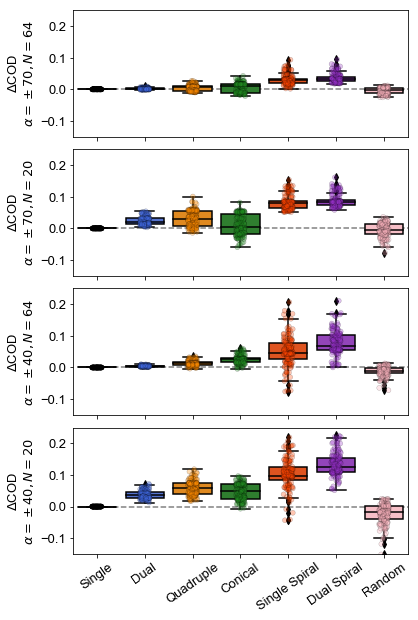

In [206]:
font = {'family':'sans-serif','sans-serif':'Arial',
        'size'   : 13}
matplotlib.rc('font', **font)

f,axs = plt.subplots(nrows=4,figsize=(6,10),sharex=True)


for i,c in enumerate(range(1,4+1)):
    all_rs = []
    for nam in pnames:
        r = np.load('Data/c%s-%s_main1.npy'%(c,nam))
        all_rs.append(r)
    
    data = []
    for j in range(7):
        d=np.take(all_rs,j,-1).flatten()
        data.append(d)
        
    df = pd.DataFrame(data)
    df = df.T
    df.columns=nicemodes
    
    df=df.sub(df.iloc[:,0], axis=0)
    sn.boxplot(data=df,orient='v',dodge=True,ax=axs[i],palette=my_pal)
    sn.stripplot(data=df,jitter=True,alpha=.3,ax=axs[i],palette=my_pal,edgecolor='k',linewidth=.4)
    
plt.xticks(rotation=35)

for ax in axs:
    ax.set_ylim([-.15,.25])
    ax.plot([0,9],[0,0],'k--',alpha=.5,zorder=0)

axs[0].set_ylabel('$\Delta$COD\n'+r'$\alpha=\pm70, N=64$')
axs[1].set_ylabel('$\Delta$COD\n'+r'$\alpha=\pm70, N=20$')
axs[2].set_ylabel('$\Delta$COD\n'+r'$\alpha=\pm40, N=64$')
axs[3].set_ylabel('$\Delta$COD\n'+r'$\alpha=\pm40, N=20$')

f.subplots_adjust(hspace=.1)
plt.show()

Text(0, 0.5, '$\\Delta$ Standard deviation')

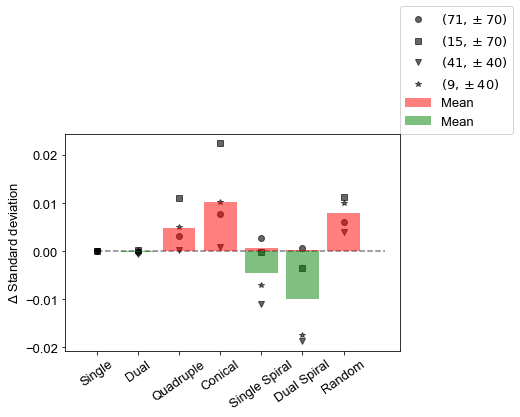

In [214]:
ls=[r'$(71, \pm70)$',r'$(15, \pm70)$',r'$(41, \pm40)$',r'$(9, \pm40)$']
ms=['o','s','v','*']
all_sig=[]
for i,c in enumerate(range(1,4+1)):
    all_rs = []
    for nam in pnames:
        r = np.load('Data/c%s-%s_main1.npy'%(c,nam))
        all_rs.append(r)
    
    data = []
    for j in range(7):
        d=np.take(all_rs,j,-1).flatten()
        data.append(d)
        
    df = pd.DataFrame(data)
    df = df.T
    df.columns=modes

    sigmas = np.std(df,axis=0)
    sigmas=sigmas-sigmas[0]
    all_sig.append(sigmas)
    plt.plot(nicemodes,sigmas,'.',label=ls[i],marker=ms[i],alpha=.6,color='k')
    

plt.plot([0,7],[0,0],'k--',alpha=.5,zorder=0)

pos = np.array(all_sig)
pos[pos<0]=0
plt.bar(nicemodes,np.mean(pos,axis=0),label='Mean',alpha=.5,color='r',zorder=100)

neg = np.array(all_sig)
neg[neg>0]=0
plt.bar(nicemodes,np.mean(neg,axis=0),label='Mean',alpha=.5,color='g',zorder=100)

plt.legend(loc=(1,1))
plt.xticks(rotation=35)
plt.ylabel('$\Delta$ Standard deviation')

## SI results for beta tilt options

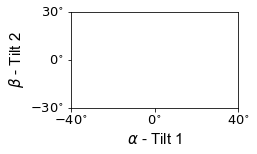

x 64


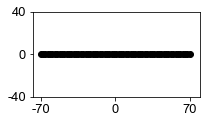

conical-b 63


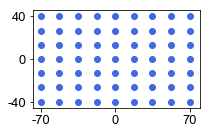

sx-b 64


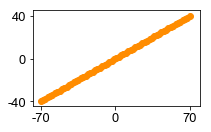

sxb-dual 64


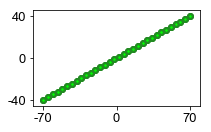

In [1907]:
font = {'family':'sans-serif','sans-serif':'Arial',
            'size'   : 13}
matplotlib.rc('font', **font)

modes = ['x','conical-b','sx-b','sxb-dual']
colors = ['k','royalblue','darkorange','forestgreen','orangered','darkorchid','lightpink']

n_tilt,dist = 64,7

plt.figure(figsize=(3,3))
# plt.xlim([-70,70])
# plt.ylim([-40,40])

plt.xticks([-70,0,70],['$-40^{\circ}$','$0^{\circ}$','$40^{\circ}$'])
plt.yticks([-40,0,40],['$-30^{\circ}$','$0^{\circ}$','$30^{\circ}$'])
ax=plt.gca()
ax.set_aspect('equal')


plt.xlabel(r'$\alpha$ - Tilt 1',fontsize=15)
plt.ylabel(r'$\beta$ - Tilt 2',fontsize=15)
plt.show()

for i,m in enumerate(modes):
    
    c=colors[i]
    ang = np.array(generate_angles(m,n_tilt=n_tilt,dist_n2=dist,alpha=70,beta=40))
    print(m,len(ang))
    axs = ang[:,0]
    azs = ang[:,2]
    
    plt.figure(figsize=(3,3))
    
    for a in ang:
        mrot = ma.rotation_matrix(a[0],a[1],a[2],intrinsic=True)
        b = np.dot(mrot,[0,0,1])
        plt.scatter(a[0],a[1],color=c)
        if m == 'sxb-dual':
            plt.scatter(a[0],a[1],color='lime',marker='.',s=9)
    
    # plt.xlim([-70,70])
    # plt.ylim([-37,37])
    
    plt.xticks([-70,0,70],[-70,0,70])
    plt.yticks([-40,0,40],[-40,0,40])
    
    ax=plt.gca()
    ax.set_aspect('equal')
    plt.show()
    

In [1706]:
modes = ['x','conical-b','sx-b','sxb-dual']
#n_tilt, dist_n2 = 20, 5
n_tilt, dist_n2 = 64, 7

angles = generate_angles(mode='sx-b',n_tilt=n_tilt,alpha=40,beta=30,gamma=180,dist_n2=dist_n2)
angles

[[-40.0, -30.0, 0],
 [-38.73015873015873, -29.047619047619047, 0],
 [-37.46031746031746, -28.095238095238095, 0],
 [-36.19047619047619, -27.142857142857142, 0],
 [-34.920634920634924, -26.19047619047619, 0],
 [-33.65079365079365, -25.238095238095237, 0],
 [-32.38095238095238, -24.285714285714285, 0],
 [-31.11111111111111, -23.333333333333336, 0],
 [-29.841269841269842, -22.38095238095238, 0],
 [-28.571428571428573, -21.42857142857143, 0],
 [-27.301587301587304, -20.476190476190474, 0],
 [-26.03174603174603, -19.523809523809526, 0],
 [-24.761904761904763, -18.571428571428573, 0],
 [-23.492063492063494, -17.61904761904762, 0],
 [-22.22222222222222, -16.666666666666668, 0],
 [-20.952380952380953, -15.714285714285715, 0],
 [-19.682539682539684, -14.761904761904763, 0],
 [-18.412698412698415, -13.80952380952381, 0],
 [-17.142857142857146, -12.857142857142858, 0],
 [-15.873015873015873, -11.904761904761905, 0],
 [-14.603174603174605, -10.952380952380953, 0],
 [-13.333333333333336, -10.0, 0],

x 64


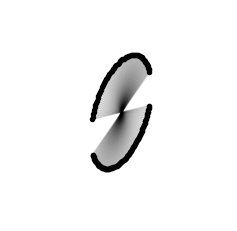

conical-b 63


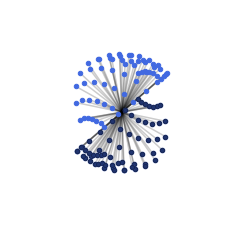

sx-b 64


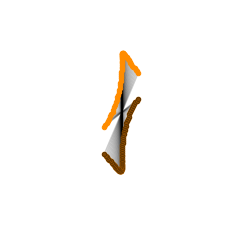

sxb-dual 64


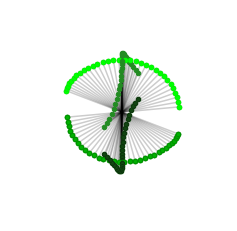

In [1903]:
modes = ['x','conical-b','sx-b','sxb-dual']
#n_tilt, dist_n2 = 20, 5
n_tilt, dist_n2 = 64, 7

#set distn2=7 for n=64, for high
# set distn2=5, n = 20 for low
colors = ['k','royalblue','darkorange','forestgreen','orangered','darkorchid','lightpink']
for j,val in enumerate(modes):
    c = colors[j]

    angles = generate_angles(mode=val,n_tilt=n_tilt,alpha=70,beta=40,gamma=180,dist_n2=dist_n2)

    # plot a collection scheme
    %matplotlib inline
    fig = plt.figure(figsize=(4,4))
    ax1 = fig.gca(projection='3d')

    bs = []
    for i,a in enumerate(angles):
        mrot = ma.rotation_matrix(a[0],a[1],a[2],intrinsic=True)
        b = np.dot(mrot,[0,0,1])
        bs.append(b)
        plt.plot([-b[0],b[0]],[-b[1],b[1]],[-b[2],b[2]],'-',color='k',alpha=.2)
        #ax1.scatter([-b[0],b[0]],[-b[1],b[1]],[-b[2],b[2]],c=[-b[2],b[2]],s=20,cmap='coolwarm',alpha=1)
        ax1.scatter([b[0]],[b[1]],[b[2]],c=c,s=20,cmap='coolwarm',alpha=1)
        ax1.scatter([-b[0]],[-b[1]],[-b[2]],c=c,s=20,cmap='coolwarm',alpha=1)
        ax1.scatter([-b[0]],[-b[1]],[-b[2]],c='k',s=20,cmap='coolwarm',alpha=.5)
        if val == 'sxb-dual' and a[2]==90:
            ax1.scatter([b[0]],[b[1]],[b[2]],c='lime',s=20,cmap='coolwarm',alpha=1)
            ax1.scatter([-b[0]],[-b[1]],[-b[2]],c='lime',s=20,cmap='coolwarm',alpha=1)
            ax1.scatter([-b[0]],[-b[1]],[-b[2]],c='k',s=20,cmap='coolwarm',alpha=.3)

    ax1.set_yticklabels([])
    ax1.set_xticklabels([])
    ax1.set_zticklabels([])
    plt.xlabel('x',fontsize='20')
    plt.ylabel('y',fontsize='20')
    ax1.set_zlabel('z',fontsize='20')
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    ax1.set_zlim([-1,1])
    plt.axis('off')

    f = plt.gcf()
    f.patch.set_facecolor('white')
    print(val, len(angles))
    plt.show()

In [1904]:
def test_series_beta(P,fname='test',ntest=30,alg='TV1',niter=20,weight=0.1,alpha = 45,n_tilt=30,beta=30,gamma=180,dist_n2=7):
    modes=['x','conical-b','sx-b','sxb-dual']

    all_res = []
    for i in range(ntest):
        ax,ay,az=np.random.rand(3)*360
        Pr = ma.rotate_bulk(P,ax,ay,az)
        res = []
        for val in modes:
            angles = generate_angles(mode=val,alpha=alpha,n_tilt=n_tilt,beta=beta,dist_n2=dist_n2,gamma=gamma)
            
            if val in ['sx-g2','sx2-dual'] :
                vectors = generate_vectors_2(angles)
                raw_data = generate_proj_data_2(Pr,angles,normalise=False)
            else:
                vectors = ma.generate_vectors(angles)
                raw_data = ma.generate_proj_data(Pr,angles)
                
            raw_data = ma.noisy(raw_data,noise_typ='poisson',val_pois=100)
            r = ma.generate_reconstruction(raw_data,vectors,algorithm=alg,niter=niter,weight=weight)
            r = ma.reorient_reconstruction(r)
            cod = ma.COD(Pr,r)
            res.append(cod)
        print(res)
        all_res.append(res)
    np.save('Data/%s.npy'%fname,all_res)
    return all_res

# case 1 hight tilt, high N
alpha = 70
beta = 90
n_tilt,dist_n2 = 64,7
for i,P in enumerate(Ps):
    _=test_series_beta(P,fname=r'c1-%s_si2'%pnames[i],alpha=alpha,n_tilt=n_tilt,gamma=180,beta=40,dist_n2=dist_n2)

# # case 2 - high tilt low N)
alpha = 70
beta = 90
n_tilt,dist_n2 = 20,5
for i,P in enumerate(Ps):
    _=test_series_beta(P,fname=r'c2-%s_si2'%pnames[i],alpha=alpha,n_tilt=n_tilt,gamma=180,beta=40,dist_n2=dist_n2)

# # case 3 - low tilt high N
alpha = 40
n_tilt,dist_n2 = 64,7
for i,P in enumerate(Ps):
    _=test_series_beta(P,fname=r'c3-%s_si2'%pnames[i],alpha=alpha,n_tilt=n_tilt,gamma=180,beta=20,dist_n2=dist_n2)
    
# # case 4 - low tilt low N
alpha = 40
beta = 30
n_tilt,dist_n2 = 20,5
for i,P in enumerate(Ps):
    _=test_series_beta(P,fname=r'c4-%s_si2'%pnames[i],alpha=alpha,n_tilt=n_tilt,gamma=180,beta=20,dist_n2=dist_n2)

[0.9248576352933746, 0.9464188196492352, 0.9528270734337497, 0.9562966032692602]
[0.9329381855193037, 0.9493208456570806, 0.948549860404662, 0.9510374149330164]
[0.9155134622079198, 0.9359066818397155, 0.9368506519958844, 0.9407751504441632]
[0.9414854726138351, 0.9493021810495382, 0.9554344398993638, 0.9587541702713619]
[0.9566302724190198, 0.9521574002567633, 0.9430988605098749, 0.9463484753143285]
[0.9424441900191705, 0.9468535217946734, 0.9471857943191819, 0.950323250899775]
[0.944295356738033, 0.9512396184326938, 0.9498347397311467, 0.9521012551128645]
[0.9262376392016322, 0.9484158195978956, 0.9585305400909876, 0.9596856691960896]
[0.934490928980401, 0.9487885477240557, 0.9588590310454467, 0.9610889907828984]
[0.8763922159562382, 0.9491816258758133, 0.9624516576152129, 0.9646249292875897]
[0.9344709372143317, 0.9482632994560937, 0.9507651811159423, 0.9553560698433883]
[0.9236867680030209, 0.9472384974321465, 0.9468031114110542, 0.9509665229758719]
[0.9302187706686142, 0.948700689

Fractional change in COD compared to single result
Conical β :	 1.106 ± 0.048
Single Spiral β :	 1.043 ± 0.050
Dual Spiral β :	 1.077 ± 0.052


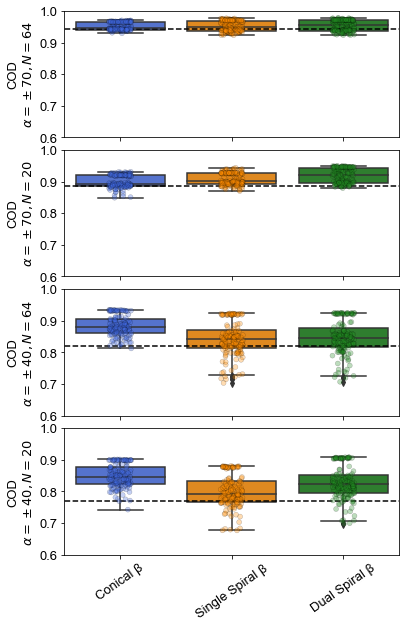

In [1906]:
font = {'family':'sans-serif','sans-serif':'Arial',
        'size'   : 13}
matplotlib.rc('font', **font)
import seaborn as sn
f,axs = plt.subplots(nrows=4,figsize=(6,10),sharex=True)
#modes = ['x','dual','quad','conical-g','sx-g2','sx2-dual','rand']
modes=['x','conical-b','sx-b','sxb-dual']
nicemodes = ['Single', 'Conical β', 'Single Spiral β', 'Dual Spiral β']

colors = ['k','royalblue','darkorange','forestgreen']#,'orangered','darkorchid','lightpink']
my_pal = {}
for i,c in enumerate(colors):
    my_pal[nicemodes[i]]=c

for i,c in enumerate(range(1,4+1)):
    all_rs = []
    for nam in pnames:
        r = np.load('Data/c%s-%s_si2.npy'%(c,nam))
        all_rs.append(r)
    
    data = []
    for j in range(4):
        d=np.take(all_rs,j,-1).flatten()
        data.append(d)
        
    df = pd.DataFrame(data)
    df = df.T
    df.columns=nicemodes
    
    df2 = df.drop(columns='Single')
    
    sn.boxplot(data=df2,orient='v',dodge=True,ax=axs[i],palette=my_pal)
    sn.stripplot(data=df2,jitter=True,alpha=.3,ax=axs[i],palette=my_pal,edgecolor='k',linewidth=.4)
    #sn.stripplot(data=df,jitter=True,alpha=.1,ax=axs[i],color='gray')
    
plt.xticks(rotation=35)

for ax in axs:
    ax.set_ylim([.6,1])

axs[0].set_ylabel('COD\n'+r'$\alpha=\pm70, N=64$')
axs[1].set_ylabel('COD\n'+r'$\alpha=\pm70, N=20$')
axs[2].set_ylabel('COD\n'+r'$\alpha=\pm40, N=64$')
axs[3].set_ylabel('COD\n'+r'$\alpha=\pm40, N=20$')

f.subplots_adjust(hspace=.1)


for m in nicemodes[1:]:
    df[m]=df[m]/df['Single']
    

print('Fractional change in COD compared to single result')
for i in range(1,4):
    print(nicemodes[i],':\t %.3f'%np.mean(df,axis=0)[i],'±','%.3f'%np.std(df,axis=0)[i])
    
singles = [0.9415429447281053,
0.8874484389349474,
0.818697809899629,
0.770235599261817]

for i in range(4):
    axs[i].plot((-1,4),(singles[i],singles[i]),'k--')
plt.show()

# Magnetic simulations

In [311]:
def create_hopfion_data(tilt=10,a_range=70):
    """" Defaults to create 30x30 images """
    # Generate hopfion
    MX,MY,MZ = ma.Magnetic_Phantom.hopfion(bbox_length_px=100)
    # Crop out the blank space
    MX,MY,MZ = MX[20:-20,20:-20,20:-20],MY[20:-20,20:-20,20:-20],MZ[20:-20,20:-20,20:-20]
    # Reduce resolution to make the simulation smaller
    x=.66
    MXn=zoom(MX, (x,x,x))
    MYn=zoom(MY, (x,x,x))
    MZn=zoom(MZ, (x,x,x))
    MX,MY,MZ=MXn,MYn,MZn
    # Define mesh parameters
    p1 = (0,0,0)
    p2=(220*1e-9,220*1e-9,220*1e-9)
    n = 40
    n_pad=44
    mesh_params = (p1,p2,(n,n,n))

    # Calculate A and B
    AX,AY,AZ,mesh_params2 = ma.calculate_A_3D(MX,MY,MZ,mesh_params=mesh_params,n_pad=n_pad)
    BX,BY,BZ = ma.calculate_B_from_A(AX,AY,AZ,mesh_params=mesh_params2)
    
    #n_pad=n
    as_x,as_y,pxs,pys = ma.dual_axis_phase_generation(MX,MY,MZ,mesh_params,n_tilt= tilt,a_range=a_range,n_pad=n_pad)

    # add noise if desired
    # pxs = ma.noisy_phase(pxs,gaussian=True,noise_level=np.pi,lowpass=True)
    # pys = ma.noisy_phase(pys,gaussian=True,noise_level=np.pi,lowpass=True)

    angles_x = ma.generate_angles(mode='x',n_tilt=tilt,alpha=a_range)
    angles_y = ma.generate_angles(mode='y',n_tilt=tilt,beta=a_range,tilt2='beta')
    # pxs = ma.noisy_phase(pxs,holo=True,n=2,MX=MX,MY=MY,MZ=MZ,angles=angles_x,mesh_params=mesh_params,n_pad=n_pad,fringe=20,fxc=597,fyc=566,rc=50)
    # pys = ma.noisy_phase(pys,holo=True,n=2,MX=MX,MY=MY,MZ=MZ,angles=angles_y,mesh_params=mesh_params,n_pad=n_pad,fringe=20,fxc=597,fyc=566,rc=50)
    pxs = ma.noisy_phase(pxs,holo=True,MX=MX,MY=MY,MZ=MZ,angles=angles_x,mesh_params=mesh_params,n_pad=44,fxc=548,fyc=482,fringe=10,rc=50,n=0.1,v=.4,c=2000)
    pys = ma.noisy_phase(pys,holo=True,MX=MX,MY=MY,MZ=MZ,angles=angles_y,mesh_params=mesh_params,n_pad=44,fxc=548,fyc=482,fringe=10,rc=50,n=0.1,v=.4,c=2000)



    # Dual axis data
    bx_p,by_p = ma.dual_axis_B_generation(pxs,pys,mesh_params)

    # Multi axis data
    angles = np.concatenate([as_x,as_y])
    phis = np.concatenate([pxs,pys],axis=1)
    
    return phis, angles, BX,BY,BZ, mesh_params,MX,MY,MZ,AX,AY,AZ

def create_bubble_data(tilt=10,a_range=70):
    """" Defaults to create 30x30 images """
    name = r'Data/FeGe_220x220x50nm_0B.npy'
    M = np.load(name)
    MX,MY,MZ = M[:,:,:,0],M[:,:,:,1],M[:,:,:,2]

    z=1#.38

    MX=zoom(MX, (z, z, 1))
    MY=zoom(MY, (z, z, 1))
    MZ=zoom(MZ, (z, z, 1))
    
    # mask = np.zeros_like(MX)
    # mask[10:30,10:30,10:30]=1
    # MX = MX*mask
    # MY = MY*mask
    # MZ = MZ*mask
    
    MX,MY,MZ = ma.rotate_magnetisation(MX,MY,MZ,0,0,45)

    h0= np.hanning(40)
    hann2d = np.sqrt(np.outer(h0,h0))

    for i in range(40):
        MX[:,:,i] = MX[:,:,i]*hann2d

    for i in range(40):
        MY[:,:,i] = MY[:,:,i]*hann2d

    for i in range(40):
        MZ[:,:,i] = MZ[:,:,i]*hann2d

    

    p1 = (0,0,0)
    p2=(220*1e-9,220*1e-9,50*1e-9)
    n = 40
    n_pad=44
    mesh_params = (p1,p2,(n,n,n))
    
    AX,AY,AZ,mesh_params2 = ma.calculate_A_3D(MX,MY,MZ,mesh_params=mesh_params,n_pad=n_pad)
    BX,BY,BZ = ma.calculate_B_from_A(AX,AY,AZ,mesh_params=mesh_params2)

    #n_pad=n
    as_x,as_y,pxs,pys = ma.dual_axis_phase_generation(MX,MY,MZ,mesh_params,n_tilt= tilt,a_range=a_range,n_pad=n_pad)

    # add noise if desired
    # pxs = ma.noisy_phase(pxs,gaussian=True,noise_level=np.pi,lowpass=True)
    # pys = ma.noisy_phase(pys,gaussian=True,noise_level=np.pi,lowpass=True)

    angles_x = ma.generate_angles(mode='x',n_tilt=tilt,alpha=a_range)
    angles_y = ma.generate_angles(mode='y',n_tilt=tilt,beta=a_range,tilt2='beta')
    # pxs = ma.noisy_phase(pxs,holo=True,n=2,MX=MX,MY=MY,MZ=MZ,angles=angles_x,mesh_params=mesh_params,n_pad=n_pad,fringe=20,fxc=597,fyc=566,rc=50)
    # pys = ma.noisy_phase(pys,holo=True,n=2,MX=MX,MY=MY,MZ=MZ,angles=angles_y,mesh_params=mesh_params,n_pad=n_pad,fringe=20,fxc=597,fyc=566,rc=50)
    pxs_n = ma.noisy_phase(pxs,holo=True,MX=MX,MY=MY,MZ=MZ,angles=angles_x,mesh_params=mesh_params,n_pad=44,fxc=576,fyc=529,fringe=10,rc=30,n=0.02,v=.9,c=2000)
    pys_n = ma.noisy_phase(pys,holo=True,MX=MX,MY=MY,MZ=MZ,angles=angles_y,mesh_params=mesh_params,n_pad=44,fxc=576,fyc=529,fringe=10,rc=30,n=0.02,v=.9,c=2000)



    # Dual axis data
    bx_p,by_p = ma.dual_axis_B_generation(pxs,pys,mesh_params)

    # Multi axis data
    angles = np.concatenate([as_x,as_y])
    phis = np.concatenate([pxs_n,pys_n],axis=1)
    
    return phis, angles, BX,BY,BZ, mesh_params,MX,MY,MZ,AX,AY,AZ

def create_sphere_data(tilt=10,a_range=70):
    """" Defaults to create 30x30 images """
    # Generate sphere
    MX,MY,MZ,_ = ma.Magnetic_Phantom.sphere(bbox_length_px=100,rad_m=15e-9)
    # Crop out the blank space
    MX,MY,MZ = MX[20:-20,20:-20,20:-20],MY[20:-20,20:-20,20:-20],MZ[20:-20,20:-20,20:-20]
    # Reduce resolution to make the simulation smaller
    x=.66
    MX=zoom(MX, (x,x,x))
    MY=zoom(MY, (x,x,x))
    MZ=zoom(MZ, (x,x,x))

    MX,MY,MZ = ma.rotate_magnetisation(MX,MY,MZ,30,50,20)

    # Define mesh parameters
    p1 = (0,0,0)
    p2=(100*1e-9,100*1e-9,100*1e-9)
    n = 40
    n_pad=44
    mesh_params = (p1,p2,(n,n,n))

    # Calculate A and B
    AX,AY,AZ,mesh_params2 = ma.calculate_A_3D(MX,MY,MZ,mesh_params=mesh_params,n_pad=n_pad)
    BX,BY,BZ = ma.calculate_B_from_A(AX,AY,AZ,mesh_params=mesh_params2)
    
    #n_pad=n
    as_x,as_y,pxs,pys = ma.dual_axis_phase_generation(MX,MY,MZ,mesh_params,n_tilt= tilt,a_range=a_range,n_pad=n_pad)

    # add noise if desired
    # pxs = ma.noisy_phase(pxs,gaussian=True,noise_level=np.pi,lowpass=True)
    # pys = ma.noisy_phase(pys,gaussian=True,noise_level=np.pi,lowpass=True)

    angles_x = ma.generate_angles(mode='x',n_tilt=tilt,alpha=a_range)
    angles_y = ma.generate_angles(mode='y',n_tilt=tilt,beta=a_range,tilt2='beta')
    # pxs = ma.noisy_phase(pxs,holo=True,n=2,MX=MX,MY=MY,MZ=MZ,angles=angles_x,mesh_params=mesh_params,n_pad=n_pad,fringe=20,fxc=597,fyc=566,rc=50)
    # pys = ma.noisy_phase(pys,holo=True,n=2,MX=MX,MY=MY,MZ=MZ,angles=angles_y,mesh_params=mesh_params,n_pad=n_pad,fringe=20,fxc=597,fyc=566,rc=50)
    pxs_n = ma.noisy_phase(pxs,holo=True,MX=MX,MY=MY,MZ=MZ,angles=angles_x,mesh_params=mesh_params,n_pad=44,fxc=576,fyc=529,fringe=10,rc=30,n=0.02,v=.7,c=2000)
    pys_n = ma.noisy_phase(pys,holo=True,MX=MX,MY=MY,MZ=MZ,angles=angles_y,mesh_params=mesh_params,n_pad=44,fxc=576,fyc=529,fringe=10,rc=30,n=0.02,v=.7,c=2000)



    # Dual axis data
    bx_p,by_p = ma.dual_axis_B_generation(pxs,pys,mesh_params)

    # Multi axis data
    angles = np.concatenate([as_x,as_y])
    phis = np.concatenate([pxs_n,pys_n],axis=1)
    
    return phis, angles, BX,BY,BZ, mesh_params,MX,MY,MZ,AX,AY,AZ

def generate_phase_data_2(MX,MY,MZ,angles,mesh_params=None,n_pad=500,unpad=False):
    """ Returns phase projections for given M and angles
    in order [x, i_tilt, y] """
    # Initialise parameters
    phase_projs = []
    if mesh_params == None:
        p1 = (0,0,0)
        s = np.shape(MX)
        p2 = (s[0],s[1],s[2])
        n = p2
        mesh_params = [p1,p2,n]
    
    # Loop through projection angles
    for i in range(len(angles)):
        ax,ay,az = angles[i]
        #rotate M
        MXr,MYr,MZr = rotate_magnetisation_2(MX,MY,MZ,ax,ay,az)
        #calculate phase
        phase = ma.calculate_phase_M_2D(MXr,MYr,MZr,mesh_params=mesh_params,n_pad=n_pad,unpad=unpad)
        phase = np.flipud(phase.T)

        phase_projs.append(phase)            
    
    # Prepare projections for reconstruction
    phase_projs = np.transpose(phase_projs,axes=[1,0,2]) # reshape so proj is middle column
    phase_projs=phase_projs.astype(np.float32)
    return np.array(phase_projs)

def generate_vectors_3(angles,intrinsic2,flip):
    """ Converts list of 3D projection angles into
    list of astra-compatible projection vectors,
    with [r,d,u,v] vectors on each row. """
    vectors = []
    for [ax,ay,az] in angles:
        vector = get_astravec_3(ax,ay,az,intrinsic2,flip)
        vectors.append(vector)
    
    return vectors

def get_astravec_3(ax,ay,az,intrinsic2=False,flip=[1,1,1]):
    """ Given angles in degrees, return r,d,u,v as a concatenation
    of four 3-component vectors"""
    # Since we us flipud on y axis, ay needs reversing for desired behaviour
    #ay = -ay 
    #ax=-ax
    #az=-az
    ax,ay,az=ax*flip[0],ay*flip[1],az*flip[2]
    
    # centre of detector
    d = [0,0,0]
    
    # 3D rotation matrix - EXTRINSIC!
    mrot = np.array(ma.rotation_matrix(ax,ay,az,intrinsic=intrinsic2))
    
    # ray direction r
    r = mrot.dot([0,0,1])*-1 # -1 to match astra definitions
    # u (det +x)
    u = mrot.dot([1,0,0])
    # v (det +y)
    v = mrot.dot([0,1,0])

    return np.concatenate((r,d,u,v))

def recon_step(a_projs,ws,angles,mesh_params, thresh=0.706, algorithm = 'SIRT3D_CUDA', niter=40, weight = 0.001,
                            balance = 1, steps = 'backtrack', callback_freq = 0,intrinsic2=False,rev=1):
    """ Given a set of A-component projections along with their weights and angles, does a SIRT reconstruction on it.
    It will only use projections where the component accounted for >threshold % of the original data in that slice.
    
    Input: Tilt series for a component of A, with it's associated weightings, angles and mesh parameters
    Specify: The threshold for this roudn of nmaj (thresh) and the number of iterations (niter)
    Return: A 3D reconstruction of 1 component of A """
    
    # Initialise parameters
    p1,p2,nn=mesh_params
    res=p2[0]/nn[0]
    a_thresh = []
    angles_thresh = []
    
    # Threshold out data with low weighting
    for i,w in enumerate(ws):
        if abs(w) > thresh:
            a_thresh.append(a_projs[:,i,:])
            angles_thresh.append(angles[i])
            
    angles_thresh=np.array(angles_thresh)
    a_thresh = np.transpose(a_thresh,axes=[1,0,2]) # reshape so proj is middle column  

    # Perform SIRT reconstruction on remaining data
    vecs = generate_vectors_3(angles_thresh,intrinsic2,flip)
    recon = ma.generate_reconstruction(a_thresh,vecs, algorithm = algorithm, niter=niter, weight = weight,
                                balance = balance, steps = steps, callback_freq = callback_freq)
    
    # reformat to match structure of input data  
    recon = np.transpose(recon,axes=(2,1,0))[:,::-1*rev,:]
    
    # Rescale intensities to account for pixel size
    recon = recon/res
    
    # Ensure astra doesn't fill up the RAM
    astra.clear()
    
    return recon

def iterative_update_algorithm_2(phase_projs,angles,mesh_params,n_pad,n_full_iter=1,n_step_iter=5, 
                               algorithm = 'SIRT3D_CUDA',rev=1,flip2=[1,1,1], weight = 0.001,thresh_range=(.01,.7),callback=False,intrinsic=True,flip=[1,1,1],intrinsic2=False):
    """ Puts everything together for the multi-axis reconstruction procedure 
    Input: Phase tilt series, associated angles, mesh parameters, and pad count in pixels
    Specify: nmaj (n_full_iter), nmin (n_step_iter), and threshold range (tmin,tmax)
    Returns: Reconstructed Ax, Ay, Az arrays """
    
    if callback == True:
        callback_freq = 1
    else:
        callback_freq = 0
    
    # Calculate weightings for each tilt angle
    ws = calculate_A_contributions_2(angles,intrinsic,flip2)
    
    # In default run, threshold will initially be high (tmax)
    tmin,tmax = thresh_range
    # generate linearly spaced threshold list from low to high threshold for each nmaj
    possible_ts = np.linspace(tmin,tmax,n_full_iter-1)
    thresh = tmax
    
    # initialize new arrays
    a_weighted_x = np.zeros_like(phase_projs)
    a_weighted_y = np.zeros_like(phase_projs)
    a_weighted_z = np.zeros_like(phase_projs)
    
    # Generate A(0) tilt series
    a_weighted_x, a_weighted_y, a_weighted_z = ma.update_weighted_proj_data(phase_projs,a_weighted_x,a_weighted_y,a_weighted_z,ws)
    
    if callback == True:
        print("Initialised")
      
    # do first step of reconstruction
    Ax_recon = recon_step(a_weighted_x,ws[:,0],angles,mesh_params,niter=n_step_iter,rev=rev,intrinsic2=intrinsic2,algorithm=algorithm,weight=weight,thresh=thresh, callback_freq =callback_freq) 
    Ay_recon = recon_step(a_weighted_y,ws[:,1],angles,mesh_params,niter=n_step_iter,rev=rev,intrinsic2=intrinsic2,algorithm=algorithm,weight=weight,thresh=thresh, callback_freq =callback_freq) 
    Az_recon = recon_step(a_weighted_z,ws[:,2],angles,mesh_params,niter=n_step_iter,rev=rev,intrinsic2=intrinsic2,algorithm=algorithm,weight=weight,thresh=thresh, callback_freq =callback_freq) 
    
    if callback == True:
        print("Iteration 1 finished")
    
    # Cycle through iterations for nmaj>1
    for i in range(n_full_iter-1):
        
        # Repeat t=tmax for nmaj=2, then decrease t for subsequent iterations
        thresh = possible_ts[-(i+1)]
        # recalculate projection data
       
        # project current A to get A_p(n)
        n=n_pad
        a_weighted_x,a_weighted_y,a_weighted_z = ma.generate_A_projection_fast(Ax_recon[n:-n,n:-n,n:-n],Ay_recon[n:-n,n:-n,n:-n],Az_recon[n:-n,n:-n,n:-n],angles,mesh_params=mesh_params,reorient=True)
        
        # Update to get A_p(n+1)
        a_weighted_x = np.pad(a_weighted_x,[(n_pad,n_pad),(0,0),(n_pad,n_pad)], mode='constant', constant_values=0)
        a_weighted_y = np.pad(a_weighted_y,[(n_pad,n_pad),(0,0),(n_pad,n_pad)], mode='constant', constant_values=0)
        a_weighted_z = np.pad(a_weighted_z,[(n_pad,n_pad),(0,0),(n_pad,n_pad)], mode='constant', constant_values=0)
        a_weighted_x, a_weighted_y, a_weighted_z = ma.update_weighted_proj_data(phase_projs,a_weighted_x,a_weighted_y,a_weighted_z,ws)
        
        # SIRT reconstruct to get A(n+1)
        Ax_recon = recon_step(a_weighted_x,ws[:,0],angles,mesh_params,rev=rev,niter=n_step_iter,intrinsic2=intrinsic2,thresh=thresh,algorithm=algorithm,weight=weight, callback_freq =callback_freq) 
        Ay_recon = recon_step(a_weighted_y,ws[:,1],angles,mesh_params,rev=rev,niter=n_step_iter,intrinsic2=intrinsic2,thresh=thresh,algorithm=algorithm,weight=weight, callback_freq =callback_freq) 
        Az_recon = recon_step(a_weighted_z,ws[:,2],angles,mesh_params,rev=rev,niter=n_step_iter,intrinsic2=intrinsic2,thresh=thresh,algorithm=algorithm,weight=weight, callback_freq =callback_freq) 
        
        # ensure astra doesn't clog up the RAM
        astra.clear()
        
        if callback == True:
            print("Iteration ",i+2," finished")
    
    return Ax_recon,Ay_recon,Az_recon

def calculate_A_contributions_2(angles,intrinsic=True,flip=[1,1,1]):
    """ For a given tilt angle series [[-70,0,0], [-60,0,0],...]
    calculate the weighting that the x,y,z components of A will contribute
    to each phase image in the series """
    
    ws = []
    
    for i, a in enumerate(angles):
        # calculate rotation matrix
        mrot = ma.rotation_matrix(a[0]*flip[0],a[1]*flip[1],a[2]*flip[2],intrinsic=intrinsic)

        # Calculate position of x,y,z axes after rotation
        nx = np.dot(mrot,[1,0,0])
        ny = np.dot(mrot,[0,1,0])
        nz = np.dot(mrot,[0,0,1])
        
        #print(nx,ny,nz)

        # calculate how aligned the new x,y,z axes are with the beam direction
        # i.e. how much does this component contribute to the phase image?
        nx = np.dot(nx,[0,0,1])
        ny = np.dot(ny,[0,0,1])
        nz = np.dot(nz,[0,0,1])
        
        ws.append([nx,ny,nz])
    return np.array(ws)

In [ ]:
for intrinsic in [True,False]:
    for intrinsic2 in [True,False]:
        for rev in [1,-1]:
            for flip in [[1,1,1],[-1,-1,-1],[-1,1,1],[1,-1,1],[1,1,-1],[-1,-1,1],[-1,1,-1],[1,-1,-1]]:
                for flip2 in [[1,1,1],[-1,-1,-1],[-1,1,1],[1,-1,1],[1,1,-1],[-1,-1,1],[-1,1,-1],[1,-1,-1]]:
                    try:
                        t1,t2,t3=iterative_update_algorithm_2(phis,angles,mesh_params,n_pad,n_full_iter=2,n_step_iter=15, 
                                           thresh_range=(th1,th2),algorithm='wavelet_coif1',flip2=flip2,weight=weight,intrinsic=intrinsic,intrinsic2=intrinsic2,flip=flip,rev=rev)

                        b1,b2,b3 = ma.calculate_B_from_A(t1,t2,t3,mesh_params=mesh_params)
                        n=n_pad
                        a,b,c = ma.COD(b1[n:-n,n:-n,n:-n],BX_h[n:-n,n:-n,n:-n]),ma.COD(b2[n:-n,n:-n,n:-n],BY_h[n:-n,n:-n,n:-n]),ma.COD(b3[n:-n,n:-n,n:-n],BZ_h[n:-n,n:-n,n:-n])
                        print(intrinsic,intrinsic2,flip,np.mean([a,b,c]),a,b,c)
                    except:
                        print(intrinsic,intrinsic2,flip,'fail')

True True [1, 1, 1] fail
True True [1, 1, 1] fail
True True [1, 1, 1] fail
True True [1, 1, 1] fail
True True [1, 1, 1] fail
True True [1, 1, 1] fail
True True [1, 1, 1] fail
True True [1, 1, 1] fail
True True [-1, -1, -1] fail
True True [-1, -1, -1] fail
True True [-1, -1, -1] fail
True True [-1, -1, -1] fail
True True [-1, -1, -1] fail
True True [-1, -1, -1] fail
True True [-1, -1, -1] fail
True True [-1, -1, -1] fail
True True [-1, 1, 1] fail
True True [-1, 1, 1] fail
True True [-1, 1, 1] fail
True True [-1, 1, 1] fail
True True [-1, 1, 1] fail
True True [-1, 1, 1] fail
True True [-1, 1, 1] fail
True True [-1, 1, 1] fail
True True [1, -1, 1] fail
True True [1, -1, 1] fail
True True [1, -1, 1] fail
True True [1, -1, 1] fail
True True [1, -1, 1] fail
True True [1, -1, 1] fail
True True [1, -1, 1] fail
True True [1, -1, 1] fail
True True [1, 1, -1] fail
True True [1, 1, -1] fail
True True [1, 1, -1] fail
True True [1, 1, -1] fail
True True [1, 1, -1] fail
True True [1, 1, -1] fail
True

In [304]:
import astra
t1,t2,t3=iterative_update_algorithm_2(phis,angles,mesh_params,n_pad,n_full_iter=2,n_step_iter=15, 
                               thresh_range=(th1,th2),algorithm='wavelet_coif1',weight=weight)

b1,b2,b3 = ma.calculate_B_from_A(t1,t2,t3,mesh_params=mesh_params)
n=n_pad
a,b,c = ma.COD(b1[n:-n,n:-n,n:-n],BX_h[n:-n,n:-n,n:-n]),ma.COD(b2[n:-n,n:-n,n:-n],BY_h[n:-n,n:-n,n:-n]),ma.COD(b3[n:-n,n:-n,n:-n],BZ_h[n:-n,n:-n,n:-n])
print(np.mean([a,b,c]),a,b,c)
astra.clear()

0.3827537664445814 0.7061554183623606 0.36608286690524494 0.07602301406613865


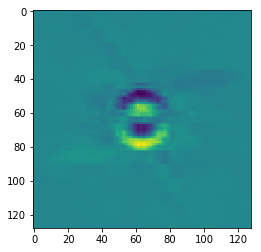

In [300]:
plt.imshow(b2[:,:,20+n_pad])

In [369]:
from scipy.ndimage import zoom
# Create realistic phantoms
phis_h, angles_h, BX_h,BY_h,BZ_h, mesh_params_h,MX_h,MY_h,MZ_h,AX_h,AY_h,AZ_h = create_hopfion_data()
phis_b, angles_b, BX_b,BY_b,BZ_b, mesh_params_b,MX_b,MY_b,MZ_b,AX_b,AY_b,AZ_b = create_bubble_data()
phis_s, angles_s, BX_s,BY_s,BZ_s, mesh_params_s,MX_s,MY_s,MZ_s,AX_s,AY_s,AZ_s = create_sphere_data()

In [370]:
# Save realistic phantoms
fpath = r'Data/hopfion_phantom.npy'
data = np.array([phis_h, angles_h, BX_h,BY_h,BZ_h, mesh_params_h,MX_h,MY_h,MZ_h,AX_h,AY_h,AZ_h],dtype=object)
np.save(fpath,data)

fpath = r'Data/bubble_phantom.npy'
data = np.array([phis_b, angles_b, BX_b,BY_b,BZ_b, mesh_params_b,MX_b,MY_b,MZ_b,AX_b,AY_b,AZ_b],dtype=object)
np.save(fpath,data)

fpath = r'Data/sphere_phantom.npy'
data = np.array([phis_s, angles_s, BX_s,BY_s,BZ_s, mesh_params_s,MX_s,MY_s,MZ_s,AX_s,AY_s,AZ_s],dtype=object)
np.save(fpath,data)

In [3]:
[phis_h, angles_h, BX_h,BY_h,BZ_h, mesh_params_h,MX_h,MY_h,MZ_h,AX_h,AY_h,AZ_h ] = np.load(r'Data/hopfion_phantom.npy',allow_pickle=True)
[phis_b, angles_b, BX_b,BY_b,BZ_b, mesh_params_b,MX_b,MY_b,MZ_b,AX_b,AY_b,AZ_b ] = np.load(r'Data/bubble_phantom.npy',allow_pickle=True)
[phis_s, angles_s, BX_s,BY_s,BZ_s, mesh_params_s,MX_s,MY_s,MZ_s,AX_s,AY_s,AZ_s ] = np.load(r'Data/sphere_phantom.npy',allow_pickle=True)

In [270]:
def test_series_mag(Ms,mesh_params,fname='test',ntest=30,alg='TV1',niter=20,weight=0.1,alpha = 45,n_tilt=30,beta=30,gamma=180,dist_n2=7,n_pad=44):
    modes=['dual','quad','conical-g','sx2-dual','uniform-rand']
    
    n_pad=44
    nmaj=3
    nmin=15
    weight=2e-3
    th1,th2=.2,.8

    all_res = []
    for i in range(ntest):
        Mx,My,Mz = copy.deepcopy(Ms)
        ax,ay,az=np.random.rand(3)*360
        MX,MY,MZ = ma.rotate_magnetisation(Mx,My,Mz,ax,ay,az)
        res = []
        for val in modes:
            
            angles = generate_angles(mode=val,alpha=alpha,n_tilt=n_tilt,beta=beta,dist_n2=dist_n2,gamma=gamma)
            
            # if val in ['sx-g2','sx2-dual'] :
            #     vectors = generate_vectors_2(angles)
            #     phis = generate_phase_data(MX,MY,MZ,angles_x,mesh_params=mesh_params,n_pad=n_pad,unpad=False)
            # else:
            phis = generate_phase_data_2(MX,MY,MZ,angles,mesh_params=mesh_params,n_pad=n_pad,unpad=False)
            fxc,fyc,fringe,rc,n,v,c = 576, 529, 10, 30, .02, .7, 2000
            phis = ma.noisy_phase(phis,holo=True,MX=MX,MY=MY,MZ=MZ,angles=angles,mesh_params=mesh_params,n_pad=44,fxc=fxc,fyc=fyc,fringe=fringe,rc=rc,n=n,v=v,c=c)
            
            print(val,np.shape(phis),np.shape(angles))
            t1,t2,t3=iterative_update_algorithm_2(phis,angles,mesh_params,n_pad,n_full_iter=nmaj,n_step_iter=nmin, 
                                           thresh_range=(th1,th2),algorithm='wavelet_coif1',weight=weight)
            b1m,b2m,b3m = ma.calculate_B_from_A(t1,t2,t3,mesh_params=mesh_params)
            
            n=n_pad
            codx = ma.COD(BX[n:-n,n:-n,n:-n],b1m[n:-n,n:-n,n:-n])
            cody = ma.COD(BY[n:-n,n:-n,n:-n],b2m[n:-n,n:-n,n:-n])
            codz = ma.COD(BZ[n:-n,n:-n,n:-n],b3m[n:-n,n:-n,n:-n])
            res.append([codx,cody,codz])
        print(i,np.mean(res))
        all_res.append(res)
    np.save('Data/%s.npy'%fname,all_res)
    return all_res


from PIL import Image



def generate_phase_data_2(MX,MY,MZ,angles,mesh_params=None,n_pad=500,unpad=False):
    """ Returns phase projections for given M and angles
    in order [x, i_tilt, y] """
    # Initialise parameters
    phase_projs = []
    if mesh_params == None:
        p1 = (0,0,0)
        s = np.shape(MX)
        p2 = (s[0],s[1],s[2])
        n = p2
        mesh_params = [p1,p2,n]
    
    # Loop through projection angles
    for i in range(len(angles)):
        ax,ay,az = angles[i]
        #rotate M
        MXr,MYr,MZr = rotate_magnetisation_2(MX,MY,MZ,ax,ay,az)
        #calculate phase
        phase = ma.calculate_phase_M_2D(MXr,MYr,MZr,mesh_params=mesh_params,n_pad=n_pad,unpad=unpad)
        phase = np.flipud(phase.T)

        phase_projs.append(phase)            
    
    # Prepare projections for reconstruction
    phase_projs = np.transpose(phase_projs,axes=[1,0,2]) # reshape so proj is middle column
    phase_projs=phase_projs.astype(np.float32)
    return np.array(phase_projs)

def rotate_magnetisation_2(U,V,W,ax=0,ay=0,az=0):
    """ 
    Takes 3D gridded magnetisation values as input
    and returns them after an intrinsic rotation ax,ay,az 
    about the x,y,z axes (given in degrees) 
    (Uses convention of rotating about z, then y, then x)
    """
    # Rotate the gridded locations of M values
    Ub = rotate_bulk_2(U,ax,ay,az)
    Vb = rotate_bulk_2(V,ax,ay,az)
    Wb = rotate_bulk_2(W,ax,ay,az)
    
    shape = np.shape(Ub)
    
    # Convert gridded values to vectors
    coor_flat = grid_to_coor(Ub,Vb,Wb)
    
    # Rotate vectors
    coor_flat_r = rotate_vector_2(coor_flat,ax,ay,az)
    
    # Convert vectors back to gridded values
    Ur,Vr,Wr = coor_to_grid(coor_flat_r,shape=shape)
    
    # Set small values to 0
    # (In theory the magnitude of M in each cell should be Ms,
    #  so we can set magnitude lower than this to zero -
    #  typically python rounding errors lead to very small values,
    #  which it is useful to exclude here)
#    mag_max = (np.max(U)**2+np.max(V)**2+np.max(W)**2)**0.5
#    mag = (Ur**2+Vr**2+Wr**2)**.5
#     for M in [Ur,Vr,Wr]:
#         M[abs(M)<1e-5*mag_max] = 0
#         M[mag<.6*mag_max] = 0
    
    return Ur,Vr,Wr

def grid_to_coor(U,V,W):
    """ Convert gridded 3D data (3,n,n,n) into coordinates (n^3, 3) """
    coor_flat = []
    nx = np.shape(U)[0]
    ny = np.shape(U)[1]
    nz = np.shape(U)[2]
    for ix in range(nx):
        for iy in range(ny):
            for iz in range(nz):
                x = U[ix,iy,iz]
                y = V[ix,iy,iz]
                z = W[ix,iy,iz]
                coor_flat.append([x,y,z])
                
    return coor_flat

def coor_to_grid(coor_flat,shape=None):
    """ Convert coordinates (n^3, 3) into gridded 3D data (3,n,n,n) """
    if shape == None:
        n = int(np.round(np.shape(coor_flat)[0]**(1/3)))
        shape = (n,n,n)
    nx,ny,nz = shape
    
    x = np.take(coor_flat,0,axis=1)
    y = np.take(coor_flat,1,axis=1)
    z = np.take(coor_flat,2,axis=1)
    U = x.reshape((nx,ny,nz))
    V = y.reshape((nx,ny,nz))
    W = z.reshape((nx,ny,nz))

    return U, V, W

def rotate_vector_2(coor_flat,ax,ay,az):
    """ Rotates vectors by specified angles ax,ay,az 
    about the x,y,z axes (given in degrees) """
    
    # Get rotation matrix
    mrot = ma.rotation_matrix(ax,ay,az,intrinsic=True)    

    coor_flat_r = np.zeros_like(coor_flat)
    
    # Apply rotation matrix to each M vector
    for i,M in enumerate(coor_flat):
        coor_flat_r[i] = mrot.dot(M)
    
    return coor_flat_r

# def rotate_bulk_2(P,ax,ay,az,mode='ndimage'):
#     """ 
#     Rotate magnetisation locations from rotation angles ax,ay,az 
#     about the x,y,z axes (given in degrees) 
    
#     Can use PIL or ndimage. ndimage def works but PIL faster (should work! currently doesn't handle -ve)
    
#     NOTE: This implementation of scipy rotations is EXTRINSIC
#     Therefore, to make it compatible with our intrinsic vector
#     rotation, we swap the order of rotations (i.e. x then y then z)
#     """
#     # Due to indexing, ay needs reversing for desired behaviour
#     if mode == 'PIL':
#         nx,ny,nz = np.shape(P)
#         Prot = np.zeros_like(P)
#         ax,ay,az=ax,-ay,az
#         scale = 256/np.max(P)
#         for i in range(nx):
#             im = Image.fromarray(P[i,:,:]*scale).convert('L')
#             im = im.rotate(ax,resample = Image.BILINEAR)
#             Prot[i,:,:] = np.array(im)/scale
#         for j in range(ny):
#             im = Image.fromarray(Prot[:,j,:]*scale).convert('L')
#             im = im.rotate(ay,resample = Image.BILINEAR)
#             Prot[:,j,:] = np.array(im)/scale
#         for k in range(nz):
#             im = Image.fromarray(Prot[:,:,k]*scale).convert('L')
#             im = im.rotate(az,resample = Image.BILINEAR)
#             Prot[:,:,k] = np.array(im)/scale
            
#         return Prot
    
#     else:
#         ay = -ay
        
        
#         P = ndimage.rotate(P,ax,reshape=False,axes=(1,2),order=1)
#         P = ndimage.rotate(P,ay,reshape=False,axes=(2,0),order=1)
#         P = ndimage.rotate(P,az,reshape=False,axes=(0,1),order=1)
        
        

#         return P

In [249]:
angles1

[[-90.0, 0, 0],
 [-77.14285714285714, 0, 0],
 [-64.28571428571428, 0, 0],
 [-51.42857142857143, 0, 0],
 [-38.57142857142857, 0, 0],
 [-25.714285714285708, 0, 0],
 [-12.857142857142861, 0, 0],
 [0.0, 0, 0],
 [12.857142857142861, 0, 0],
 [25.714285714285722, 0, 0],
 [38.571428571428584, 0, 0],
 [51.428571428571445, 0, 0],
 [64.28571428571428, 0, 0],
 [77.14285714285714, 0, 0],
 [90.0, 0, 0],
 [-90.0, 0, 90],
 [-77.14285714285714, 0, 90],
 [-64.28571428571428, 0, 90],
 [-51.42857142857143, 0, 90],
 [-38.57142857142857, 0, 90],
 [-25.714285714285708, 0, 90],
 [-12.857142857142861, 0, 90],
 [0.0, 0, 90],
 [12.857142857142861, 0, 90],
 [25.714285714285722, 0, 90],
 [38.571428571428584, 0, 90],
 [51.428571428571445, 0, 90],
 [64.28571428571428, 0, 90],
 [77.14285714285714, 0, 90],
 [90.0, 0, 90]]

In [161]:
import astra
t1,t2,t3=iterative_update_algorithm_2(phis,angles,mesh_params,n_pad,n_full_iter=2,n_step_iter=15, 
                               thresh_range=(th1,th2),algorithm='wavelet_coif1',weight=weight)

b1,b2,b3 = ma.calculate_B_from_A(t1,t2,t3,mesh_params=mesh_params)
n=n_pad
a,b,c = ma.COD(b1[n:-n,n:-n,n:-n],BX_h[n:-n,n:-n,n:-n]),ma.COD(b2[n:-n,n:-n,n:-n],BY_h[n:-n,n:-n,n:-n]),ma.COD(b3[n:-n,n:-n,n:-n],BZ_h[n:-n,n:-n,n:-n])
print(np.mean([a,b,c]),a,b,c)

0.3894131768261329 0.34243212640518905 0.5742356105820967 0.251571793491113


In [284]:
MX,MY,MZ=MX_h,MY_h,MZ_h
mesh_params=mesh_params_h
n_pad=44
nmaj=3
nmin=15
weight=2e-3
th1,th2=.2,.8
angles = generate_angles(mode='sx2-dual',n_tilt=31,alpha=90)
#angles = ma.generate_angles(mode='dual',n_tilt=30,alpha=90,beta=90,tilt2='beta')
phis = generate_phase_data_2(MX,MY,MZ,angles,mesh_params=mesh_params,n_pad=n_pad,unpad=False)
#phis = ma.generate_phase_data(MX,MY,MZ,angles,mesh_params=mesh_params,n_pad=n_pad,unpad=False)
fxc,fyc,fringe,rc,n,v,c = 576, 529, 10, 30, .02, .7, 2000
#phis = ma.noisy_phase(phis,holo=True,MX=MX,MY=MY,MZ=MZ,angles=angles,mesh_params=mesh_params,n_pad=44,fxc=fxc,fyc=fyc,fringe=fringe,rc=rc,n=n,v=v,c=c)

In [128]:
angles = generate_angles(mode='dual',n_tilt=30,alpha=90)

In [285]:
ma.plot_phases_interactive(phis)

interactive(children=(IntSlider(value=14, description='i', max=29), Output()), _dom_classes=('widget-interact'…

In [286]:
ws = calculate_A_contributions_2(angles)
ws

array([[-1.00000000e+00, -6.12323400e-17,  6.12323400e-17],
       [-8.44312339e-01, -4.87463956e-01,  2.22520934e-01],
       [-4.50484434e-01, -7.80261928e-01,  4.33883739e-01],
       [ 0.00000000e+00, -7.81831482e-01,  6.23489802e-01],
       [ 3.11744901e-01, -5.39958007e-01,  7.81831482e-01],
       [ 3.75754340e-01, -2.16941870e-01,  9.00968868e-01],
       [ 2.22520934e-01, -1.36254775e-17,  9.74927912e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-2.22520934e-01,  1.36254775e-17,  9.74927912e-01],
       [-3.75754340e-01,  2.16941870e-01,  9.00968868e-01],
       [-3.11744901e-01,  5.39958007e-01,  7.81831482e-01],
       [ 0.00000000e+00,  7.81831482e-01,  6.23489802e-01],
       [ 4.50484434e-01,  7.80261928e-01,  4.33883739e-01],
       [ 8.44312339e-01,  4.87463956e-01,  2.22520934e-01],
       [ 1.00000000e+00,  6.12323400e-17,  6.12323400e-17],
       [ 0.00000000e+00, -1.00000000e+00,  6.12323400e-17],
       [ 4.87463956e-01, -8.44312339e-01

In [287]:
import astra
t1,t2,t3=iterative_update_algorithm_2(phis,angles,mesh_params,n_pad,n_full_iter=2,n_step_iter=15, 
                               thresh_range=(th1,th2),algorithm='wavelet_coif1',weight=weight)

In [288]:
b1,b2,b3 = ma.calculate_B_from_A(t1,t2,t3,mesh_params=mesh_params)
n=n_pad
a,b,c = ma.COD(b1[n:-n,n:-n,n:-n],BX_h[n:-n,n:-n,n:-n]),ma.COD(b2[n:-n,n:-n,n:-n],BY_h[n:-n,n:-n,n:-n]),ma.COD(b3[n:-n,n:-n,n:-n],BZ_h[n:-n,n:-n,n:-n])
print(np.mean([a,b,c]))

0.37395284909570253


In [289]:
a,b,c

(0.4992192225340695, 0.5736710664746738, 0.048968258278364374)

In [105]:
angles = ma.generate_angles(mode='dual',n_tilt=30,alpha=90,beta=90,tilt2='beta')
t1,t2,t3=ma.iterative_update_algorithm(phis,angles,mesh_params,n_pad,n_full_iter=2,n_step_iter=15, 
                               thresh_range=(th1,th2),algorithm='wavelet_coif1',weight=weight)

b1,b2,b3 = ma.calculate_B_from_A(t1,t2,t3,mesh_params=mesh_params)
n=n_pad
a,b,c = ma.COD(b1[n:-n,n:-n,n:-n],BX_h[n:-n,n:-n,n:-n]),ma.COD(b2[n:-n,n:-n,n:-n],BY_h[n:-n,n:-n,n:-n]),ma.COD(b3[n:-n,n:-n,n:-n],BZ_h[n:-n,n:-n,n:-n])
print(np.mean([a,b,c]))

0.7585987430417553


In [106]:
a,b,c

(0.8098666031450854, 0.7945637451650924, 0.6713658808150882)

In [202]:
angles = generate_angles(mode='dual',n_tilt=15,alpha=90)
ws1 = calculate_A_contributions_2(angles)
ws

array([[ 0.00000000e+00, -1.00000000e+00,  6.12323400e-17],
       [ 0.00000000e+00, -8.66025404e-01,  5.00000000e-01],
       [ 0.00000000e+00, -5.00000000e-01,  8.66025404e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  5.00000000e-01,  8.66025404e-01],
       [ 0.00000000e+00,  8.66025404e-01,  5.00000000e-01],
       [ 0.00000000e+00,  1.00000000e+00,  6.12323400e-17],
       [ 1.00000000e+00,  0.00000000e+00,  6.12323400e-17],
       [ 8.66025404e-01,  0.00000000e+00,  5.00000000e-01],
       [ 5.00000000e-01,  0.00000000e+00,  8.66025404e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-5.00000000e-01,  0.00000000e+00,  8.66025404e-01],
       [-8.66025404e-01,  0.00000000e+00,  5.00000000e-01],
       [-1.00000000e+00,  0.00000000e+00,  6.12323400e-17]])

In [203]:
angles = ma.generate_angles(mode='dual',n_tilt=15,alpha=90,beta=90,tilt2='beta')
ws2 = ma.calculate_A_contributions(angles)
ws

array([[ 0.00000000e+00, -1.00000000e+00,  6.12323400e-17],
       [ 0.00000000e+00, -8.66025404e-01,  5.00000000e-01],
       [ 0.00000000e+00, -5.00000000e-01,  8.66025404e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  5.00000000e-01,  8.66025404e-01],
       [ 0.00000000e+00,  8.66025404e-01,  5.00000000e-01],
       [ 0.00000000e+00,  1.00000000e+00,  6.12323400e-17],
       [ 1.00000000e+00,  0.00000000e+00,  6.12323400e-17],
       [ 8.66025404e-01,  0.00000000e+00,  5.00000000e-01],
       [ 5.00000000e-01,  0.00000000e+00,  8.66025404e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-5.00000000e-01,  0.00000000e+00,  8.66025404e-01],
       [-8.66025404e-01,  0.00000000e+00,  5.00000000e-01],
       [-1.00000000e+00,  0.00000000e+00,  6.12323400e-17]])

In [204]:
ws1-ws2

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -6.12323400e-17,  0.00000000e+00],
       [ 0.00000000e+00, -5.30287619e-17,  0.00000000e+00],
       [ 0.00000000e+00, -3.06161700e-17,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  3.06161700e-17,  0.00000000e+00],
       [ 0.00000000e+00,  5.30287619e-17,  0.00000000e+00],
       [ 0.00000000e+00,  6.12323400e-17,  0.00000000e+00]])

In [271]:
MX,MY,MZ=MX_h,MY_h,MZ_h
mesh_params=mesh_params_h
n_pad=44
nmaj=3
nmin=15
weight=2e-3
th1,th2=.2,.8
angles1 = generate_angles(mode='dual',n_tilt=30,alpha=90)
#angles1=np.array(angles1)
#angles1[:,0]=angles1[:,0]*-1
phis1 = generate_phase_data_2(MX,MY,MZ,angles1,mesh_params=mesh_params,n_pad=n_pad,unpad=False)
# angles2 = ma.generate_angles(mode='dual',n_tilt=30,alpha=90,beta=90,tilt2='beta')
# phis2 = ma.generate_phase_data(MX,MY,MZ,angles2,mesh_params=mesh_params,n_pad=n_pad,unpad=False)


fxc,fyc,fringe,rc,n,v,c = 576, 529, 10, 30, .02, .7, 2000
#phis = ma.noisy_phase(phis,holo=True,MX=MX,MY=MY,MZ=MZ,angles=angles,mesh_params=mesh_params,n_pad=44,fxc=fxc,fyc=fyc,fringe=fringe,rc=rc,n=n,v=v,c=c)

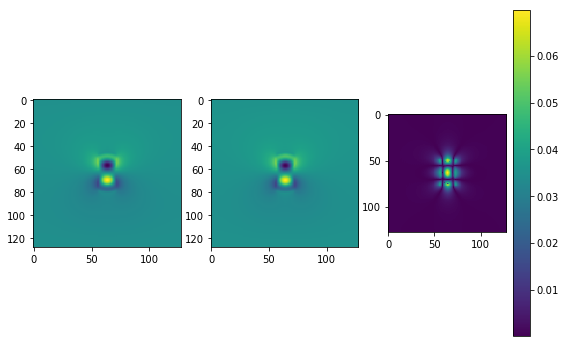

In [276]:
f,axs=plt.subplots(ncols=3,figsize=(9,6))
i=29
axs[0].imshow(phis1[:,i,:])
axs[1].imshow(phis2[:,i,:])
im=axs[2].imshow(abs(abs(phis2[:,i,:])-abs(phis1[:,i,:])))

plt.colorbar(im)

In [465]:
angles = ma.generate_angles(mode='dual',alpha=70,n_tilt=64,beta=90,dist_n2=90,gamma=180,tilt2='beta')
ws= ma.calculate_A_contributions(angles)
ws

array([[ 0.00000000e+00, -9.39692621e-01,  3.42020143e-01],
       [ 0.00000000e+00, -9.09844497e-01,  4.14949385e-01],
       [ 0.00000000e+00, -8.74346616e-01,  4.85301963e-01],
       [ 0.00000000e+00, -8.33419406e-01,  5.52641017e-01],
       [ 0.00000000e+00, -7.87317008e-01,  6.16548400e-01],
       [ 0.00000000e+00, -7.36325698e-01,  6.76627273e-01],
       [ 0.00000000e+00, -6.80762111e-01,  7.32504572e-01],
       [ 0.00000000e+00, -6.20971274e-01,  7.83833322e-01],
       [ 0.00000000e+00, -5.57324463e-01,  8.30294793e-01],
       [ 0.00000000e+00, -4.90216899e-01,  8.71600477e-01],
       [ 0.00000000e+00, -4.20065291e-01,  9.07493885e-01],
       [ 0.00000000e+00, -3.47305253e-01,  9.37752132e-01],
       [ 0.00000000e+00, -2.72388593e-01,  9.62187328e-01],
       [ 0.00000000e+00, -1.95780513e-01,  9.80647740e-01],
       [ 0.00000000e+00, -1.17956717e-01,  9.93018737e-01],
       [ 0.00000000e+00, -3.94004592e-02,  9.99223500e-01],
       [ 0.00000000e+00,  3.94004592e-02

In [471]:
angles = generate_angles(mode='dual',alpha=70,n_tilt=64,beta=0,dist_n2=0,gamma=180)
ws= calculate_A_contributions_2(angles)
ws

array([[ 0.00000000e+00, -9.39692621e-01,  3.42020143e-01],
       [ 0.00000000e+00, -9.09844497e-01,  4.14949385e-01],
       [ 0.00000000e+00, -8.74346616e-01,  4.85301963e-01],
       [ 0.00000000e+00, -8.33419406e-01,  5.52641017e-01],
       [ 0.00000000e+00, -7.87317008e-01,  6.16548400e-01],
       [ 0.00000000e+00, -7.36325698e-01,  6.76627273e-01],
       [ 0.00000000e+00, -6.80762111e-01,  7.32504572e-01],
       [ 0.00000000e+00, -6.20971274e-01,  7.83833322e-01],
       [ 0.00000000e+00, -5.57324463e-01,  8.30294793e-01],
       [ 0.00000000e+00, -4.90216899e-01,  8.71600477e-01],
       [ 0.00000000e+00, -4.20065291e-01,  9.07493885e-01],
       [ 0.00000000e+00, -3.47305253e-01,  9.37752132e-01],
       [ 0.00000000e+00, -2.72388593e-01,  9.62187328e-01],
       [ 0.00000000e+00, -1.95780513e-01,  9.80647740e-01],
       [ 0.00000000e+00, -1.17956717e-01,  9.93018737e-01],
       [ 0.00000000e+00, -3.94004592e-02,  9.99223500e-01],
       [ 0.00000000e+00,  3.94004592e-02

In [ ]:
import astra
import copy
pnames = ['Hopfion','Bubble','Sphere']
Ps = [[MX_h,MY_h,MZ_h],[MX_b,MY_b,MZ_b],[MX_s,MY_s,MZ_s]]
meshes = [mesh_params_h,mesh_params_b,mesh_params_s]
# case 1 hight tilt, high N
alpha = 70
beta = 90
n_tilt,dist_n2 = 64,7
for i,P in enumerate(Ps):
    _=test_series_mag(P,meshes[i],fname=r'MAG-c1-%s_si1'%pnames[i],alpha=alpha,n_tilt=n_tilt,gamma=180,beta=30,dist_n2=dist_n2)

# # case 2 - high tilt low N)
alpha = 40
beta = 90
n_tilt,dist_n2 = 20,5
for i,P in enumerate(Ps):
    _=test_series_mag(P,meshes[i],fname=r'MAG-c2-%s_si1'%pnames[i],alpha=alpha,n_tilt=n_tilt,gamma=180,beta=30,dist_n2=dist_n2)

# # case 3 - low tilt high N
alpha = 40
n_tilt,dist_n2 = 64,7
for i,P in enumerate(Ps):
    _=test_series_mag(P,meshes[i],fname=r'MAG-c3-%s_si1'%pnames[i],alpha=alpha,n_tilt=n_tilt,gamma=180,beta=20,dist_n2=dist_n2)
    
# # case 4 - low tilt low N
alpha = 40
n_tilt,dist_n2 = 20,5
for i,P in enumerate(Ps):
    _=test_series_mag(P,meshes[i],fname=r'MAG-c4-%s_si1'%pnames[i],alpha=alpha,n_tilt=n_tilt,gamma=180,beta=20,dist_n2=dist_n2)

dual (128, 64, 128) (64, 3)


..\multi_axis.py:2617: RuntimeWarning: divide by zero encountered in true_divide
  new_x = weight_phases(new_x,1/ws[:,0])


In [289]:
def create_hopfion_data(tilt=10,a_range=70):
    """" Defaults to create 30x30 images """
    # Generate hopfion
    MX,MY,MZ = ma.Magnetic_Phantom.hopfion(bbox_length_px=100)
    # Crop out the blank space
    MX,MY,MZ = MX[20:-20,20:-20,20:-20],MY[20:-20,20:-20,20:-20],MZ[20:-20,20:-20,20:-20]
    # Reduce resolution to make the simulation smaller
    x=.66
    MXn=zoom(MX, (x,x,x))
    MYn=zoom(MY, (x,x,x))
    MZn=zoom(MZ, (x,x,x))
    MX,MY,MZ=MXn,MYn,MZn
    # Define mesh parameters
    p1 = (0,0,0)
    p2=(220*1e-9,220*1e-9,220*1e-9)
    n = 40
    n_pad=44
    mesh_params = (p1,p2,(n,n,n))

    # Calculate A and B
    AX,AY,AZ,mesh_params2 = ma.calculate_A_3D(MX,MY,MZ,mesh_params=mesh_params,n_pad=n_pad)
    BX,BY,BZ = ma.calculate_B_from_A(AX,AY,AZ,mesh_params=mesh_params2)
    
    #n_pad=n
    as_x,as_y,pxs,pys = ma.dual_axis_phase_generation(MX,MY,MZ,mesh_params,n_tilt= tilt,a_range=a_range,n_pad=n_pad)

    # add noise if desired
    # pxs = ma.noisy_phase(pxs,gaussian=True,noise_level=np.pi,lowpass=True)
    # pys = ma.noisy_phase(pys,gaussian=True,noise_level=np.pi,lowpass=True)

    angles_x = ma.generate_angles(mode='x',n_tilt=tilt,alpha=a_range)
    angles_y = ma.generate_angles(mode='y',n_tilt=tilt,beta=a_range,tilt2='beta')
    # pxs = ma.noisy_phase(pxs,holo=True,n=2,MX=MX,MY=MY,MZ=MZ,angles=angles_x,mesh_params=mesh_params,n_pad=n_pad,fringe=20,fxc=597,fyc=566,rc=50)
    # pys = ma.noisy_phase(pys,holo=True,n=2,MX=MX,MY=MY,MZ=MZ,angles=angles_y,mesh_params=mesh_params,n_pad=n_pad,fringe=20,fxc=597,fyc=566,rc=50)
    pxs = ma.noisy_phase(pxs,holo=True,MX=MX,MY=MY,MZ=MZ,angles=angles_x,mesh_params=mesh_params,n_pad=44,fxc=548,fyc=482,fringe=10,rc=50,n=0.1,v=.4,c=2000)
    pys = ma.noisy_phase(pys,holo=True,MX=MX,MY=MY,MZ=MZ,angles=angles_y,mesh_params=mesh_params,n_pad=44,fxc=548,fyc=482,fringe=10,rc=50,n=0.1,v=.4,c=2000)



    # Dual axis data
    bx_p,by_p = ma.dual_axis_B_generation(pxs,pys,mesh_params)

    # Multi axis data
    angles = np.concatenate([as_x,as_y])
    phis = np.concatenate([pxs,pys],axis=1)
    
    return phis, angles, BX,BY,BZ, mesh_params,MX,MY,MZ,AX,AY,AZ

def create_bubble_data(tilt=10,a_range=70):
    """" Defaults to create 30x30 images """
    name = r'Data/FeGe_220x220x50nm_0B.npy'
    M = np.load(name)
    MX,MY,MZ = M[:,:,:,0],M[:,:,:,1],M[:,:,:,2]

    z=1#.38

    MX=zoom(MX, (z, z, 1))
    MY=zoom(MY, (z, z, 1))
    MZ=zoom(MZ, (z, z, 1))
    
    # mask = np.zeros_like(MX)
    # mask[10:30,10:30,10:30]=1
    # MX = MX*mask
    # MY = MY*mask
    # MZ = MZ*mask
    
    MX,MY,MZ = ma.rotate_magnetisation(MX,MY,MZ,0,0,45)

    h0= np.hanning(40)
    hann2d = np.sqrt(np.outer(h0,h0))

    for i in range(40):
        MX[:,:,i] = MX[:,:,i]*hann2d

    for i in range(40):
        MY[:,:,i] = MY[:,:,i]*hann2d

    for i in range(40):
        MZ[:,:,i] = MZ[:,:,i]*hann2d

    

    p1 = (0,0,0)
    p2=(220*1e-9,220*1e-9,50*1e-9)
    n = 40
    n_pad=44
    mesh_params = (p1,p2,(n,n,n))
    
    AX,AY,AZ,mesh_params2 = ma.calculate_A_3D(MX,MY,MZ,mesh_params=mesh_params,n_pad=n_pad)
    BX,BY,BZ = ma.calculate_B_from_A(AX,AY,AZ,mesh_params=mesh_params2)

    #n_pad=n
    as_x,as_y,pxs,pys = ma.dual_axis_phase_generation(MX,MY,MZ,mesh_params,n_tilt= tilt,a_range=a_range,n_pad=n_pad)

    # add noise if desired
    # pxs = ma.noisy_phase(pxs,gaussian=True,noise_level=np.pi,lowpass=True)
    # pys = ma.noisy_phase(pys,gaussian=True,noise_level=np.pi,lowpass=True)

    angles_x = ma.generate_angles(mode='x',n_tilt=tilt,alpha=a_range)
    angles_y = ma.generate_angles(mode='y',n_tilt=tilt,beta=a_range,tilt2='beta')
    # pxs = ma.noisy_phase(pxs,holo=True,n=2,MX=MX,MY=MY,MZ=MZ,angles=angles_x,mesh_params=mesh_params,n_pad=n_pad,fringe=20,fxc=597,fyc=566,rc=50)
    # pys = ma.noisy_phase(pys,holo=True,n=2,MX=MX,MY=MY,MZ=MZ,angles=angles_y,mesh_params=mesh_params,n_pad=n_pad,fringe=20,fxc=597,fyc=566,rc=50)
    pxs_n = ma.noisy_phase(pxs,holo=True,MX=MX,MY=MY,MZ=MZ,angles=angles_x,mesh_params=mesh_params,n_pad=44,fxc=576,fyc=529,fringe=10,rc=30,n=0.02,v=.9,c=2000)
    pys_n = ma.noisy_phase(pys,holo=True,MX=MX,MY=MY,MZ=MZ,angles=angles_y,mesh_params=mesh_params,n_pad=44,fxc=576,fyc=529,fringe=10,rc=30,n=0.02,v=.9,c=2000)



    # Dual axis data
    bx_p,by_p = ma.dual_axis_B_generation(pxs,pys,mesh_params)

    # Multi axis data
    angles = np.concatenate([as_x,as_y])
    phis = np.concatenate([pxs_n,pys_n],axis=1)
    
    return phis, angles, BX,BY,BZ, mesh_params,MX,MY,MZ,AX,AY,AZ

def create_sphere_data(tilt=10,a_range=70):
    """" Defaults to create 30x30 images """
    # Generate sphere
    MX,MY,MZ,_ = ma.Magnetic_Phantom.sphere(bbox_length_px=100,rad_m=15e-9)
    # Crop out the blank space
    MX,MY,MZ = MX[20:-20,20:-20,20:-20],MY[20:-20,20:-20,20:-20],MZ[20:-20,20:-20,20:-20]
    # Reduce resolution to make the simulation smaller
    x=.66
    MX=zoom(MX, (x,x,x))
    MY=zoom(MY, (x,x,x))
    MZ=zoom(MZ, (x,x,x))

    MX,MY,MZ = ma.rotate_magnetisation(MX,MY,MZ,30,50,20)

    # Define mesh parameters
    p1 = (0,0,0)
    p2=(100*1e-9,100*1e-9,100*1e-9)
    n = 40
    n_pad=44
    mesh_params = (p1,p2,(n,n,n))

    # Calculate A and B
    AX,AY,AZ,mesh_params2 = ma.calculate_A_3D(MX,MY,MZ,mesh_params=mesh_params,n_pad=n_pad)
    BX,BY,BZ = ma.calculate_B_from_A(AX,AY,AZ,mesh_params=mesh_params2)
    
    #n_pad=n
    as_x,as_y,pxs,pys = ma.dual_axis_phase_generation(MX,MY,MZ,mesh_params,n_tilt= tilt,a_range=a_range,n_pad=n_pad)

    # add noise if desired
    # pxs = ma.noisy_phase(pxs,gaussian=True,noise_level=np.pi,lowpass=True)
    # pys = ma.noisy_phase(pys,gaussian=True,noise_level=np.pi,lowpass=True)

    angles_x = ma.generate_angles(mode='x',n_tilt=tilt,alpha=a_range)
    angles_y = ma.generate_angles(mode='y',n_tilt=tilt,beta=a_range,tilt2='beta')
    # pxs = ma.noisy_phase(pxs,holo=True,n=2,MX=MX,MY=MY,MZ=MZ,angles=angles_x,mesh_params=mesh_params,n_pad=n_pad,fringe=20,fxc=597,fyc=566,rc=50)
    # pys = ma.noisy_phase(pys,holo=True,n=2,MX=MX,MY=MY,MZ=MZ,angles=angles_y,mesh_params=mesh_params,n_pad=n_pad,fringe=20,fxc=597,fyc=566,rc=50)
    pxs_n = ma.noisy_phase(pxs,holo=True,MX=MX,MY=MY,MZ=MZ,angles=angles_x,mesh_params=mesh_params,n_pad=44,fxc=576,fyc=529,fringe=10,rc=30,n=0.02,v=.7,c=2000)
    pys_n = ma.noisy_phase(pys,holo=True,MX=MX,MY=MY,MZ=MZ,angles=angles_y,mesh_params=mesh_params,n_pad=44,fxc=576,fyc=529,fringe=10,rc=30,n=0.02,v=.7,c=2000)



    # Dual axis data
    bx_p,by_p = ma.dual_axis_B_generation(pxs,pys,mesh_params)

    # Multi axis data
    angles = np.concatenate([as_x,as_y])
    phis = np.concatenate([pxs_n,pys_n],axis=1)
    
    return phis, angles, BX,BY,BZ, mesh_params,MX,MY,MZ,AX,AY,AZ

def generate_phase_data(MX,MY,MZ,angles,mesh_params=None,n_pad=500,unpad=False):
    """ Returns phase projections for given M and angles
    in order [x, i_tilt, y] """
    # Initialise parameters
    phase_projs = []
    if mesh_params == None:
        p1 = (0,0,0)
        s = np.shape(MX)
        p2 = (s[0],s[1],s[2])
        n = p2
        mesh_params = [p1,p2,n]
    
    # Loop through projection angles
    for i in range(len(angles)):
        ax,ay,az = angles[i]
        #rotate M
        MXr,MYr,MZr = rotate_magnetisation(MX,MY,MZ,ax,ay,az)
        #calculate phase
        phase = ma.calculate_phase_M_2D(MXr,MYr,MZr,mesh_params=mesh_params,n_pad=n_pad,unpad=unpad)
        phase = np.flipud(phase.T)

        phase_projs.append(phase)            
    
    # Prepare projections for reconstruction
    phase_projs = np.transpose(phase_projs,axes=[1,0,2]) # reshape so proj is middle column
    phase_projs=phase_projs.astype(np.float32)
    return np.array(phase_projs)

def generate_vectors(angles,intrinsic2,flip):
    """ Converts list of 3D projection angles into
    list of astra-compatible projection vectors,
    with [r,d,u,v] vectors on each row. """
    vectors = []
    for [ax,ay,az] in angles:
        vector = get_astravec(ax,ay,az,intrinsic2,flip)
        vectors.append(vector)
    
    return vectors

def get_astravec(ax,ay,az,intrinsic2=False,flip=[1,1,1]):
    """ Given angles in degrees, return r,d,u,v as a concatenation
    of four 3-component vectors"""
    # Since we us flipud on y axis, ay needs reversing for desired behaviour
    #ay = -ay 
    #ax=-ax
    #az=-az
    ax,ay,az=ax*flip[0],ay*flip[1],az*flip[2]
    
    # centre of detector
    d = [0,0,0]
    
    # 3D rotation matrix - EXTRINSIC!
    mrot = np.array(ma.rotation_matrix(ax,ay,az,intrinsic=intrinsic2))
    
    # ray direction r
    r = mrot.dot([0,0,1])*-1 # -1 to match astra definitions
    # u (det +x)
    u = mrot.dot([1,0,0])
    # v (det +y)
    v = mrot.dot([0,1,0])

    return np.concatenate((r,d,u,v))

def recon_step(a_projs,ws,angles,mesh_params, thresh=0.706, algorithm = 'SIRT3D_CUDA', niter=40, weight = 0.001,
                            balance = 1, steps = 'backtrack', callback_freq = 0,intrinsic2=True,rev=1,flip=[1,1,1],x=False):
    """ Given a set of A-component projections along with their weights and angles, does a SIRT reconstruction on it.
    It will only use projections where the component accounted for >threshold % of the original data in that slice.
    
    Input: Tilt series for a component of A, with it's associated weightings, angles and mesh parameters
    Specify: The threshold for this roudn of nmaj (thresh) and the number of iterations (niter)
    Return: A 3D reconstruction of 1 component of A """
    
    # Initialise parameters
    p1,p2,nn=mesh_params
    res=p2[0]/nn[0]
    a_thresh = []
    angles_thresh = []
    
    # Threshold out data with low weighting
    for i,w in enumerate(ws):
        if abs(w) > thresh:
            a_thresh.append(a_projs[:,i,:])
            angles_thresh.append(angles[i])
            
    angles_thresh=np.array(angles_thresh)
    a_thresh = np.transpose(a_thresh,axes=[1,0,2]) # reshape so proj is middle column  

    # Perform SIRT reconstruction on remaining data
    vecs = generate_vectors(angles_thresh,intrinsic2,flip)
    recon = ma.generate_reconstruction(a_thresh,vecs, algorithm = algorithm, niter=niter, weight = weight,
                                balance = balance, steps = steps, callback_freq = callback_freq)
    
    # reformat to match structure of input data  
    if x == True:
        #recon = np.transpose(recon,axes=(1,2,0))[:,:,:]#*-1
        recon = np.transpose(recon,axes=(1,2,0))[:,::-1,:]
    else:
        recon = np.transpose(recon,axes=(2,1,0))[:,::-1,:]
    
    # Rescale intensities to account for pixel size
    recon = recon/res
    
    # Ensure astra doesn't fill up the RAM
    astra.clear()
    
    return recon

def iterative_update_algorithm(phase_projs,angles,mesh_params,n_pad,n_full_iter=1,n_step_iter=5, 
                               algorithm = 'SIRT3D_CUDA',rev=1,flip2=[1,1,1], weight = 0.001,thresh_range=(.01,.7),callback=False,intrinsic=True,flip=[1,1,1],intrinsic2=True):
    """ Puts everything together for the multi-axis reconstruction procedure 
    Input: Phase tilt series, associated angles, mesh parameters, and pad count in pixels
    Specify: nmaj (n_full_iter), nmin (n_step_iter), and threshold range (tmin,tmax)
    Returns: Reconstructed Ax, Ay, Az arrays """
    
    if callback == True:
        callback_freq = 1
    else:
        callback_freq = 0
    
    # Calculate weightings for each tilt angle
    ws = calculate_A_contributions(angles,intrinsic,flip2)
    
    # In default run, threshold will initially be high (tmax)
    tmin,tmax = thresh_range
    # generate linearly spaced threshold list from low to high threshold for each nmaj
    possible_ts = np.linspace(tmin,tmax,n_full_iter-1)
    thresh = tmax
    
    # initialize new arrays
    a_weighted_x = np.zeros_like(phase_projs)
    a_weighted_y = np.zeros_like(phase_projs)
    a_weighted_z = np.zeros_like(phase_projs)
    
    # Generate A(0) tilt series
    a_weighted_x, a_weighted_y, a_weighted_z = ma.update_weighted_proj_data(phase_projs,a_weighted_x,a_weighted_y,a_weighted_z,ws)
    
    if callback == True:
        print("Initialised")
      
    # do first step of reconstruction
    Ax_recon = recon_step(a_weighted_x,ws[:,0],angles,mesh_params,x=True,flip=flip,niter=n_step_iter,rev=rev,intrinsic2=intrinsic2,algorithm=algorithm,weight=weight,thresh=thresh, callback_freq =callback_freq) 
    Ay_recon = recon_step(a_weighted_y,ws[:,1],angles,mesh_params,flip=flip,niter=n_step_iter,rev=rev,intrinsic2=intrinsic2,algorithm=algorithm,weight=weight,thresh=thresh, callback_freq =callback_freq) 
    Az_recon = recon_step(a_weighted_z,ws[:,2],angles,mesh_params,flip=flip,niter=n_step_iter,rev=rev,intrinsic2=intrinsic2,algorithm=algorithm,weight=weight,thresh=thresh, callback_freq =callback_freq) 
    
    if callback == True:
        print("Iteration 1 finished")
    
    # Cycle through iterations for nmaj>1
    for i in range(n_full_iter-1):
        
        # Repeat t=tmax for nmaj=2, then decrease t for subsequent iterations
        thresh = possible_ts[-(i+1)]
        # recalculate projection data
       
        # project current A to get A_p(n)
        n=n_pad
        a_weighted_x,a_weighted_y,a_weighted_z = generate_A_projection_fast(Ax_recon[n:-n,n:-n,n:-n],Ay_recon[n:-n,n:-n,n:-n],Az_recon[n:-n,n:-n,n:-n],angles,mesh_params=mesh_params,reorient=True)
        
        # Update to get A_p(n+1)
        a_weighted_x = np.pad(a_weighted_x,[(n_pad,n_pad),(0,0),(n_pad,n_pad)], mode='constant', constant_values=0)
        a_weighted_y = np.pad(a_weighted_y,[(n_pad,n_pad),(0,0),(n_pad,n_pad)], mode='constant', constant_values=0)
        a_weighted_z = np.pad(a_weighted_z,[(n_pad,n_pad),(0,0),(n_pad,n_pad)], mode='constant', constant_values=0)
        a_weighted_x, a_weighted_y, a_weighted_z = ma.update_weighted_proj_data(phase_projs,a_weighted_x,a_weighted_y,a_weighted_z,ws)
        
        # SIRT reconstruct to get A(n+1)
        Ax_recon = recon_step(a_weighted_x,ws[:,0],angles,mesh_params,x=True,rev=rev,niter=n_step_iter,intrinsic2=intrinsic2,thresh=thresh,algorithm=algorithm,weight=weight, callback_freq =callback_freq) 
        Ay_recon = recon_step(a_weighted_y,ws[:,1],angles,mesh_params,rev=rev,niter=n_step_iter,intrinsic2=intrinsic2,thresh=thresh,algorithm=algorithm,weight=weight, callback_freq =callback_freq) 
        Az_recon = recon_step(a_weighted_z,ws[:,2],angles,mesh_params,rev=rev,niter=n_step_iter,intrinsic2=intrinsic2,thresh=thresh,algorithm=algorithm,weight=weight, callback_freq =callback_freq) 
        
        # ensure astra doesn't clog up the RAM
        astra.clear()
        
        if callback == True:
            print("Iteration ",i+2," finished")
    
    return Ax_recon,Ay_recon,Az_recon

def generate_A_projection_fast(AX,AY,AZ,angles,mesh_params=None,unpad=False,reorient = True):
    """ Returns A projections for given angles
    in order [x, i_tilt, y], using astra forward projector """
    
    # Define some astra-specific things
    # Fairly sure that these ones in mm don't matter for parallel geom
    distance_source_origin = 300  # [mm]
    distance_origin_detector = 100  # [mm]
    detector_pixel_size = 1.05  # [mm]
    detector_rows = AX.shape[0]  # Vertical size of detector [pixels].
    detector_cols = AX.shape[0]  # Horizontal size of detector [pixels].
    
    # Create astra vectors to describe angles
    vecs = generate_vectors(angles,False,[1,1,1])

    # AX
        # Create volume geometry
    vol_geom = astra.creators.create_vol_geom(detector_cols, detector_cols,
                                              detector_rows)
    
        # Reorient to match with old version
    AX = np.transpose(AX,[2,1,0])
    AX = AX[:,::-1,:]
    
        # Load data into astra
    phantom_idx = astra.data3d.create('-vol', vol_geom, data=AX)
    
        # Create projection geometry
    proj_geom = astra.create_proj_geom('parallel3d_vec', detector_rows, detector_cols, 
                                       np.array(vecs),(distance_source_origin + distance_origin_detector) /detector_pixel_size, 0)
        
        # Get forward projections
    projections_idx, projectionsx = astra.creators.create_sino3d_gpu(phantom_idx, proj_geom, vol_geom)
    
        # Clear astra memory
    astra.clear()
    
    # AY
    vol_geom = astra.creators.create_vol_geom(detector_cols, detector_cols,
                                              detector_rows)
    AY = np.transpose(AY,[2,1,0])
    AY = AY[:,::-1,:]
    phantom_idy = astra.data3d.create('-vol', vol_geom, data=AY)
    proj_geom = astra.create_proj_geom('parallel3d_vec', detector_rows, detector_cols, 
                                       np.array(vecs),(distance_source_origin + distance_origin_detector) /detector_pixel_size, 0)
    projections_idy, projectionsy = astra.creators.create_sino3d_gpu(phantom_idy, proj_geom, vol_geom)
    astra.clear()
    
    # AZ
    vol_geom = astra.creators.create_vol_geom(detector_cols, detector_cols,
                                              detector_rows)
    AZ = np.transpose(AZ,[2,1,0])
    AZ = AZ[:,::-1,:]
    phantom_idz = astra.data3d.create('-vol', vol_geom, data=AZ)
    proj_geom = astra.create_proj_geom('parallel3d_vec', detector_rows, detector_cols, 
                                       np.array(vecs),(distance_source_origin + distance_origin_detector) /detector_pixel_size, 0)
    projections_idz, projectionsz = astra.creators.create_sino3d_gpu(phantom_idz, proj_geom, vol_geom)
    astra.clear()
    
    # Scale correctly in line with previous version
    ax_projs = projectionsx*mesh_params[1][0]/mesh_params[2][0]
    ay_projs = projectionsy*mesh_params[1][0]/mesh_params[2][0]
    az_projs = projectionsz*mesh_params[1][0]/mesh_params[2][0]
    
    return np.array(ax_projs),np.array(ay_projs),np.array(az_projs)

def calculate_A_contributions(angles,intrinsic=True,flip=[1,1,1]):
    """ For a given tilt angle series [[-70,0,0], [-60,0,0],...]
    calculate the weighting that the x,y,z components of A will contribute
    to each phase image in the series """
    
    ws = []
    
    for i, a in enumerate(angles):
        # calculate rotation matrix
        mrot = ma.rotation_matrix(a[0]*flip[0],a[1]*flip[1],a[2]*flip[2],intrinsic=intrinsic)

        # Calculate position of x,y,z axes after rotation
        nx = np.dot(mrot,[1,0,0])
        ny = np.dot(mrot,[0,1,0])
        nz = np.dot(mrot,[0,0,1])
        
        #print(nx,ny,nz)

        # calculate how aligned the new x,y,z axes are with the beam direction
        # i.e. how much does this component contribute to the phase image?
        nx = np.dot(nx,[0,0,1])
        ny = np.dot(ny,[0,0,1])
        nz = np.dot(nz,[0,0,1])
        
        ws.append([flip[0]*nx,flip[1]*ny,flip[2]*nz])
    return np.array(ws)

def rotate_magnetisation(U,V,W,ax=0,ay=0,az=0):
    """ 
    Takes 3D gridded magnetisation values as input
    and returns them after an intrinsic rotation ax,ay,az 
    about the x,y,z axes (given in degrees) 
    (Uses convention of rotating about z, then y, then x)
    """
    # Rotate the gridded locations of M values
    Ub = rotate_bulk(U,ax,ay,az)
    Vb = rotate_bulk(V,ax,ay,az)
    Wb = rotate_bulk(W,ax,ay,az)
    
    shape = np.shape(Ub)
    
    # Convert gridded values to vectors
    coor_flat = grid_to_coor(Ub,Vb,Wb)
    
    # Rotate vectors
    coor_flat_r = rotate_vector(coor_flat,ax,ay,az)
    
    # Convert vectors back to gridded values
    Ur,Vr,Wr = coor_to_grid(coor_flat_r,shape=shape)
    
    # Set small values to 0
    # (In theory the magnitude of M in each cell should be Ms,
    #  so we can set magnitude lower than this to zero -
    #  typically python rounding errors lead to very small values,
    #  which it is useful to exclude here)
#    mag_max = (np.max(U)**2+np.max(V)**2+np.max(W)**2)**0.5
#    mag = (Ur**2+Vr**2+Wr**2)**.5
#     for M in [Ur,Vr,Wr]:
#         M[abs(M)<1e-5*mag_max] = 0
#         M[mag<.6*mag_max] = 0
    
    return Ur,Vr,Wr

def grid_to_coor(U,V,W):
    """ Convert gridded 3D data (3,n,n,n) into coordinates (n^3, 3) """
    coor_flat = []
    nx = np.shape(U)[0]
    ny = np.shape(U)[1]
    nz = np.shape(U)[2]
    for ix in range(nx):
        for iy in range(ny):
            for iz in range(nz):
                x = U[ix,iy,iz]
                y = V[ix,iy,iz]
                z = W[ix,iy,iz]
                coor_flat.append([x,y,z])
                
    return coor_flat

def coor_to_grid(coor_flat,shape=None):
    """ Convert coordinates (n^3, 3) into gridded 3D data (3,n,n,n) """
    if shape == None:
        n = int(np.round(np.shape(coor_flat)[0]**(1/3)))
        shape = (n,n,n)
    nx,ny,nz = shape
    
    x = np.take(coor_flat,0,axis=1)
    y = np.take(coor_flat,1,axis=1)
    z = np.take(coor_flat,2,axis=1)
    U = x.reshape((nx,ny,nz))
    V = y.reshape((nx,ny,nz))
    W = z.reshape((nx,ny,nz))

    return U, V, W

def rotate_vector(coor_flat,ax,ay,az):
    """ Rotates vectors by specified angles ax,ay,az 
    about the x,y,z axes (given in degrees) """
    
    # Get rotation matrix
    mrot = ma.rotation_matrix(ax,ay,az,intrinsic=True)    

    coor_flat_r = np.zeros_like(coor_flat)
    
    # Apply rotation matrix to each M vector
    for i,M in enumerate(coor_flat):
        coor_flat_r[i] = mrot.dot(M)
    
    return coor_flat_r

def rotate_bulk(P,ax,ay,az,mode='ndimage'):
    """ 
    Rotate magnetisation locations from rotation angles ax,ay,az 
    about the x,y,z axes (given in degrees) 
    
    Can use PIL or ndimage. ndimage def works but PIL faster (should work! currently doesn't handle -ve)
    
    NOTE: This implementation of scipy rotations is EXTRINSIC
    Therefore, to make it compatible with our intrinsic vector
    rotation, we swap the order of rotations (i.e. x then y then z)
    """
    # Due to indexing, ay needs reversing for desired behaviour
    if mode == 'PIL':
        nx,ny,nz = np.shape(P)
        Prot = np.zeros_like(P)
        ax,ay,az=ax,-ay,az
        scale = 256/np.max(P)
        for i in range(nx):
            im = Image.fromarray(P[i,:,:]*scale).convert('L')
            im = im.rotate(ax,resample = Image.BILINEAR)
            Prot[i,:,:] = np.array(im)/scale
        for j in range(ny):
            im = Image.fromarray(Prot[:,j,:]*scale).convert('L')
            im = im.rotate(ay,resample = Image.BILINEAR)
            Prot[:,j,:] = np.array(im)/scale
        for k in range(nz):
            im = Image.fromarray(Prot[:,:,k]*scale).convert('L')
            im = im.rotate(az,resample = Image.BILINEAR)
            Prot[:,:,k] = np.array(im)/scale
            
        return Prot
    
    else:
        ay = -ay
        
        
        P = ndimage.rotate(P,ax,reshape=False,axes=(1,2),order=1)
        P = ndimage.rotate(P,ay,reshape=False,axes=(2,0),order=1)
        P = ndimage.rotate(P,az,reshape=False,axes=(0,1),order=1)
        
        

        return P
    
def calculate_A_contributions(angles,intrinsic=True,flip=[1,1,1]):
    """ For a given tilt angle series [[-70,0,0], [-60,0,0],...]
    calculate the weighting that the x,y,z components of A will contribute
    to each phase image in the series """
    
    ws = []
    
    for i, a in enumerate(angles):
        # calculate rotation matrix
        mrot = ma.rotation_matrix(a[0],a[1],a[2],intrinsic=intrinsic)

        # Calculate position of x,y,z axes after rotation
        nx = np.dot(mrot,[1*flip[0],0,0])
        ny = np.dot(mrot,[0,1*flip[1],0])
        nz = np.dot(mrot,[0,0,1*flip[2]])
        
        #print(nx,ny,nz)

        # calculate how aligned the new x,y,z axes are with the beam direction
        # i.e. how much does this component contribute to the phase image?
        nx = np.dot(nx,[0,0,1])
        ny = np.dot(ny,[0,0,1])
        nz = np.dot(nz,[0,0,1])
        
        ws.append([nx,ny,nz])
    return np.array(ws)

In [52]:
ws=calculate_A_contributions(angles1)
ws

array([[ 0.00000000e+00, -1.00000000e+00,  6.12323400e-17],
       [ 0.00000000e+00, -9.94137957e-01,  1.08119018e-01],
       [ 0.00000000e+00, -9.76620556e-01,  2.14970440e-01],
       [ 0.00000000e+00, -9.47653171e-01,  3.19301530e-01],
       [ 0.00000000e+00, -9.07575420e-01,  4.19889102e-01],
       [ 0.00000000e+00, -8.56857176e-01,  5.15553857e-01],
       [ 0.00000000e+00, -7.96093066e-01,  6.05174215e-01],
       [ 0.00000000e+00, -7.25995492e-01,  6.87699459e-01],
       [ 0.00000000e+00, -6.47386285e-01,  7.62162055e-01],
       [ 0.00000000e+00, -5.61187065e-01,  8.27688998e-01],
       [ 0.00000000e+00, -4.68408441e-01,  8.83512044e-01],
       [ 0.00000000e+00, -3.70138155e-01,  9.28976720e-01],
       [ 0.00000000e+00, -2.67528339e-01,  9.63549993e-01],
       [ 0.00000000e+00, -1.61781997e-01,  9.86826523e-01],
       [ 0.00000000e+00, -5.41389086e-02,  9.98533414e-01],
       [ 0.00000000e+00,  5.41389086e-02,  9.98533414e-01],
       [ 0.00000000e+00,  1.61781997e-01

In [306]:
import astra

th1,th2=.6,.8

t1,t2,t3=iterative_update_algorithm(phis1,angles1,mesh_params,n_pad,n_full_iter=2,n_step_iter=15, 
                               thresh_range=(th1,th2),algorithm='wavelet_coif1',weight=weight,intrinsic=False,flip2=[1,1,1],rev=1,intrinsic2=True)

b1,b2,b3 = ma.calculate_B_from_A(t1,t2,t3,mesh_params=mesh_params)
n=n_pad
a,b,c = ma.COD(b1[n:-n,n:-n,n:-n],BX_s[n:-n,n:-n,n:-n]),ma.COD(b2[n:-n,n:-n,n:-n],BY_s[n:-n,n:-n,n:-n]),ma.COD(b3[n:-n,n:-n,n:-n],BZ_s[n:-n,n:-n,n:-n])
print(np.mean([a,b,c]),a,b,c)

0.6133562104161356 0.8780187747199228 0.49828683478155256 0.4637630217469315


In [307]:
a,b,c = ma.COD(t1[n:-n,n:-n,n:-n],AX_s[n:-n,n:-n,n:-n]),ma.COD(t2[n:-n,n:-n,n:-n],AY_s[n:-n,n:-n,n:-n]),ma.COD(t3[n:-n,n:-n,n:-n],AZ_s[n:-n,n:-n,n:-n])
print(np.mean([a,b,c]),a,b,c)

0.7125826718761891 0.4348793265492681 0.8827543937116822 0.8201142953676168


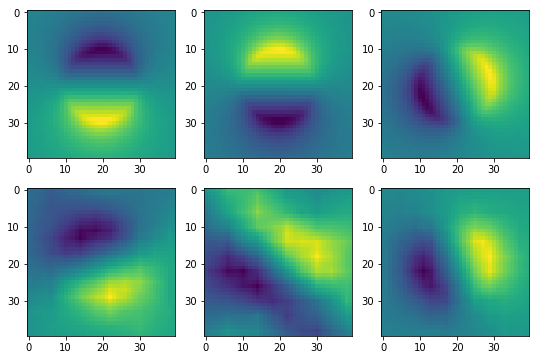

In [308]:
A=AZ_s
recon=t3
i=20
n=n_pad
f,axs=plt.subplots(nrows=2,ncols=3,figsize=(9,6))
axs[0,0].imshow(A[n+i,n:-n,n:-n])
axs[0,1].imshow(A[n:-n,n+i,n:-n])
axs[0,2].imshow(A[n:-n,n:-n,n+i])
axs[1,0].imshow(recon[n+i,n:-n,n:-n])
axs[1,1].imshow(recon[n:-n,n+i,n:-n])
axs[1,2].imshow(recon[n:-n,n:-n,n+i])


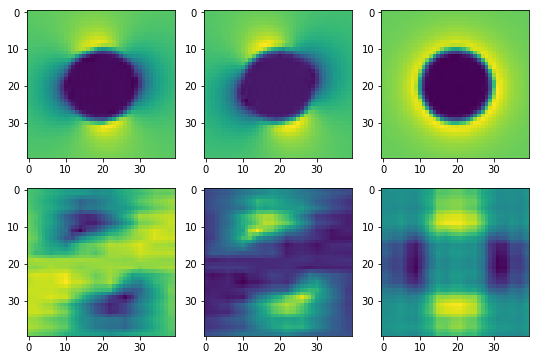

In [213]:
A=BZ_s
recon=b3
i=20
n=n_pad
f,axs=plt.subplots(nrows=2,ncols=3,figsize=(9,6))
axs[0,0].imshow(A[n+i,n:-n,n:-n])
axs[0,1].imshow(A[n:-n,n+i,n:-n])
axs[0,2].imshow(A[n:-n,n:-n,n+i])
axs[1,0].imshow(recon[n+i,n:-n,n:-n])
axs[1,1].imshow(recon[n:-n,n+i,n:-n])
axs[1,2].imshow(recon[n:-n,n:-n,n+i])


In [83]:
b1,b2,b3 = ma.calculate_B_from_A(t1,t2,t3,mesh_params=mesh_params)
b2=b2[::-1]
n=n_pad
a,b,c = ma.COD(b1[n:-n,n:-n,n:-n],BX_h[n:-n,n:-n,n:-n]),ma.COD(b2[n:-n,n:-n,n:-n],BY_h[n:-n,n:-n,n:-n]),ma.COD(b3[n:-n,n:-n,n:-n],BZ_h[n:-n,n:-n,n:-n])
print(np.mean([a,b,c]),a,b,c)

0.22846828895398086 0.14489735975098483 0.5040765249124348 0.03643098219852292


In [343]:
MX,MY,MZ=MX_h,MY_h,MZ_h
mesh_params=mesh_params_h
n_pad=44
nmaj=3
nmin=15
weight=2e-3
th1,th2=.2,.8
angles1 = generate_angles(mode='dual',n_tilt=61,alpha=90)
#angles1=np.array(angles1)
#angles1[:,0]=angles1[:,0]*-1
phis1 = generate_phase_data(MX,MY,MZ,angles1,mesh_params=mesh_params,n_pad=n_pad,unpad=False)
# angles2 = ma.generate_angles(mode='dual',n_tilt=30,alpha=90,beta=90,tilt2='beta')
# phis2 = ma.generate_phase_data(MX,MY,MZ,angles2,mesh_params=mesh_params,n_pad=n_pad,unpad=False)


fxc,fyc,fringe,rc,n,v,c = 576, 529, 10, 30, .02, .7, 2000
#phis = ma.noisy_phase(phis,holo=True,MX=MX,MY=MY,MZ=MZ,angles=angles,mesh_params=mesh_params,n_pad=44,fxc=fxc,fyc=fyc,fringe=fringe,rc=rc,n=n,v=v,c=c)

In [252]:
ma.plot_phases_interactive(phis1,np.array(angles1))

interactive(children=(IntSlider(value=14, description='i', max=29), Output()), _dom_classes=('widget-interact'…

In [103]:
# Calculate weightings for each tilt angle
ws = calculate_A_contributions(angles1,False,[1,1,1])

# In default run, threshold will initially be high (tmax)
tmin,tmax = .2,.8
# generate linearly spaced threshold list from low to high threshold for each nmaj
possible_ts = np.linspace(tmin,tmax,2-1)
thresh = tmax

# initialize new arrays
a_weighted_x = np.zeros_like(phis1)
a_weighted_y = np.zeros_like(phis1)
a_weighted_z = np.zeros_like(phis1)

# Generate A(0) tilt series
a_weighted_x, a_weighted_y, a_weighted_z = ma.update_weighted_proj_data(phis1,a_weighted_x,a_weighted_y,a_weighted_z,ws)


# do first step of reconstruction
# Ax_recon = recon_step(a_weighted_x,ws[:,0],angles,mesh_params,flip=flip,niter=n_step_iter,rev=rev,intrinsic2=intrinsic2,algorithm=algorithm,weight=weight,thresh=thresh, callback_freq =callback_freq) 
# Ay_recon = recon_step(a_weighted_y,ws[:,1],angles,mesh_params,flip=flip,niter=n_step_iter,rev=rev,intrinsic2=intrinsic2,algorithm=algorithm,weight=weight,thresh=thresh, callback_freq =callback_freq) 
# Az_recon = recon_step(a_weighted_z,ws[:,2],angles,mesh_params,flip=flip,niter=n_step_iter,rev=rev,intrinsic2=intrinsic2,algorithm=algorithm,weight=weight,thresh=thresh, callback_freq =callback_freq) 


In [27]:
def calculate_A_contributions(angles,intrinsic=True,flip=[1,1,1]):
    """ For a given tilt angle series [[-70,0,0], [-60,0,0],...]
    calculate the weighting that the x,y,z components of A will contribute
    to each phase image in the series """
    
    ws = []
    
    for i, a in enumerate(angles):
        # calculate rotation matrix
        mrot = ma.rotation_matrix(a[0],a[1],a[2],intrinsic=intrinsic)

        # Calculate position of x,y,z axes after rotation
        nx = np.dot(mrot,[1*flip[0],0,0])
        ny = np.dot(mrot,[0,1*flip[1],0])
        nz = np.dot(mrot,[0,0,1*flip[2]])
        
        #print(nx,ny,nz)

        # calculate how aligned the new x,y,z axes are with the beam direction
        # i.e. how much does this component contribute to the phase image?
        nx = np.dot(nx,[0,0,1])
        ny = np.dot(ny,[0,0,1])
        nz = np.dot(nz,[0,0,1])
        
        ws.append([nx,ny,nz])
    return np.array(ws)

In [ ]:
import astra
import multi_axis as ma
for intrinsic in [False]:
    for intrinsic2 in [False]:
        for rev in [1,-1]:
            for flip in [[1,1,1],[-1,-1,-1],[-1,1,1],[1,-1,1],[1,1,-1]]:
                for flip2 in [[1,1,1],[-1,-1,-1],[-1,1,1],[1,-1,1],[1,1,-1]]:
                    for trans in [(0,1,2),(0,2,1),(2,1,0),(1,2,0),(2,0,1),(1,0,2)]:
                        try:
                            import copy
                            ws = calculate_A_contributions(angles1,intrinsic,flip)

                            # In default run, threshold will initially be high (tmax)
                            tmin,tmax = .2,.3
                            # generate linearly spaced threshold list from low to high threshold for each nmaj
                            possible_ts = np.linspace(tmin,tmax,2-1)
                            thresh = tmax

                            # initialize new arrays
                            a_weighted_x = np.zeros_like(phis1)
                            a_weighted_y = np.zeros_like(phis1)
                            a_weighted_z = np.zeros_like(phis1)

                            # Generate A(0) tilt series
                            a_weighted_x, a_weighted_y, a_weighted_z = ma.update_weighted_proj_data(phis1,a_weighted_x,a_weighted_y,a_weighted_z,ws)

                            a_projs = copy.deepcopy(a_weighted_x)

                            p1,p2,nn=mesh_params
                            res=p2[0]/nn[0]
                            a_thresh = []
                            angles_thresh = []

                            # Threshold out data with low weighting
                            for i,w in enumerate(ws[:,0]):
                                if abs(w) > thresh:
                                    a_thresh.append(a_projs[:,i,:])
                                    angles_thresh.append(angles1[i])

                            angles_thresh=np.array(angles_thresh)
                            a_thresh = np.transpose(a_thresh,axes=[1,0,2]) # reshape so proj is middle column  

                            # Perform SIRT reconstruction on remaining data
                            vecs = generate_vectors(angles_thresh,intrinsic2,flip2)
                            recon = ma.generate_reconstruction(a_thresh,vecs, algorithm = 'wavelet_coif1', niter=5, weight = 2e-3)

                            # reformat to match structure of input data  
                            #recon = np.transpose(recon,axes=(1,2,0))[:,:,:]
                            recon = np.transpose(recon,axes=trans)[:,::-1*rev,:]

                            # Rescale intensities to account for pixel size
                            recon = recon/res

                            # Ensure astra doesn't fill up the RAM
                            astra.clear()

                            n=n_pad
                            print([intrinsic,intrinsic2,flip,flip2,rev,trans],ma.COD(recon[n:-n,n:-n,n:-n],AX_b[n:-n,n:-n,n:-n]))
                        except:
                            pass

..\multi_axis.py:2617: RuntimeWarning: divide by zero encountered in true_divide
  new_x = weight_phases(new_x,1/ws[:,0])
..\multi_axis.py:2620: RuntimeWarning: divide by zero encountered in true_divide
  new_y = weight_phases(new_y,1/ws[:,1])


[False, False, [1, 1, 1], [1, 1, 1], 1, (0, 1, 2)] 0.0010657715569100668
[False, False, [1, 1, 1], [1, 1, 1], 1, (0, 2, 1)] 0.01639054441560095
[False, False, [1, 1, 1], [1, 1, 1], 1, (2, 1, 0)] 0.00031915484129779736
[False, False, [1, 1, 1], [1, 1, 1], 1, (1, 2, 0)] 0.01550535937451919
[False, False, [1, 1, 1], [1, 1, 1], 1, (2, 0, 1)] 0.00015356951926278565
[False, False, [1, 1, 1], [1, 1, 1], 1, (1, 0, 2)] 0.00037130939219360073
[False, False, [1, 1, 1], [-1, -1, -1], 1, (0, 1, 2)] 0.0016381661931683666
[False, False, [1, 1, 1], [-1, -1, -1], 1, (0, 2, 1)] 0.017978611281833423
[False, False, [1, 1, 1], [-1, -1, -1], 1, (2, 1, 0)] 8.875342086434382e-05
[False, False, [1, 1, 1], [-1, -1, -1], 1, (1, 2, 0)] 0.02657692444371662
[False, False, [1, 1, 1], [-1, -1, -1], 1, (2, 0, 1)] 1.6617426694881055e-05
[False, False, [1, 1, 1], [-1, -1, -1], 1, (1, 0, 2)] 0.0025861029151032083
[False, False, [1, 1, 1], [-1, 1, 1], 1, (0, 1, 2)] 3.4436336653128e-05
[False, False, [1, 1, 1], [-1, 1, 1],

In [385]:
import astra
import copy
ws = calculate_A_contributions(angles1,False,[-1,1,1]) # -1 for s x, though maybe y,z too
#ws = calculate_A_contributions(angles1,False,[1,1,1])

# In default run, threshold will initially be high (tmax)
tmin,tmax = .2,.7
# generate linearly spaced threshold list from low to high threshold for each nmaj
possible_ts = np.linspace(tmin,tmax,2-1)
thresh = tmax

# initialize new arrays
a_weighted_x = np.zeros_like(phis1)
a_weighted_y = np.zeros_like(phis1)
a_weighted_z = np.zeros_like(phis1)

# Generate A(0) tilt series
a_weighted_x, a_weighted_y, a_weighted_z = ma.update_weighted_proj_data(phis1,a_weighted_x,a_weighted_y,a_weighted_z,ws)

a_projs = copy.deepcopy(a_weighted_x)

p1,p2,nn=mesh_params
res=p2[0]/nn[0]
a_thresh = []
angles_thresh = []

# Threshold out data with low weighting
for i,w in enumerate(ws[:,0]):
    if abs(w) > thresh:
        a_thresh.append(a_projs[:,i,:])
        angles_thresh.append(angles1[i])

angles_thresh=np.array(angles_thresh)
a_thresh = np.transpose(a_thresh,axes=[1,0,2]) # reshape so proj is middle column  

# Perform SIRT reconstruction on remaining data
vecs = generate_vectors(angles_thresh,True,[1,1,1]) # think it should be true actually
recon = ma.generate_reconstruction(a_thresh,vecs, algorithm = 'wavelet_coif1', niter=5, weight = 5e-3)

# reformat to match structure of input data  

x= True
if x == True:
    #recon = np.transpose(recon,axes=(1,0,2))[:,:,:]*-1 # perfect for s x
    #recon = np.transpose(recon,axes=(2,1,0))[:,::1,:]
    #recon = np.transpose(recon,axes=(1,2,0))[:,::-1,:] # perfect for h x
    recon = np.transpose(recon,axes=(1,0,2))[::-1,::-1,:]
    
else:
    recon = np.transpose(recon,axes=(2,1,0))[:,::-1,:] # perfect for s y, s z, h y, h z

# Rescale intensities to account for pixel size
recon = recon/res

# Ensure astra doesn't fill up the RAM
astra.clear()

n=n_pad
ma.COD(recon[n:-n,n:-n,n:-n],AX_h[n:-n,n:-n,n:-n])

0.00036758800170125575

(128, 16, 128)

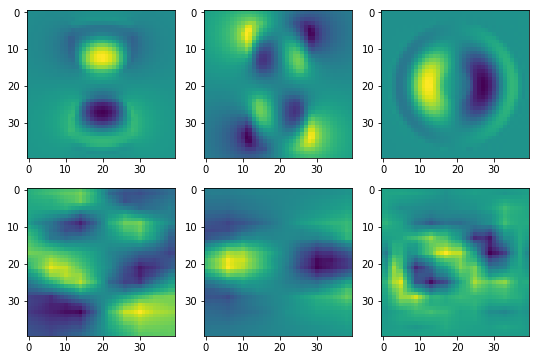

In [386]:
A=AX_h
i=20
n=n_pad
f,axs=plt.subplots(nrows=2,ncols=3,figsize=(9,6))
axs[0,0].imshow(A[n+i,n:-n,n:-n])
axs[0,1].imshow(A[n:-n,n+i,n:-n])
axs[0,2].imshow(A[n:-n,n:-n,n+i])
axs[1,0].imshow(recon[n+i,n:-n,n:-n])
axs[1,1].imshow(recon[n:-n,n+i,n:-n])
axs[1,2].imshow(recon[n:-n,n:-n,n+i])
np.shape(a_thresh)

In [340]:
ma.plot_phases_interactive(a_thresh,angles_thresh)

interactive(children=(IntSlider(value=13, description='i', max=27), Output()), _dom_classes=('widget-interact'…

In [342]:
ma.plot_phases_interactive(phis1,np.array(angles1))

interactive(children=(IntSlider(value=29, description='i', max=59), Output()), _dom_classes=('widget-interact'…

In [817]:
angles

[[-90.0, 0, 0],
 [-84.19354838709677, 0, 0],
 [-78.38709677419355, 0, 0],
 [-72.58064516129032, 0, 0],
 [-66.7741935483871, 0, 0],
 [-60.96774193548387, 0, 0],
 [-55.16129032258064, 0, 0],
 [-49.354838709677416, 0, 0],
 [-43.54838709677419, 0, 0],
 [-37.74193548387097, 0, 0],
 [-31.935483870967744, 0, 0],
 [-26.129032258064512, 0, 0],
 [-20.32258064516128, 0, 0],
 [-14.516129032258064, 0, 0],
 [-8.709677419354833, 0, 0],
 [-2.9032258064516157, 0, 0],
 [2.9032258064516157, 0, 0],
 [8.709677419354847, 0, 0],
 [14.516129032258064, 0, 0],
 [20.322580645161295, 0, 0],
 [26.129032258064512, 0, 0],
 [31.935483870967744, 0, 0],
 [37.741935483870975, 0, 0],
 [43.548387096774206, 0, 0],
 [49.35483870967744, 0, 0],
 [55.16129032258064, 0, 0],
 [60.96774193548387, 0, 0],
 [66.7741935483871, 0, 0],
 [72.58064516129033, 0, 0],
 [78.38709677419357, 0, 0],
 [84.19354838709677, 0, 0],
 [90.0, 0, 0],
 [0, -70.0, 0],
 [0, -65.48387096774194, 0],
 [0, -60.96774193548387, 0],
 [0, -56.45161290322581, 0],
 

In [1462]:
MX,MY,MZ = MX_s,MY_s,MZ_s
BX,BY,BZ = BX_s,BY_s,BZ_s
mesh_params=mesh_params_s
angles=ma.generate_angles(mode='dual',alpha=90,gamma=180,beta=90,tilt2='beta',n_tilt=40,dist_n2=8)
#angles=generate_angles(mode='sx-b',alpha=70,gamma=180,beta=70)

#phis = ma.generate_phase_data(MX,MY,MZ,angles,mesh_params,n_pad=n_pad)

# add noise if desired
#phis = ma.noisy_phase(phis,gaussian=True,misalign=True,lowpass=True,noise_level=np.pi/8,maxshift=1)

t1,t2,t3=ma.iterative_update_algorithm(phis,angles,mesh_params,n_pad,n_full_iter=2,n_step_iter=50, 
                               thresh_range=(.05,.85),algorithm='SIRT3D_CUDA',weight=0)
b1m,b2m,b3m = ma.calculate_B_from_A(t1,t2,t3,mesh_params=mesh_params)

codx = ma.COD(BX[n:-n,n:-n,n:-n],b1m[n:-n,n:-n,n:-n])
cody = ma.COD(BY[n:-n,n:-n,n:-n],b2m[n:-n,n:-n,n:-n])
codz = ma.COD(BZ[n:-n,n:-n,n:-n],b3m[n:-n,n:-n,n:-n])


print([codx,cody,codz])

[0.8603551170858879, 0.7913913039618627, 0.9589935111562795]


In [853]:
Ax_recon,Ay_recon,Az_recon=copy.deepcopy(t1),copy.deepcopy(t2),copy.deepcopy(t3)

In [410]:
ma.generate_angles(mode='sync',alpha=70,gamma=180,beta=70,tilt2='beta',n_tilt=20,dist_n2=8)
#generate_angles(mode='sx-b',alpha=70,gamma=180,beta=70)

[[-70.0, -70.0, 0],
 [-54.44444444444444, -54.44444444444444, 0],
 [-38.888888888888886, -38.888888888888886, 0],
 [-23.333333333333336, -23.333333333333336, 0],
 [-7.777777777777779, -7.777777777777779, 0],
 [7.7777777777777715, 7.7777777777777715, 0],
 [23.33333333333333, 23.33333333333333, 0],
 [38.888888888888886, 38.888888888888886, 0],
 [54.44444444444444, 54.44444444444444, 0],
 [70.0, 70.0, 0],
 [-70.0, 70.0, 0],
 [-54.44444444444444, 54.44444444444444, 0],
 [-38.888888888888886, 38.888888888888886, 0],
 [-23.333333333333336, 23.333333333333336, 0],
 [-7.777777777777779, 7.777777777777779, 0],
 [7.7777777777777715, -7.7777777777777715, 0],
 [23.33333333333333, -23.33333333333333, 0],
 [38.888888888888886, -38.888888888888886, 0],
 [54.44444444444444, -54.44444444444444, 0],
 [70.0, -70.0, 0]]

In [1880]:
def calculate_A_contributions(angles,intrinsic_ws=True,flip_ws=[1,1,1]):
    """ For a given tilt angle series [[-70,0,0], [-60,0,0],...]
    calculate the weighting that the x,y,z components of A will contribute
    to each phase image in the series """
    
    ws = []
    
    for i, a in enumerate(angles):
        # calculate rotation matrix
        mrot = rotation_matrix(a[0],a[1],a[2],intrinsic_ws)

        # Calculate position of x,y,z axes after rotation
        nx = np.dot(mrot,[1*flip_ws[0],0,0])
        ny = np.dot(mrot,[0,1*flip_ws[1],0])
        nz = np.dot(mrot,[0,0,1*flip_ws[2]])
        
        #print(nx)

        # calculate how aligned the new x,y,z axes are with the beam direction
        # i.e. how much does this component contribute to the phase image?
        nx = np.dot(nx,[0,0,1])
        ny = np.dot(ny,[0,0,1])
        nz = np.dot(nz,[0,0,1])
        
        ws.append([nx,ny,nz])
    return np.array(ws)

def weight_phases(projs,ws):
    """ For a specific projection component, and its set of weights,
    multiplies those weights through the projection data 
    # checked and this definitely returns new_ps in same orientation as phase_proj """
    new_ps = []
    for i,w in enumerate(ws):
        p = projs[:,i,:]
        new_p = p*w
        new_ps.append(new_p)
        
    new_ps = np.transpose(new_ps,axes=[1,0,2]) # reshape so proj is middle column
    
    return new_ps

def update_weighted_proj_data(phase_projs,a_weighted_x,a_weighted_y,a_weighted_z,ws):
    """ Given a set of phase projection data, and the current best guess for each component af A,
        returns a new set projection data for each component, which is the raw data after removing
        the contribution of the other 2 components and reweighting it back to unity """
    const = -np.pi/constants.codata.value('mag. flux quantum')/(2*np.pi)
    new_x = phase_projs*1/const - weight_phases(a_weighted_y,ws[:,1]) - weight_phases(a_weighted_z,ws[:,2])
    new_x = weight_phases(new_x,1/ws[:,0])

    new_y = phase_projs*1/const - weight_phases(a_weighted_x,ws[:,0]) - weight_phases(a_weighted_z,ws[:,2])
    new_y = weight_phases(new_y,1/ws[:,1])

    new_z = phase_projs*1/const - weight_phases(a_weighted_y,ws[:,1]) - weight_phases(a_weighted_x,ws[:,0])
    new_z = weight_phases(new_z,1/ws[:,2])
    
    return new_x,new_y,new_z

def recon_step(a_projs,ws,angles,mesh_params, thresh=0.706, algorithm = 'SIRT3D_CUDA', niter=40, weight = 0.001,
                            balance = 1, steps = 'backtrack', callback_freq = 0,intrinsic_astravec=False,x=False,gamma=False):
    """ Given a set of A-component projections along with their weights and angles, does a SIRT reconstruction on it.
    It will only use projections where the component accounted for >threshold % of the original data in that slice.
    
    Input: Tilt series for a component of A, with it's associated weightings, angles and mesh parameters
    Specify: The threshold for this roudn of nmaj (thresh) and the number of iterations (niter)
    Return: A 3D reconstruction of 1 component of A """
    
    # Initialise parameters
    p1,p2,nn=mesh_params
    res=p2[0]/nn[0]
    a_thresh = []
    angles_thresh = []
    
    # Threshold out data with low weighting
    for i,w in enumerate(ws):
        if abs(w) > thresh:
            a_thresh.append(a_projs[:,i,:])
            angles_thresh.append(angles[i])
            
    angles_thresh=np.array(angles_thresh)
    a_thresh = np.transpose(a_thresh,axes=[1,0,2]) # reshape so proj is middle column  

    # Perform SIRT reconstruction on remaining data
    
    vecs = generate_vectors(angles_thresh,intrinsic_astravec,gamma,x)
    if x==True:
        print(ws)

    recon = ma.generate_reconstruction(a_thresh,vecs, algorithm = algorithm, niter=niter, weight = weight,
                                balance = balance, steps = steps, callback_freq = callback_freq)
    
    # reformat to match structure of input data  
    recon = np.transpose(recon,axes=(2,1,0))[:,::-1,:]
    
    # Rescale intensities to account for pixel size
    recon = recon/res
    
    # Ensure astra doesn't fill up the RAM
    astra.clear()
    
    return recon

def iterative_update_algorithm(phase_projs,angles,mesh_params,n_pad,n_full_iter=1,n_step_iter=5, switch=False,intrinsic_ws=True,flip_ws=[1,1,1],gamma=False,
                               algorithm = 'SIRT3D_CUDA', weight = 0.001,thresh_range=(.01,.7),callback=False,intrinsic_astravec=False):
    """ Puts everything together for the multi-axis reconstruction procedure 
    Input: Phase tilt series, associated angles, mesh parameters, and pad count in pixels
    Specify: nmaj (n_full_iter), nmin (n_step_iter), and threshold range (tmin,tmax)
    Returns: Reconstructed Ax, Ay, Az arrays """
    
    if callback == True:
        callback_freq = 1
    else:
        callback_freq = 0
    
    # Calculate weightings for each tilt angle
    ws = calculate_A_contributions(angles,intrinsic_ws,flip_ws)
    
    # In default run, threshold will initially be high (tmax)
    tmin,tmax = thresh_range
    # generate linearly spaced threshold list from low to high threshold for each nmaj
    possible_ts = np.linspace(tmin,tmax,n_full_iter-1)
    thresh = tmax
    
    # initialize new arrays
    a_weighted_x = np.zeros_like(phase_projs)
    a_weighted_y = np.zeros_like(phase_projs)
    a_weighted_z = np.zeros_like(phase_projs)
    
    # Generate A(0) tilt series
    a_weighted_x, a_weighted_y, a_weighted_z = update_weighted_proj_data(phase_projs,a_weighted_x,a_weighted_y,a_weighted_z,ws)
    
    if callback == True:
        print("Initialised")
      
    # do first step of reconstruction
    Ax_recon = recon_step(a_weighted_x,ws[:,0],angles,mesh_params,x=True,intrinsic_astravec=intrinsic_astravec,gamma=gamma,niter=n_step_iter,algorithm=algorithm,weight=weight,thresh=thresh, callback_freq =callback_freq) 
    Ay_recon = recon_step(a_weighted_y,ws[:,1],angles,mesh_params,x=False,intrinsic_astravec=intrinsic_astravec,gamma=gamma,niter=n_step_iter,algorithm=algorithm,weight=weight,thresh=thresh, callback_freq =callback_freq) 
    Az_recon = recon_step(a_weighted_z,ws[:,2],angles,mesh_params,x=False,intrinsic_astravec=intrinsic_astravec,gamma=gamma,niter=n_step_iter,algorithm=algorithm,weight=weight,thresh=thresh, callback_freq =callback_freq) 
    
    if callback == True:
        print("Iteration 1 finished")
    
    # Cycle through iterations for nmaj>1
    for i in range(n_full_iter-1):
        
        # Repeat t=tmax for nmaj=2, then decrease t for subsequent iterations
        thresh = possible_ts[-(i+1)]
        # recalculate projection data
       
        # project current A to get A_p(n)
        n=n_pad
        a_weighted_x,a_weighted_y,a_weighted_z = generate_A_projection_fast(Ax_recon[n:-n,n:-n,n:-n],Ay_recon[n:-n,n:-n,n:-n],Az_recon[n:-n,n:-n,n:-n],angles,
                                                                            mesh_params=mesh_params,switch=switch,reorient=True,intrinsic_astravec=intrinsic_astravec,gamma=gamma)
        # a_weighted_x,a_weighted_y,a_weighted_z = ma.generate_A_projection(Ax_recon[n:-n,n:-n,n:-n],Ay_recon[n:-n,n:-n,n:-n],Az_recon[n:-n,n:-n,n:-n],angles,
        #                                                                     mesh_params=mesh_params,reorient=True)
        
        # Update to get A_p(n+1)
        a_weighted_x = np.pad(a_weighted_x,[(n_pad,n_pad),(0,0),(n_pad,n_pad)], mode='constant', constant_values=0)
        a_weighted_y = np.pad(a_weighted_y,[(n_pad,n_pad),(0,0),(n_pad,n_pad)], mode='constant', constant_values=0)
        a_weighted_z = np.pad(a_weighted_z,[(n_pad,n_pad),(0,0),(n_pad,n_pad)], mode='constant', constant_values=0)
        a_weighted_x, a_weighted_y, a_weighted_z = update_weighted_proj_data(phase_projs,a_weighted_x,a_weighted_y,a_weighted_z,ws)
        
        # SIRT reconstruct to get A(n+1)
        Ax_recon = recon_step(a_weighted_x,ws[:,0],angles,mesh_params,x=True,intrinsic_astravec=intrinsic_astravec,gamma=gamma,niter=n_step_iter,thresh=thresh,algorithm=algorithm,weight=weight, callback_freq =callback_freq) 
        Ay_recon = recon_step(a_weighted_y,ws[:,1],angles,mesh_params,x=False,intrinsic_astravec=intrinsic_astravec,gamma=gamma,niter=n_step_iter,thresh=thresh,algorithm=algorithm,weight=weight, callback_freq =callback_freq) 
        Az_recon = recon_step(a_weighted_z,ws[:,2],angles,mesh_params,x=False,intrinsic_astravec=intrinsic_astravec,gamma=gamma,niter=n_step_iter,thresh=thresh,algorithm=algorithm,weight=weight, callback_freq =callback_freq) 
        
        # ensure astra doesn't clog up the RAM
        astra.clear()
        
        if callback == True:
            print("Iteration ",i+2," finished")
    
    return Ax_recon,Ay_recon,Az_recon

def rotation_matrix(ax,ay,az,intrinsic=True):
    """ 
    Generate 3D rotation matrix from rotation angles ax,ay,az 
    about the x,y,z axes (given in degrees) 
    (Uses convention of rotating about z, then y, then x)
    """

    ax = ax * np.pi/180
    Cx = np.cos(ax)
    Sx = np.sin(ax)
    mrotx = np.array([[1,0,0],[0,Cx,-Sx],[0,Sx,Cx]])
    
    ay = ay * np.pi/180
    Cy = np.cos(ay)
    Sy = np.sin(ay)
    mroty = np.array([[Cy,0,Sy],[0,1,0],[-Sy,0,Cy]])
    
    az = az * np.pi/180
    Cz = np.cos(az)
    Sz = np.sin(az)
    mrotz = np.array([[Cz,-Sz,0],[Sz,Cz,0],[0,0,1]])
    
    if intrinsic == True:
        mrot = mrotz.dot(mroty).dot(mrotx)
    else:
        # To define mrot in an extrinsic space, matching
        # our desire for intrinsic rotation, we need
        # to swap the order of the applied rotations
        mrot = mrotx.dot(mroty).dot(mrotz)
    
    return mrot

def generate_vectors(angles,intrinsic_astravec,gamma=False,x=False,switch=False):
    """ Converts list of 3D projection angles into
    list of astra-compatible projection vectors,
    with [r,d,u,v] vectors on each row. """
    vectors = []
    for [ax,ay,az] in angles:
        vector = get_astravec(ax,ay,az,intrinsic_astravec,gamma,x,switch=switch)
        vectors.append(vector)
    
    return vectors

def get_astravec(ax,ay,az,intrinsic_astravec=False,gamma=False,x=False,switch=False):
    """ Given angles in degrees, return r,d,u,v as a concatenation
    of four 3-component vectors"""
    # Since we us flipud on y axis, ay needs reversing for desired behaviour
    
    ay = -ay 
    
    if gamma!=False:
        ax,az=ax,az#*gamma[0]
        ay=ay#*gamma[1]
        #az=ax#*gamma[2]     
  
        #ax,az=az,ax
    
    # centre of detector
    d = [0,0,0]
    
    # 3D rotation matrix - EXTRINSIC!
    mrot = np.array(rotation_matrix(ax,ay,az,intrinsic=intrinsic_astravec))
    
    # ray direction r
    r = mrot.dot([0,0,1])*-1 # -1 to match astra definitions
    # u (det +x)
    u = mrot.dot([1,0,0])
    # v (det +y)
    v = mrot.dot([0,1,0])
    
    if switch==True and abs(90-abs(az)) < 45:#abs(az)>45:
        x=True
    
    if gamma == True and x==True:
        u =  mrot.dot([0,1,0])
        v=mrot.dot([1,0,0])*-1


    return np.concatenate((r,d,u,v))

def generate_A_projection_fast(AX,AY,AZ,angles,mesh_params=None,unpad=False,reorient = True,intrinsic_astravec=False,gamma=gamma,switch=False):
    """ Returns A projections for given angles
    in order [x, i_tilt, y], using astra forward projector """
    
    # Define some astra-specific things
    # Fairly sure that these ones in mm don't matter for parallel geom
    distance_source_origin = 300  # [mm]
    distance_origin_detector = 100  # [mm]
    detector_pixel_size = 1.05  # [mm]
    detector_rows = AX.shape[0]  # Vertical size of detector [pixels].
    detector_cols = AX.shape[0]  # Horizontal size of detector [pixels].
    
    # Create astra vectors to describe angles
    # ang2=np.array(copy.deepcopy(angles))
    # angles=np.array(angles)
    # ang2[:,0]=angles[:,2]
    # ang2[:,2]=angles[:,0]
    
    angles=np.array(angles)
    
    vecs = generate_vectors(angles,intrinsic_astravec,gamma,False,switch)

    # AX
        # Create volume geometry
    vol_geom = astra.creators.create_vol_geom(detector_cols, detector_cols,
                                              detector_rows)
    
        # Reorient to match with old version
    AX = np.transpose(AX,[2,1,0])
    AX = AX[:,::-1,:]
    
        # Load data into astra
    phantom_idx = astra.data3d.create('-vol', vol_geom, data=AX)
    
        # Create projection geometry
    proj_geom = astra.create_proj_geom('parallel3d_vec', detector_rows, detector_cols, 
                                       np.array(vecs),(distance_source_origin + distance_origin_detector) /detector_pixel_size, 0)
        
        # Get forward projections
    projections_idx, projectionsx = astra.creators.create_sino3d_gpu(phantom_idx, proj_geom, vol_geom)
    
        # Clear astra memory
    astra.clear()
    
    # AY
    vol_geom = astra.creators.create_vol_geom(detector_cols, detector_cols,
                                              detector_rows)
    AY = np.transpose(AY,[2,1,0])
    AY = AY[:,::-1,:]
    phantom_idy = astra.data3d.create('-vol', vol_geom, data=AY)
    proj_geom = astra.create_proj_geom('parallel3d_vec', detector_rows, detector_cols, 
                                       np.array(vecs),(distance_source_origin + distance_origin_detector) /detector_pixel_size, 0)
    projections_idy, projectionsy = astra.creators.create_sino3d_gpu(phantom_idy, proj_geom, vol_geom)
    astra.clear()
    
    # AZ
    vol_geom = astra.creators.create_vol_geom(detector_cols, detector_cols,
                                              detector_rows)
    AZ = np.transpose(AZ,[2,1,0])
    AZ = AZ[:,::-1,:]
    phantom_idz = astra.data3d.create('-vol', vol_geom, data=AZ)
    proj_geom = astra.create_proj_geom('parallel3d_vec', detector_rows, detector_cols, 
                                       np.array(vecs),(distance_source_origin + distance_origin_detector) /detector_pixel_size, 0)
    projections_idz, projectionsz = astra.creators.create_sino3d_gpu(phantom_idz, proj_geom, vol_geom)
    astra.clear()
    
    # Scale correctly in line with previous version
    ax_projs = projectionsx*mesh_params[1][0]/mesh_params[2][0]
    ay_projs = projectionsy*mesh_params[1][0]/mesh_params[2][0]
    az_projs = projectionsz*mesh_params[1][0]/mesh_params[2][0]
    
    
    
    return np.array(ax_projs),np.array(ay_projs),np.array(az_projs)

In [1851]:
ma.plot_phases_interactive(phis)

interactive(children=(IntSlider(value=19, description='i', max=39), Output()), _dom_classes=('widget-interact'…

In [1882]:
angles

array([[-90.        ,   0.        , -90.        ],
       [-80.52631579,   0.        , -70.        ],
       [-71.05263158,   0.        , -50.        ],
       [-61.57894737,   0.        , -30.        ],
       [-52.10526316,   0.        , -10.        ],
       [-42.63157895,   0.        ,  10.        ],
       [-33.15789474,   0.        ,  30.        ],
       [-23.68421053,   0.        ,  50.        ],
       [-14.21052632,   0.        ,  70.        ],
       [ -4.73684211,   0.        ,  90.        ],
       [  4.73684211,   0.        ,  90.        ],
       [ 14.21052632,   0.        ,  70.        ],
       [ 23.68421053,   0.        ,  50.        ],
       [ 33.15789474,   0.        ,  30.        ],
       [ 42.63157895,   0.        ,  10.        ],
       [ 52.10526316,   0.        , -10.        ],
       [ 61.57894737,   0.        , -30.        ],
       [ 71.05263158,   0.        , -50.        ],
       [ 80.52631579,   0.        , -70.        ],
       [ 90.        ,   0.     

In [1881]:
from scipy import constants

MX,MY,MZ = MX_s,MY_s,MZ_s
BX,BY,BZ = BX_s,BY_s,BZ_s
mesh_params=mesh_params_s

#angles=generate_angles(mode='sx2-dual',alpha=90,gamma=180,beta=70,n_tilt=40)
#phis = generate_phase_data(MX,MY,MZ,angles,mesh_params,n_pad=n_pad,intrinsic_bulk=True,intrinsic_vector=True)

# add noise if desired
#phis = ma.noisy_phase(phis,gaussian=True,misalign=True,lowpass=True,noise_level=np.pi/8,maxshift=1)

# These settings 'almost' work with gamma dual
flip_ws = [1,1,1] # [-1,1,1] dual, [1,1,1] sx2 ?
intrinsic_astravec=False # True works at n=1
intrinsic_ws=False # needs to be false to make ws identical
gamma=True # True works for n=1
switch=False

# These settings seem to work with beta dual
# flip_ws = [1,1,1]
# intrinsic_astravec=True
# intrinsic_ws=True
angles=np.array(angles)
#angles[:,2]=angles[:,2]*-1
t1,t2,t3=iterative_update_algorithm(phis,angles,mesh_params,n_pad,n_full_iter=1,n_step_iter=20,switch=switch, flip_ws=flip_ws,gamma=gamma,
                               thresh_range=(.1,.1),algorithm='SIRT3D_CUDA',weight=0.0005,intrinsic_astravec=intrinsic_astravec,intrinsic_ws=intrinsic_ws)
b1m,b2m,b3m = ma.calculate_B_from_A(t1,t2,t3,mesh_params=mesh_params)

codx = ma.COD(BX[n:-n,n:-n,n:-n],b1m[n:-n,n:-n,n:-n])
cody = ma.COD(BY[n:-n,n:-n,n:-n],b2m[n:-n,n:-n,n:-n])
codz = ma.COD(BZ[n:-n,n:-n,n:-n],b3m[n:-n,n:-n,n:-n])


print([codx,cody,codz])

C:\Users\Sauron\anaconda3\envs\grl31-1\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in true_divide


[ 1.00000000e+00  9.26876438e-01  7.24538042e-01  4.39736876e-01
  1.37032811e-01 -1.17608711e-01 -2.73474079e-01 -3.07716548e-01
 -2.30680901e-01 -8.25793455e-02  8.25793455e-02  2.30680901e-01
  3.07716548e-01  2.73474079e-01  1.17608711e-01 -1.37032811e-01
 -4.39736876e-01 -7.24538042e-01 -9.26876438e-01 -1.00000000e+00
  0.00000000e+00 -3.37355434e-01 -6.07959604e-01 -7.61646611e-01
 -7.77151692e-01 -6.66992143e-01 -4.73670999e-01 -2.58204842e-01
 -8.39609815e-02 -1.01130531e-17  1.01130531e-17  8.39609815e-02
  2.58204842e-01  4.73670999e-01  6.66992143e-01  7.77151692e-01
  7.61646611e-01  6.07959604e-01  3.37355434e-01  0.00000000e+00]
[0.7209032867467933, 0.1389302202577989, 0.3204472119816728]


(128, 20, 128)

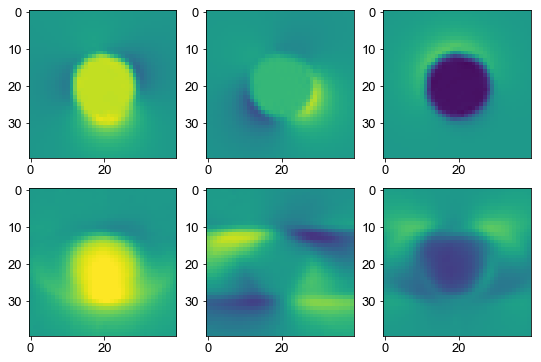

In [1883]:
i=15
n=n_pad
f,axs=plt.subplots(nrows=2,ncols=3,figsize=(9,6))
axs[0,0].imshow(BX_s[n:-n,n:-n,n+i],vmin=np.min([BX,BY,BZ]),vmax=np.max([BX,BY,BZ]))
axs[0,1].imshow(BY_s[n:-n,n:-n,n+i],vmin=np.min([BX,BY,BZ]),vmax=np.max([BX,BY,BZ]))
axs[0,2].imshow(BZ_s[n:-n,n:-n,n+i],vmin=np.min([BX,BY,BZ]),vmax=np.max([BX,BY,BZ]))
axs[1,0].imshow(b1m[n:-n,n:-n,n+i],vmin=np.min([BX,BY,BZ]),vmax=np.max([BX,BY,BZ]))
axs[1,1].imshow(b2m[n:-n,n:-n,n+i],vmin=np.min([BX,BY,BZ]),vmax=np.max([BX,BY,BZ]))
#axs[1,1].imshow(np.transpose(b2m,(1,0,2))[::-1,::-1][n:-n,n:-n,n+i],vmin=np.min([BX,BY,BZ]),vmax=np.max([BX,BY,BZ]))
axs[1,2].imshow(b3m[n:-n,n:-n,n+i],vmin=np.min([BX,BY,BZ]),vmax=np.max([BX,BY,BZ]))
np.shape(a_thresh)

[0.4548017355724632, 0.5510517269117408, 0.5994113318109875]


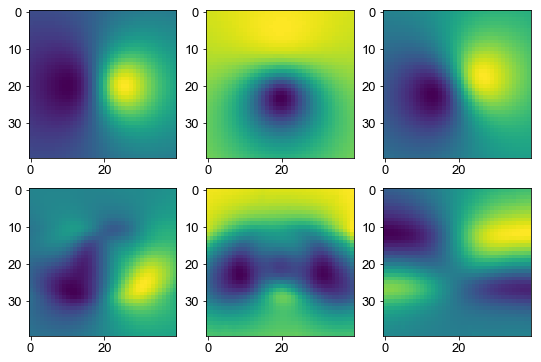

In [1884]:
i=30
n=n_pad
f,axs=plt.subplots(nrows=2,ncols=3,figsize=(9,6))
axs[0,0].imshow(AX_s[n:-n,n:-n,n+i])
axs[0,1].imshow(AY_s[n:-n,n:-n,n+i])
axs[0,2].imshow(AZ_s[n:-n,n:-n,n+i])
axs[1,0].imshow(t1[n:-n,n:-n,n+i])
axs[1,1].imshow(t2[n:-n,n:-n,n+i])
axs[1,2].imshow(t3[n:-n,n:-n,n+i])
np.shape(a_thresh)

codx = ma.COD(AX_s[n:-n,n:-n,n:-n],t1[n:-n,n:-n,n:-n])
cody = ma.COD(AY_s[n:-n,n:-n,n:-n],t2[n:-n,n:-n,n:-n])
codz = ma.COD(AZ_s[n:-n,n:-n,n:-n],t3[n:-n,n:-n,n:-n])


print([codx,cody,codz])

switch false
[0.4552739289424643, 0.5033988134900937, 0.0389876547062864]


switch true
[0.5214552957241381, 0.4345978588827535, 0.05455730910416379]


In [1298]:
for flip_ws in [[1,1,1],[-1,1,1],[1,1,-1],[-1,-1,-1]]:
    for intrinsic_astravec in [True,False]:
        for gamma in [True,False]:
            t1,t2,t3=iterative_update_algorithm(phis,angles,mesh_params,n_pad,n_full_iter=2,n_step_iter=30,switch=switch, flip_ws=flip_ws,gamma=gamma,
                                           thresh_range=(.2,.8),algorithm='wavelet_coif1',weight=0.0005,intrinsic_astravec=intrinsic_astravec,intrinsic_ws=intrinsic_ws)
            b1m,b2m,b3m = ma.calculate_B_from_A(t1,t2,t3,mesh_params=mesh_params)

            codx = ma.COD(BX[n:-n,n:-n,n:-n],b1m[n:-n,n:-n,n:-n])
            cody = ma.COD(BY[n:-n,n:-n,n:-n],b2m[n:-n,n:-n,n:-n])
            codz = ma.COD(BZ[n:-n,n:-n,n:-n],b3m[n:-n,n:-n,n:-n])


            print(flip_ws,intrinsic_astravec,intrinsic_ws,gamma,np.mean([codx,cody,codz]))

C:\Users\Sauron\anaconda3\envs\grl31-1\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in true_divide


[1, 1, 1] True False True 0.33255346571294814
[1, 1, 1] True False False 0.4103255095105001
[1, 1, 1] False False True 0.32913459228386727
[1, 1, 1] False False False 0.4575146479558567
[-1, 1, 1] True False True 0.341320940066634
[-1, 1, 1] True False False 0.4340435426877427
[-1, 1, 1] False False True 0.3494451160635436
[-1, 1, 1] False False False 0.4550488573291804
[1, 1, -1] True False True 0.32890066823114245
[1, 1, -1] True False False 0.29295750228054757
[1, 1, -1] False False True 0.25909979720960336
[1, 1, -1] False False False 0.24255480697837495
[-1, -1, -1] True False True 0.33255348140510094
[-1, -1, -1] True False False 0.41032548137171226
[-1, -1, -1] False False True 0.32913459132768247
[-1, -1, -1] False False False 0.45751465580541034


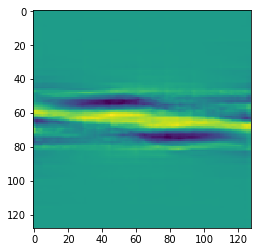

In [1221]:
plt.imshow(b3m[:,:,64])

having set az=-az
true true
[0.5133011659163209, 0.5025526110803789, 0.34921578808877385]

Checking on dual:

False False
[0.7150269763992902, 0.5281152521239143, 0.07384548879457853]

True True
[0.6530573762404543, 0.6389537894222173, 0.29381000049031414]

False True
[0.6530573762404543, 0.6389537894222173, 0.29381000049031414

Now with sx2-dual:
False False
[0.5738176171508123, 0.5578386302747482, 0.060339980665461646]

True True
[0.5273772388396516, 0.5331561666704978, 0.03921989220090438] - .3
[0.563439343805058, 0.4340275003392122, 2.6471051982005856e-05] - .8


False True
[0.5273772388396516, 0.5331561666704978, 0.03921989220090438]

True False
[0.5738176171508123, 0.5578386302747482, 0.060339980665461646]


In [1408]:
angles=generate_angles(mode='sx2-dual',alpha=90,gamma=180,beta=70,n_tilt=40)
#phis = ma.generate_phase_data(MX,MY,MZ,angles,mesh_params,n_pad=n_pad)

ma.plot_phases_interactive(phis,np.array(angles))

interactive(children=(IntSlider(value=19, description='i', max=39), Output()), _dom_classes=('widget-interact'…

In [1148]:
a=-90
abs(90-abs(a)) < 45

True

In [1201]:
angles=generate_angles(mode='sx2-dual',alpha=70,gamma=180,beta=70,n_tilt=24)

# true true matches with ma dual
phis = generate_phase_data(MX,MY,MZ,angles,mesh_params,n_pad=n_pad,intrinsic_bulk=True,intrinsic_vector=True)

ma.plot_phases_interactive(phis,np.array(angles))

interactive(children=(IntSlider(value=11, description='i', max=23), Output()), _dom_classes=('widget-interact'…

In [1199]:
def generate_phase_data(MX,MY,MZ,angles,mesh_params=None,n_pad=500,unpad=False,intrinsic_bulk=False,intrinsic_vector=True):
    """ Returns phase projections for given M and angles
    in order [x, i_tilt, y] """
    # Initialise parameters
    phase_projs = []
    if mesh_params == None:
        p1 = (0,0,0)
        s = np.shape(MX)
        p2 = (s[0],s[1],s[2])
        n = p2
        mesh_params = [p1,p2,n]
    
    # Loop through projection angles
    for i in range(len(angles)):
        ax,ay,az = angles[i]
        #az=-az
        #rotate M
        MXr,MYr,MZr = rotate_magnetisation(MX,MY,MZ,ax,ay,az,intrinsic_bulk=intrinsic_bulk,intrinsic_vector=intrinsic_vector)
        #calculate phase
        phase = ma.calculate_phase_M_2D(MXr,MYr,MZr,mesh_params=mesh_params,n_pad=n_pad,unpad=unpad)
        phase = np.flipud(phase.T)

        phase_projs.append(phase)            
    
    # Prepare projections for reconstruction
    phase_projs = np.transpose(phase_projs,axes=[1,0,2]) # reshape so proj is middle column
    phase_projs=phase_projs.astype(np.float32)
    return np.array(phase_projs)

def rotate_magnetisation(U,V,W,ax=0,ay=0,az=0,intrinsic_bulk=False,intrinsic_vector=True):
    """ 
    Takes 3D gridded magnetisation values as input
    and returns them after an intrinsic rotation ax,ay,az 
    about the x,y,z axes (given in degrees) 
    (Uses convention of rotating about z, then y, then x)
    """
    # Rotate the gridded locations of M values
    Ub = rotate_bulk(U,ax,ay,az,intrinsic_bulk)
    Vb = rotate_bulk(V,ax,ay,az,intrinsic_bulk)
    Wb = rotate_bulk(W,ax,ay,az,intrinsic_bulk)
    
    shape = np.shape(Ub)
    
    # Convert gridded values to vectors
    coor_flat = grid_to_coor(Ub,Vb,Wb)
    
    # Rotate vectors
    coor_flat_r = rotate_vector(coor_flat,ax,ay,az,intrinsic_vector)
    
    # Convert vectors back to gridded values
    Ur,Vr,Wr = coor_to_grid(coor_flat_r,shape=shape)
    
    # Set small values to 0
    # (In theory the magnitude of M in each cell should be Ms,
    #  so we can set magnitude lower than this to zero -
    #  typically python rounding errors lead to very small values,
    #  which it is useful to exclude here)
#    mag_max = (np.max(U)**2+np.max(V)**2+np.max(W)**2)**0.5
#    mag = (Ur**2+Vr**2+Wr**2)**.5
#     for M in [Ur,Vr,Wr]:
#         M[abs(M)<1e-5*mag_max] = 0
#         M[mag<.6*mag_max] = 0
    
    return Ur,Vr,Wr

def grid_to_coor(U,V,W):
    """ Convert gridded 3D data (3,n,n,n) into coordinates (n^3, 3) """
    coor_flat = []
    nx = np.shape(U)[0]
    ny = np.shape(U)[1]
    nz = np.shape(U)[2]
    for ix in range(nx):
        for iy in range(ny):
            for iz in range(nz):
                x = U[ix,iy,iz]
                y = V[ix,iy,iz]
                z = W[ix,iy,iz]
                coor_flat.append([x,y,z])
                
    return coor_flat

def coor_to_grid(coor_flat,shape=None):
    """ Convert coordinates (n^3, 3) into gridded 3D data (3,n,n,n) """
    if shape == None:
        n = int(np.round(np.shape(coor_flat)[0]**(1/3)))
        shape = (n,n,n)
    nx,ny,nz = shape
    
    x = np.take(coor_flat,0,axis=1)
    y = np.take(coor_flat,1,axis=1)
    z = np.take(coor_flat,2,axis=1)
    U = x.reshape((nx,ny,nz))
    V = y.reshape((nx,ny,nz))
    W = z.reshape((nx,ny,nz))

    return U, V, W

def rotate_vector(coor_flat,ax,ay,az,intrinsic_vector=True):
    """ Rotates vectors by specified angles ax,ay,az 
    about the x,y,z axes (given in degrees) """
    
    # Get rotation matrix
    mrot = rotation_matrix(ax,ay,az,intrinsic=intrinsic_vector)    

    coor_flat_r = np.zeros_like(coor_flat)
    
    # Apply rotation matrix to each M vector
    for i,M in enumerate(coor_flat):
        coor_flat_r[i] = mrot.dot(M)
    
    return coor_flat_r

def rotate_bulk(P,ax,ay,az,mode='ndimage',intrinsic_bulk=False):
    """ 
    Rotate magnetisation locations from rotation angles ax,ay,az 
    about the x,y,z axes (given in degrees) 
    
    Can use PIL or ndimage. ndimage def works but PIL faster (should work! currently doesn't handle -ve)
    
    NOTE: This implementation of scipy rotations is EXTRINSIC
    Therefore, to make it compatible with our intrinsic vector
    rotation, we swap the order of rotations (i.e. x then y then z)
    """
    # Due to indexing, ay needs reversing for desired behaviour
    if mode == 'PIL':
        nx,ny,nz = np.shape(P)
        Prot = np.zeros_like(P)
        ax,ay,az=ax,-ay,az
        scale = 256/np.max(P)
        for i in range(nx):
            im = Image.fromarray(P[i,:,:]*scale).convert('L')
            im = im.rotate(ax,resample = Image.BILINEAR)
            Prot[i,:,:] = np.array(im)/scale
        for j in range(ny):
            im = Image.fromarray(Prot[:,j,:]*scale).convert('L')
            im = im.rotate(ay,resample = Image.BILINEAR)
            Prot[:,j,:] = np.array(im)/scale
        for k in range(nz):
            im = Image.fromarray(Prot[:,:,k]*scale).convert('L')
            im = im.rotate(az,resample = Image.BILINEAR)
            Prot[:,:,k] = np.array(im)/scale
            
        return Prot
    
    else:
        ay = -ay
        
        if intrinsic_bulk == False:
            P = ndimage.rotate(P,ax,reshape=False,axes=(1,2),order=1)
            P = ndimage.rotate(P,ay,reshape=False,axes=(2,0),order=1)
            P = ndimage.rotate(P,az,reshape=False,axes=(0,1),order=1)
        else:
            P = ndimage.rotate(P,az,reshape=False,axes=(0,1),order=1)
            P = ndimage.rotate(P,ay,reshape=False,axes=(2,0),order=1)
            P = ndimage.rotate(P,ax,reshape=False,axes=(1,2),order=1)
        return P

In [1322]:
Ax_recon2,Ay_recon2,Az_recon2=copy.deepcopy(t1),copy.deepcopy(t2),copy.deepcopy(t3)

In [857]:
angles=ma.generate_angles(mode='dual',alpha=70,gamma=180,beta=70,tilt2='beta',n_tilt=60,dist_n2=8)
flip_ws = [1,1,1]
intrinsic_astravec=True
intrinsic_ws=True
gamma=False
a_weighted_x,a_weighted_y,a_weighted_z = generate_A_projection_fast(Ax_recon[n:-n,n:-n,n:-n],Ay_recon[n:-n,n:-n,n:-n],Az_recon[n:-n,n:-n,n:-n],angles,
                                                                            mesh_params=mesh_params,reorient=True,intrinsic_astravec=intrinsic_astravec,gamma=gamma)


In [1098]:
def generate_A_projection_fast(AX,AY,AZ,angles,mesh_params=None,unpad=False,reorient = True,intrinsic_astravec=False,gamma=gamma,switch=False):
    """ Returns A projections for given angles
    in order [x, i_tilt, y], using astra forward projector """
    
    # Define some astra-specific things
    # Fairly sure that these ones in mm don't matter for parallel geom
    distance_source_origin = 300  # [mm]
    distance_origin_detector = 100  # [mm]
    detector_pixel_size = 1.05  # [mm]
    detector_rows = AX.shape[0]  # Vertical size of detector [pixels].
    detector_cols = AX.shape[0]  # Horizontal size of detector [pixels].
    
    # Create astra vectors to describe angles
    # ang2=np.array(copy.deepcopy(angles))
    # angles=np.array(angles)
    # ang2[:,0]=angles[:,2]
    # ang2[:,2]=angles[:,0]
    
    angles=np.array(angles)
    
    vecs = generate_vectors(angles,intrinsic_astravec,gamma,False,switch)

    # AX
        # Create volume geometry
    vol_geom = astra.creators.create_vol_geom(detector_cols, detector_cols,
                                              detector_rows)
    
        # Reorient to match with old version
    AX = np.transpose(AX,[2,1,0])
    AX = AX[:,::-1,:]
    
        # Load data into astra
    phantom_idx = astra.data3d.create('-vol', vol_geom, data=AX)
    
        # Create projection geometry
    proj_geom = astra.create_proj_geom('parallel3d_vec', detector_rows, detector_cols, 
                                       np.array(vecs),(distance_source_origin + distance_origin_detector) /detector_pixel_size, 0)
        
        # Get forward projections
    projections_idx, projectionsx = astra.creators.create_sino3d_gpu(phantom_idx, proj_geom, vol_geom)
    
        # Clear astra memory
    astra.clear()
    
    # AY
    vol_geom = astra.creators.create_vol_geom(detector_cols, detector_cols,
                                              detector_rows)
    AY = np.transpose(AY,[2,1,0])
    AY = AY[:,::-1,:]
    phantom_idy = astra.data3d.create('-vol', vol_geom, data=AY)
    proj_geom = astra.create_proj_geom('parallel3d_vec', detector_rows, detector_cols, 
                                       np.array(vecs),(distance_source_origin + distance_origin_detector) /detector_pixel_size, 0)
    projections_idy, projectionsy = astra.creators.create_sino3d_gpu(phantom_idy, proj_geom, vol_geom)
    astra.clear()
    
    # AZ
    vol_geom = astra.creators.create_vol_geom(detector_cols, detector_cols,
                                              detector_rows)
    AZ = np.transpose(AZ,[2,1,0])
    AZ = AZ[:,::-1,:]
    phantom_idz = astra.data3d.create('-vol', vol_geom, data=AZ)
    proj_geom = astra.create_proj_geom('parallel3d_vec', detector_rows, detector_cols, 
                                       np.array(vecs),(distance_source_origin + distance_origin_detector) /detector_pixel_size, 0)
    projections_idz, projectionsz = astra.creators.create_sino3d_gpu(phantom_idz, proj_geom, vol_geom)
    astra.clear()
    
    # Scale correctly in line with previous version
    ax_projs = projectionsx*mesh_params[1][0]/mesh_params[2][0]
    ay_projs = projectionsy*mesh_params[1][0]/mesh_params[2][0]
    az_projs = projectionsz*mesh_params[1][0]/mesh_params[2][0]
    
    
    
    return np.array(ax_projs),np.array(ay_projs),np.array(az_projs)

def generate_vectors(angles,intrinsic_astravec,gamma=False,x=False,switch=False):
    """ Converts list of 3D projection angles into
    list of astra-compatible projection vectors,
    with [r,d,u,v] vectors on each row. """
    vectors = []
    for [ax,ay,az] in angles:
        vector = get_astravec(ax,ay,az,intrinsic_astravec,gamma,x,switch=switch)
        vectors.append(vector)
    
    return vectors

def get_astravec(ax,ay,az,intrinsic_astravec=False,gamma=False,x=False,switch=False):
    """ Given angles in degrees, return r,d,u,v as a concatenation
    of four 3-component vectors"""
    # Since we us flipud on y axis, ay needs reversing for desired behaviour
    
    ay = -ay 
    
    if gamma==True:
        ax=ax
        ay=ay
        az=-az
        #ax,az=az,ax
    
    # centre of detector
    d = [0,0,0]
    
    # 3D rotation matrix - EXTRINSIC!
    mrot = np.array(rotation_matrix(ax,ay,az,intrinsic=intrinsic_astravec))
    
    # ray direction r
    r = mrot.dot([0,0,1])*-1 # -1 to match astra definitions
    # u (det +x)
    u = mrot.dot([1,0,0])
    # v (det +y)
    v = mrot.dot([0,1,0])
    
    if switch==True and abs(az)>45:
        x=True
    
    if gamma == True and x==True:
        u =  mrot.dot([0,1,0])
        v=mrot.dot([1,0,0])*-1

    return np.concatenate((r,d,u,v))

In [1257]:
angles=generate_angles(mode='sx2-dual',alpha=90,gamma=180,beta=70,n_tilt=20)

flip_ws = [1,1,1,]#[-1,1,1]
intrinsic_astravec=False
intrinsic_ws=False # needs to be false to make ws identical
gamma=True
switch=True
a_weighted_x,a_weighted_y,a_weighted_z = generate_A_projection_fast(AX_h[n:-n,n:-n,n:-n],AY_h[n:-n,n:-n,n:-n],AZ_h[n:-n,n:-n,n:-n],angles,
                                                                            mesh_params=mesh_params,switch=switch,reorient=True,intrinsic_astravec=intrinsic_astravec,gamma=gamma)

In [1307]:
angles=generate_angles(mode='sx2-dual',alpha=90,gamma=180,beta=70,n_tilt=40)

flip_ws = [-1,1,1,]#[-1,1,1]
intrinsic_astravec=True
intrinsic_ws=False # needs to be false to make ws identical
gamma=True
switch=False
a_weighted_x2,a_weighted_y2,a_weighted_z2 = generate_A_projection_fast(Ax_recon2[n:-n,n:-n,n:-n],Ay_recon2[n:-n,n:-n,n:-n],Az_recon2[n:-n,n:-n,n:-n],angles,
                                                                            mesh_params=mesh_params,switch=switch,reorient=True,intrinsic_astravec=intrinsic_astravec,gamma=gamma)

ws=calculate_A_contributions(angles,intrinsic_ws=False,flip_ws=[1,1,1])
a_weighted_x2 = np.pad(a_weighted_x2,[(n_pad,n_pad),(0,0),(n_pad,n_pad)], mode='constant', constant_values=0)
a_weighted_y2 = np.pad(a_weighted_y2,[(n_pad,n_pad),(0,0),(n_pad,n_pad)], mode='constant', constant_values=0)
a_weighted_z2 = np.pad(a_weighted_z2,[(n_pad,n_pad),(0,0),(n_pad,n_pad)], mode='constant', constant_values=0)

a_weighted_x2, a_weighted_y2, a_weighted_z2 = update_weighted_proj_data(phis,a_weighted_x2,a_weighted_y2,a_weighted_z2,ws)

n_step_iter=30
thresh=0.005
algorithm='wavelet_coif1'
callback_freq=0
Ax_recon = recon_step(a_weighted_x2,ws[:,0],angles,mesh_params,x=True,intrinsic_astravec=intrinsic_astravec,gamma=gamma,niter=n_step_iter,thresh=thresh,algorithm=algorithm,weight=weight, callback_freq =callback_freq) 
Ay_recon = recon_step(a_weighted_y2,ws[:,1],angles,mesh_params,x=False,intrinsic_astravec=intrinsic_astravec,gamma=gamma,niter=n_step_iter,thresh=thresh,algorithm=algorithm,weight=weight, callback_freq =callback_freq) 
Az_recon = recon_step(a_weighted_z2,ws[:,2],angles,mesh_params,x=False,intrinsic_astravec=intrinsic_astravec,gamma=gamma,niter=n_step_iter,thresh=thresh,algorithm=algorithm,weight=weight, callback_freq =callback_freq) 
      

C:\Users\Sauron\anaconda3\envs\grl31-1\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in true_divide


In [1366]:
codx = ma.COD(AX_h[n:-n,n:-n,n:-n],Ax_recon2[n:-n,n:-n,n:-n])
cody = ma.COD(AY_h[n:-n,n:-n,n:-n],Ay_recon2[::-1][n:-n,n:-n,n:-n])
codz = ma.COD(AZ_h[n:-n,n:-n,n:-n],Az_recon2[n:-n,n:-n,n:-n])


print([codx,cody,codz])

[0.17007295480750972, 0.1622142724703659, 0.8996898601924528]


(128, 20, 128)

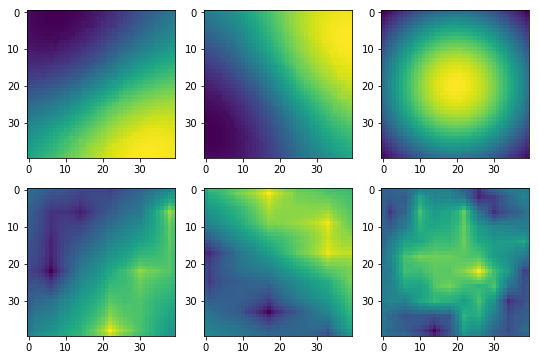

In [1361]:
i=64
n=n_pad
f,axs=plt.subplots(nrows=2,ncols=3,figsize=(9,6))
axs[0,0].imshow(AX_h[n:-n,n:-n,n+i])
axs[0,1].imshow(AY_h[n:-n,n:-n,n+i])
axs[0,2].imshow(AZ_h[n:-n,n:-n,n+i])
axs[1,0].imshow(Ax_recon2[::1,::-1,::-1][n:-n,n:-n,n+i])
axs[1,1].imshow(Ay_recon2[::-1][n:-n,n:-n,n+i])
axs[1,2].imshow(Az_recon2[::1,::-1,::-1][n:-n,n:-n,n+i]*-1)
np.shape(a_thresh)

In [1362]:
b1m,b2m,b3m = ma.calculate_B_from_A(t1[::1,::-1,::-1],t2[::-1],t3*-1,mesh_params=mesh_params)

codx = ma.COD(BX[n:-n,n:-n,n:-n],b1m[n:-n,n:-n,n:-n])
cody = ma.COD(BY[n:-n,n:-n,n:-n],b2m[n:-n,n:-n,n:-n])
codz = ma.COD(BZ[n:-n,n:-n,n:-n],b3m[n:-n,n:-n,n:-n])


print([codx,cody,codz])

[0.5973785334632886, 0.6042435678402605, 0.32462030481929105]


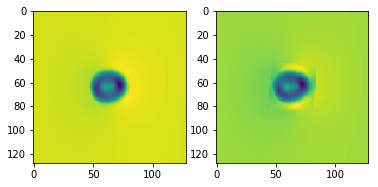

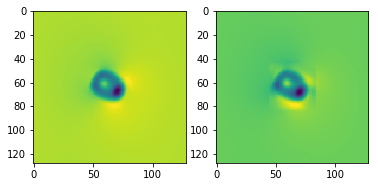

In [1297]:
f,axs=plt.subplots(ncols=2,figsize=(6,4))
i=14
axs[0].imshow(phis[:,i])
axs[1].imshow((a_weighted_x2[:,i]*ws[i,0]+a_weighted_y2[:,i]*ws[i,1]+a_weighted_z2[:,i]*ws[i,2])*-1)
plt.show()

f,axs=plt.subplots(ncols=2,figsize=(6,4))
i=16
axs[0].imshow(phis[:,i])
axs[1].imshow((a_weighted_x2[:,i]*ws[i,0]+a_weighted_y2[:,i]*ws[i,1]+a_weighted_z2[:,i]*ws[i,2])*-1)
plt.show()

[23.68421052631578, 0, 50.0]

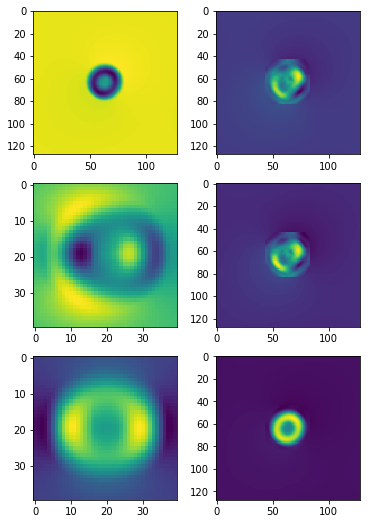

In [1264]:
f,axs=plt.subplots(ncols=2,nrows=3,figsize=(6,9))
i=12
axs[0,0].imshow(phis[:,i])
axs[0,1].imshow(a_weighted_x2[:,i])

axs[1,0].imshow(a_weighted_y[:,i])
axs[1,1].imshow(a_weighted_y2[:,i])

axs[2,0].imshow(a_weighted_z[:,i])
axs[2,1].imshow(a_weighted_z2[:,i])
angles[i]

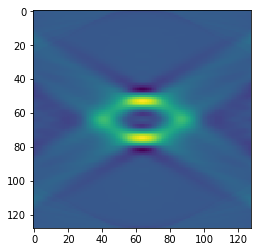

0.9718168545940422

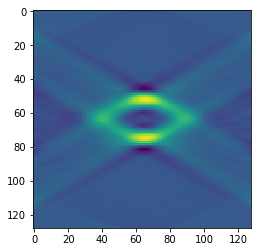

In [1041]:
plt.imshow(Az_recon[:,64])
plt.show()
plt.imshow(Az_recon2[:,64])
ma.COD(Az_recon[n:-n,n:-n,n:-n],Az_recon2[n:-n,n:-n,n:-n])

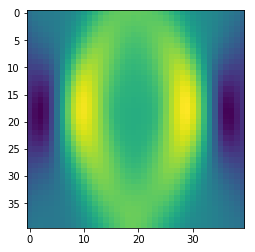

In [850]:
plt.imshow(a_weighted_z[:,0])

In [ ]:
[0.9076047314831079, 0.8368295745801255, 0.47710024160881304]

In [788]:
print(np.mean([codx,cody,codz]))

0.7136536890786509


In [750]:
codx = ma.COD(AX_h[n:-n,n:-n,n:-n],t1[n:-n,n:-n,n:-n])
cody = ma.COD(AY_h[n:-n,n:-n,n:-n],t2[n:-n,n:-n,n:-n])
codz = ma.COD(AZ_h[n:-n,n:-n,n:-n],t3[n:-n,n:-n,n:-n])
print([codx,cody,codz])

[0.014676994398033827, 0.4459011285207204, 0.7791574418951122]


(128, 16, 128)

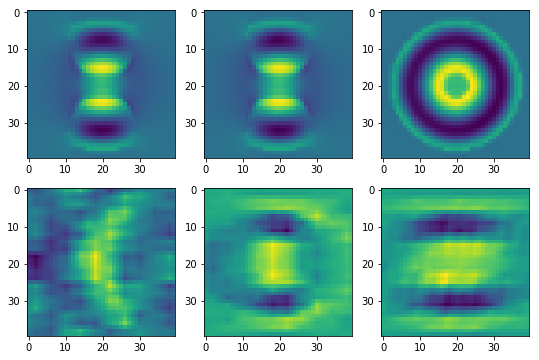

In [468]:
A=BZ_h
recon=b3m
i=20
n=n_pad
f,axs=plt.subplots(nrows=2,ncols=3,figsize=(9,6))
axs[0,0].imshow(A[n+i,n:-n,n:-n])
axs[0,1].imshow(A[n:-n,n+i,n:-n])
axs[0,2].imshow(A[n:-n,n:-n,n+i])
axs[1,0].imshow(recon[n+i,n:-n,n:-n])
axs[1,1].imshow(recon[n:-n,n+i,n:-n])
axs[1,2].imshow(recon[n:-n,n:-n,n+i])
np.shape(a_thresh)

In [497]:
phase_projs = copy.deepcopy(phis)

In [758]:
angles=ma.generate_angles(mode='dual',alpha=70,gamma=180,beta=70,tilt2='beta',n_tilt=20,dist_n2=8)
ws=ma.calculate_A_contributions(angles)
thresh=.3

# initialize new arrays
a_weighted_x = np.zeros_like(phase_projs)
a_weighted_y = np.zeros_like(phase_projs)
a_weighted_z = np.zeros_like(phase_projs)

# Generate A(0) tilt series
a_weighted_x, a_weighted_y, a_weighted_z = update_weighted_proj_data(phase_projs,a_weighted_x,a_weighted_y,a_weighted_z,ws)

all_projs=[a_weighted_x, a_weighted_y, a_weighted_z]
all_ws = [ws[:,0],ws[:,1],ws[:,2]]
all_thresh=[]
all_angles=[]
all_vecs = []
for j,wws in enumerate(all_ws):
    a_projs= all_projs[j]
    a_thresh = []
    angles_thresh = []

    # Threshold out data with low weighting
    for i,w in enumerate(wws):
        if abs(w) > thresh:
            a_thresh.append(a_projs[:,i,:])
            angles_thresh.append(angles[i])

    angles_thresh=np.array(angles_thresh)
    a_thresh = np.transpose(a_thresh,axes=[1,0,2])
    all_thresh.append(a_thresh)
    all_angles.append(angles_thresh)
    vecs = generate_vectors(angles_thresh,True)
    all_vecs.append(vecs)

C:\Users\Sauron\anaconda3\envs\grl31-1\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Sauron\anaconda3\envs\grl31-1\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in true_divide


In [769]:
angles=generate_angles(mode='dual',alpha=70,gamma=180,beta=70,n_tilt=20)
ws=calculate_A_contributions(angles,intrinsic_ws=False,flip_ws=[-1,1,1])
thresh=.3
# for i,w in enumerate(ws[:,2]):
#     if abs(w) > thresh:
#         print(w)

a_weighted_x2 = np.zeros_like(phase_projs)
a_weighted_y2 = np.zeros_like(phase_projs)
a_weighted_z2 = np.zeros_like(phase_projs)

# Generate A(0) tilt series
a_weighted_x2, a_weighted_y2, a_weighted_z2 = update_weighted_proj_data(phase_projs,a_weighted_x2,a_weighted_y2,a_weighted_z2,ws)

all_projs=[a_weighted_x2, a_weighted_y2, a_weighted_z2]
all_ws = [ws[:,0],ws[:,1],ws[:,2]]
all_thresh2=[]
all_angles2 = []
all_vecs2=[]

for j,wws in enumerate(all_ws):
    x=False
    if j==0:
        x=True
    a_projs= all_projs[j]
    a_thresh = []
    angles_thresh = []

    # Threshold out data with low weighting
    for i,w in enumerate(wws):
        if abs(w) > thresh:
            a_thresh.append(a_projs[:,i,:])
            angles_thresh.append(angles[i])

    angles_thresh=np.array(angles_thresh)
    a_thresh = np.transpose(a_thresh,axes=[1,0,2])
    all_thresh2.append(a_thresh)
    all_angles2.append(angles_thresh)
    vecs = generate_vectors(angles_thresh,True,True,x)
    all_vecs2.append(vecs)

C:\Users\Sauron\anaconda3\envs\grl31-1\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in true_divide


In [837]:
ma.COD(vecs,vecs2)

1.0

In [1081]:
angles=ma.generate_angles(mode='dual',alpha=90,gamma=180,beta=90,tilt2='beta',n_tilt=60,dist_n2=8)
vecs = ma.generate_vectors(angles)

j=0
k=55
for i in range(4):
    print('%.2f\t, %.2f\t, %.2f\t'%(vecs[k][i*3:i*3+3][0],vecs[k][i*3:i*3+3][1],vecs[k][i*3:i*3+3][2]))
    print('\n')

0.91	, -0.00	, -0.42	


0.00	, 0.00	, 0.00	


0.42	, 0.00	, 0.91	


0.00	, 1.00	, 0.00	




In [1083]:
angles=generate_angles(mode='dual',alpha=90,gamma=180,beta=70,n_tilt=60)
vecs2 = generate_vectors(angles,True,True,True)
j=0
k=55
for i in range(4):
    print('%.2f\t, %.2f\t, %.2f\t'%(vecs2[k][i*3:i*3+3][0],vecs2[k][i*3:i*3+3][1],vecs2[k][i*3:i*3+3][2]))
    print('\n')

0.91	, 0.00	, -0.42	


0.00	, 0.00	, 0.00	


0.42	, 0.00	, 0.91	


-0.00	, 1.00	, -0.00	




In [759]:
j=0
k=0
for i in range(4):
    print('%.2f\t, %.2f\t, %.2f\t'%(all_vecs[j][k][i*3:i*3+3][0],all_vecs[j][k][i*3:i*3+3][1],all_vecs[j][k][i*3:i*3+3][2]))
print('\n')
j=1
for i in range(4):
    print('%.2f\t, %.2f\t, %.2f\t'%(all_vecs[j][k][i*3:i*3+3][0],all_vecs[j][k][i*3:i*3+3][1],all_vecs[j][k][i*3:i*3+3][2]))
print('\n')  
j=2
for i in range(4):
    print('%.2f\t, %.2f\t, %.2f\t'%(all_vecs[j][k][i*3:i*3+3][0],all_vecs[j][k][i*3:i*3+3][1],all_vecs[j][k][i*3:i*3+3][2]))

-0.94	, -0.00	, -0.34	
0.00	, 0.00	, 0.00	
0.34	, 0.00	, -0.94	
0.00	, 1.00	, 0.00	


-0.00	, -0.94	, -0.34	
0.00	, 0.00	, 0.00	
1.00	, 0.00	, 0.00	
0.00	, 0.34	, -0.94	


-0.00	, -0.94	, -0.34	
0.00	, 0.00	, 0.00	
1.00	, 0.00	, 0.00	
0.00	, 0.34	, -0.94	


In [770]:
j=0
k=0
for i in range(4):
    print('%.2f\t, %.2f\t, %.2f\t'%(all_vecs2[j][k][i*3:i*3+3][0],all_vecs2[j][k][i*3:i*3+3][1],all_vecs2[j][k][i*3:i*3+3][2]))
print('\n')
j=1
for i in range(4):
    print('%.2f\t, %.2f\t, %.2f\t'%(all_vecs2[j][k][i*3:i*3+3][0],all_vecs2[j][k][i*3:i*3+3][1],all_vecs2[j][k][i*3:i*3+3][2]))
print('\n')
j=2
for i in range(4):
    print('%.2f\t, %.2f\t, %.2f\t'%(all_vecs2[j][k][i*3:i*3+3][0],all_vecs2[j][k][i*3:i*3+3][1],all_vecs2[j][k][i*3:i*3+3][2]))

-0.94	, -0.00	, -0.34	
0.00	, 0.00	, 0.00	
0.34	, 0.00	, -0.94	
-0.00	, 1.00	, -0.00	


-0.00	, -0.94	, -0.34	
0.00	, 0.00	, 0.00	
1.00	, 0.00	, 0.00	
0.00	, 0.34	, -0.94	


-0.00	, -0.94	, -0.34	
0.00	, 0.00	, 0.00	
1.00	, 0.00	, 0.00	
0.00	, 0.34	, -0.94	


In [771]:
def generate_vectors(angles,intrinsic_astravec,gamma=False,x=False):
    """ Converts list of 3D projection angles into
    list of astra-compatible projection vectors,
    with [r,d,u,v] vectors on each row. """
    vectors = []
    for [ax,ay,az] in angles:
        vector = get_astravec(ax,ay,az,intrinsic_astravec,gamma,x)
        vectors.append(vector)
    
    return vectors

def get_astravec(ax,ay,az,intrinsic_astravec=False,gamma=False,x=False):
    """ Given angles in degrees, return r,d,u,v as a concatenation
    of four 3-component vectors"""
    # Since we us flipud on y axis, ay needs reversing for desired behaviour
    
    ay = -ay 
    
    if gamma==True:
        ax=ax
        ay=ay
        az=-az
        #ax,az=az,ax
    
    # centre of detector
    d = [0,0,0]
    
    # 3D rotation matrix - EXTRINSIC!
    mrot = np.array(rotation_matrix(ax,ay,az,intrinsic=intrinsic_astravec))
    
    # ray direction r
    r = mrot.dot([0,0,1])*-1 # -1 to match astra definitions
    # u (det +x)
    u = mrot.dot([1,0,0])
    # v (det +y)
    v = mrot.dot([0,1,0])
    
    if gamma == True and x==True:
        u =  mrot.dot([0,1,0])
        v=mrot.dot([1,0,0])*-1

    return np.concatenate((r,d,u,v))

inf


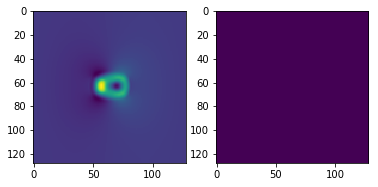

inf


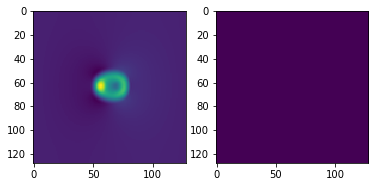

inf


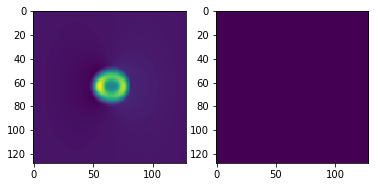

inf


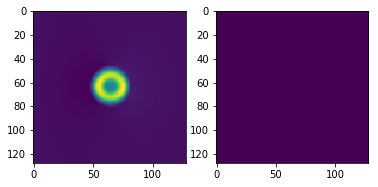

inf


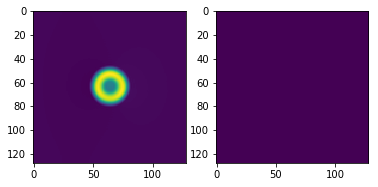

inf


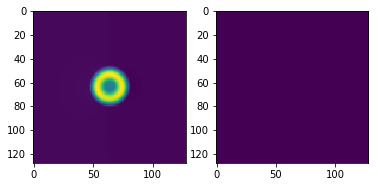

inf


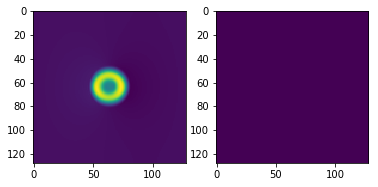

inf


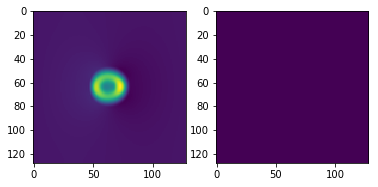

inf


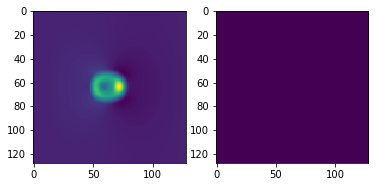

inf


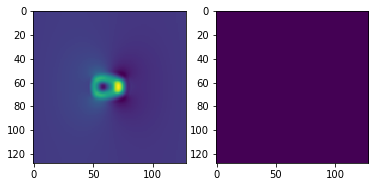

inf


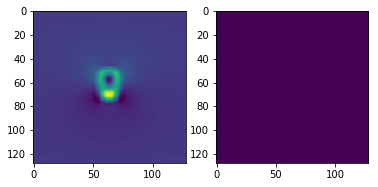

inf


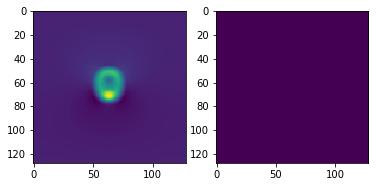

inf


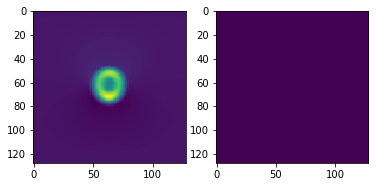

inf


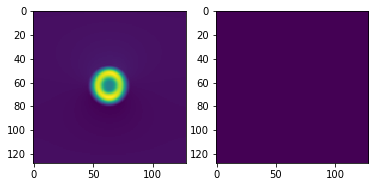

inf


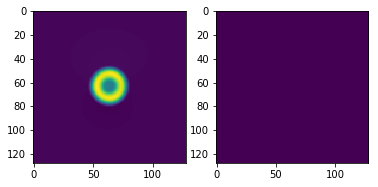

inf


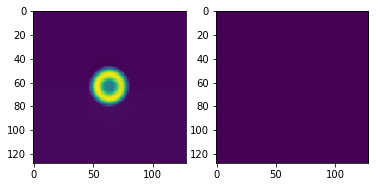

inf


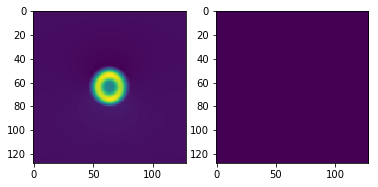

inf


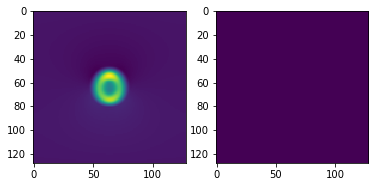

inf


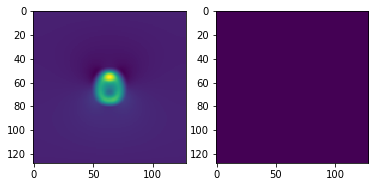

inf


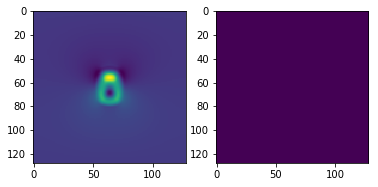

20 20


In [552]:
j=2
for i in range(np.shape(all_thresh[j])[1]):
    f,axs=plt.subplots(ncols=2)
    axs[0].imshow(all_thresh[j][:,i])
    axs[1].imshow(all_thresh2[j][:,i]-all_thresh[j][:,i])
    print(ma.COD(all_thresh[j][:,i],all_thresh2[j][:,i]))
    plt.show()
    
print(np.shape(all_thresh[j])[1],np.shape(all_thresh2[j])[1])

In [536]:
# ws are exactly identical
# a_thresh are exactly identical
# thresholded angles obviously not identical but certainly equivalent


(128, 8, 128)

In [1667]:
MX,MY,MZ = MX_s,MY_s,MZ_s
BX,BY,BZ = BX_s,BY_s,BZ_s
mesh_params=mesh_params_s
angles=ma.generate_angles(mode='sync',alpha=90,gamma=180,beta=90,tilt2='beta',n_tilt=40,dist_n2=8)
#angles=generate_angles(mode='sx-b',alpha=70,gamma=180,beta=70)

phis = ma.generate_phase_data(MX,MY,MZ,angles,mesh_params,n_pad=n_pad)

# add noise if desired
#phis = ma.noisy_phase(phis,gaussian=True,misalign=True,lowpass=True,noise_level=np.pi/8,maxshift=1)



In [1700]:
t1,t2,t3=iterative_update_algorithm(phis,angles,mesh_params,n_pad,n_full_iter=2,n_step_iter=50, 
                               thresh_range=(.2,.3),algorithm='SIRT3D_CUDA',weight=0,intrinsic_astravec=False,intrinsic_ws=False)
b1m,b2m,b3m = ma.calculate_B_from_A(t1,t2,t3,mesh_params=mesh_params)

codx = ma.COD(BX[n:-n,n:-n,n:-n],b1m[n:-n,n:-n,n:-n])
cody = ma.COD(BY[n:-n,n:-n,n:-n],b2m[n:-n,n:-n,n:-n])
codz = ma.COD(BZ[n:-n,n:-n,n:-n],b3m[n:-n,n:-n,n:-n])


print([codx,cody,codz])

[ 6.12323400e-17  1.62349735e-01  3.07106356e-01  4.18583239e-01
  4.84700133e-01  4.98292247e-01  4.57886663e-01  3.67861955e-01
  2.37973697e-01  8.22972951e-02 -8.22972951e-02 -2.37973697e-01
 -3.67861955e-01 -4.57886663e-01 -4.98292247e-01 -4.84700133e-01
 -4.18583239e-01 -3.07106356e-01 -1.62349735e-01 -6.12323400e-17
 -6.12323400e-17 -1.62349735e-01 -3.07106356e-01 -4.18583239e-01
 -4.84700133e-01 -4.98292247e-01 -4.57886663e-01 -3.67861955e-01
 -2.37973697e-01 -8.22972951e-02  8.22972951e-02  2.37973697e-01
  3.67861955e-01  4.57886663e-01  4.98292247e-01  4.84700133e-01
  4.18583239e-01  3.07106356e-01  1.62349735e-01  6.12323400e-17]
[ 6.12323400e-17  1.62349735e-01  3.07106356e-01  4.18583239e-01
  4.84700133e-01  4.98292247e-01  4.57886663e-01  3.67861955e-01
  2.37973697e-01  8.22972951e-02 -8.22972951e-02 -2.37973697e-01
 -3.67861955e-01 -4.57886663e-01 -4.98292247e-01 -4.84700133e-01
 -4.18583239e-01 -3.07106356e-01 -1.62349735e-01 -6.12323400e-17
 -6.12323400e-17 -1.6234

In [1685]:
def generate_A_projection_fast(AX,AY,AZ,angles,mesh_params=None,unpad=False,reorient = True):
    """ Returns A projections for given angles
    in order [x, i_tilt, y], using astra forward projector """
    
    # Define some astra-specific things
    # Fairly sure that these ones in mm don't matter for parallel geom
    distance_source_origin = 300  # [mm]
    distance_origin_detector = 100  # [mm]
    detector_pixel_size = 1.05  # [mm]
    detector_rows = AX.shape[0]  # Vertical size of detector [pixels].
    detector_cols = AX.shape[0]  # Horizontal size of detector [pixels].
    
    # Create astra vectors to describe angles
    vecs = generate_vectors(angles,True)

    # AX
        # Create volume geometry
    vol_geom = astra.creators.create_vol_geom(detector_cols, detector_cols,
                                              detector_rows)
    
        # Reorient to match with old version
    AX = np.transpose(AX,[2,1,0])
    AX = AX[:,::-1,:]
    
        # Load data into astra
    phantom_idx = astra.data3d.create('-vol', vol_geom, data=AX)
    
        # Create projection geometry
    proj_geom = astra.create_proj_geom('parallel3d_vec', detector_rows, detector_cols, 
                                       np.array(vecs),(distance_source_origin + distance_origin_detector) /detector_pixel_size, 0)
        
        # Get forward projections
    projections_idx, projectionsx = astra.creators.create_sino3d_gpu(phantom_idx, proj_geom, vol_geom)
    
        # Clear astra memory
    astra.clear()
    
    # AY
    vol_geom = astra.creators.create_vol_geom(detector_cols, detector_cols,
                                              detector_rows)
    AY = np.transpose(AY,[2,1,0])
    AY = AY[:,::-1,:]
    phantom_idy = astra.data3d.create('-vol', vol_geom, data=AY)
    proj_geom = astra.create_proj_geom('parallel3d_vec', detector_rows, detector_cols, 
                                       np.array(vecs),(distance_source_origin + distance_origin_detector) /detector_pixel_size, 0)
    projections_idy, projectionsy = astra.creators.create_sino3d_gpu(phantom_idy, proj_geom, vol_geom)
    astra.clear()
    
    # AZ
    vol_geom = astra.creators.create_vol_geom(detector_cols, detector_cols,
                                              detector_rows)
    AZ = np.transpose(AZ,[2,1,0])
    AZ = AZ[:,::-1,:]
    phantom_idz = astra.data3d.create('-vol', vol_geom, data=AZ)
    proj_geom = astra.create_proj_geom('parallel3d_vec', detector_rows, detector_cols, 
                                       np.array(vecs),(distance_source_origin + distance_origin_detector) /detector_pixel_size, 0)
    projections_idz, projectionsz = astra.creators.create_sino3d_gpu(phantom_idz, proj_geom, vol_geom)
    astra.clear()
    
    # Scale correctly in line with previous version
    ax_projs = projectionsx*mesh_params[1][0]/mesh_params[2][0]
    ay_projs = projectionsy*mesh_params[1][0]/mesh_params[2][0]
    az_projs = projectionsz*mesh_params[1][0]/mesh_params[2][0]
    
    return np.array(ax_projs),np.array(ay_projs),np.array(az_projs)

def iterative_update_algorithm(phase_projs,angles,mesh_params,n_pad,n_full_iter=1,n_step_iter=5, 
                               algorithm = 'SIRT3D_CUDA', weight = 0.001,thresh_range=(.01,.7),callback=False):
    """ Puts everything together for the multi-axis reconstruction procedure 
    Input: Phase tilt series, associated angles, mesh parameters, and pad count in pixels
    Specify: nmaj (n_full_iter), nmin (n_step_iter), and threshold range (tmin,tmax)
    Returns: Reconstructed Ax, Ay, Az arrays """
    
    if callback == True:
        callback_freq = 1
    else:
        callback_freq = 0
    
    # Calculate weightings for each tilt angle
    ws = ma.calculate_A_contributions(angles)
    
    # In default run, threshold will initially be high (tmax)
    tmin,tmax = thresh_range
    # generate linearly spaced threshold list from low to high threshold for each nmaj
    possible_ts = np.linspace(tmin,tmax,n_full_iter-1)
    thresh = tmax
    
    # initialize new arrays
    a_weighted_x = np.zeros_like(phase_projs)
    a_weighted_y = np.zeros_like(phase_projs)
    a_weighted_z = np.zeros_like(phase_projs)
    
    # Generate A(0) tilt series
    a_weighted_x, a_weighted_y, a_weighted_z = ma.update_weighted_proj_data(phase_projs,a_weighted_x,a_weighted_y,a_weighted_z,ws)
    
    if callback == True:
        print("Initialised")
      
    # do first step of reconstruction
    Ax_recon = ma.recon_step(a_weighted_x,ws[:,0],angles,mesh_params,niter=n_step_iter,algorithm=algorithm,weight=weight,thresh=thresh, callback_freq =callback_freq) 
    Ay_recon = ma.recon_step(a_weighted_y,ws[:,1],angles,mesh_params,niter=n_step_iter,algorithm=algorithm,weight=weight,thresh=thresh, callback_freq =callback_freq) 
    Az_recon = ma.recon_step(a_weighted_z,ws[:,2],angles,mesh_params,niter=n_step_iter,algorithm=algorithm,weight=weight,thresh=thresh, callback_freq =callback_freq) 
    
    if callback == True:
        print("Iteration 1 finished")
    
    # Cycle through iterations for nmaj>1
    for i in range(n_full_iter-1):
        
        # Repeat t=tmax for nmaj=2, then decrease t for subsequent iterations
        thresh = possible_ts[-(i+1)]
        # recalculate projection data
       
        # project current A to get A_p(n)
        n=n_pad
        a_weighted_x,a_weighted_y,a_weighted_z = generate_A_projection_fast(Ax_recon[n:-n,n:-n,n:-n],Ay_recon[n:-n,n:-n,n:-n],Az_recon[n:-n,n:-n,n:-n],angles,mesh_params=mesh_params,reorient=True)
        
        # Update to get A_p(n+1)
        a_weighted_x = np.pad(a_weighted_x,[(n_pad,n_pad),(0,0),(n_pad,n_pad)], mode='constant', constant_values=0)
        a_weighted_y = np.pad(a_weighted_y,[(n_pad,n_pad),(0,0),(n_pad,n_pad)], mode='constant', constant_values=0)
        a_weighted_z = np.pad(a_weighted_z,[(n_pad,n_pad),(0,0),(n_pad,n_pad)], mode='constant', constant_values=0)
        a_weighted_x, a_weighted_y, a_weighted_z = ma.update_weighted_proj_data(phase_projs,a_weighted_x,a_weighted_y,a_weighted_z,ws)
        
        # SIRT reconstruct to get A(n+1)
        Ax_recon = ma.recon_step(a_weighted_x,ws[:,0],angles,mesh_params,niter=n_step_iter,thresh=thresh,algorithm=algorithm,weight=weight, callback_freq =callback_freq) 
        Ay_recon = ma.recon_step(a_weighted_y,ws[:,1],angles,mesh_params,niter=n_step_iter,thresh=thresh,algorithm=algorithm,weight=weight, callback_freq =callback_freq) 
        Az_recon = ma.recon_step(a_weighted_z,ws[:,2],angles,mesh_params,niter=n_step_iter,thresh=thresh,algorithm=algorithm,weight=weight, callback_freq =callback_freq) 
        
        # ensure astra doesn't clog up the RAM
        astra.clear()
        
        if callback == True:
            print("Iteration ",i+2," finished")
    
    return Ax_recon,Ay_recon,Az_recon